\newpage

1 Considere os seguintes algoritmos evolucionários: Estratégias de evolução, programação genética, evolução diferencial e algoritmos de estimação de distribuição. Implemente cada um dos modelos, para os quais pede-se:

(a) Encontre o ótimo da função Ackley bidimensional.


$$f(x)=-\alpha exp( -b\sqrt{\frac{1}{d} \sum \limits _ {i=1} ^{d}x^2_i }) - exp( \frac{1}{d} \sum \limits _ {i=1} ^{d} \cos(cx_i) ) + a + exp(1)$$ 
$$Onde \ a=20, \ b=0.2, \ c=2\pi, \ x_{i} \in [-32.768; 32.768]$$


(b) Encontre o ótimo da função Griewank bidimensional.


$$f(x)=\sum \limits _ {i=1} ^{d} \frac{x^2 _i}{4000} - \prod \cos( \frac{x_i}{\sqrt{i}}) + 1 $$
$$Onde \ x_i \in [-600, 600]$$


(c) Encontre o ótimo da função Trid de dimensão d=5.


$$f(x) = \sum \limits _{i=1} ^{d} (x_i-1)^2 - \sum \limits _{i=2} ^{d} x_i x_{i-1} $$
$$ Onde \ x_i \in [-d^2, d^2], \ i=1,...,d $$


(d) Encontre o ótimo da função Colville de dimensão d=4


$$f(x)=100(x^2_1 - x_2)^2 + (x_1 - 1)^2 + (x_3 - 1)^2 + 90 (x^2_3 - x_4)^2 + 10.1 ( (x_2 - 1)^2 + (x_4 - 1)^2 ) + 19.8 (x_2 - 1)(x_4 - 1) $$
$$Onde \ x_i \in [-10, 10], \ i=1,...,4$$

\newpage

In [1]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time


# Resolução do Ítem (a)
## Gráfico da Função


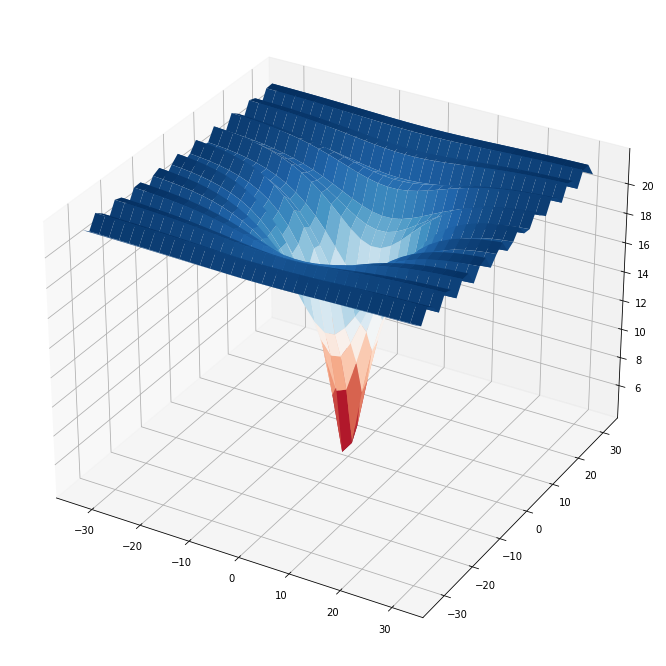

In [2]:
Ackley().graph()

### Evolução Diferencial

In [6]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=200,
    cr=0.9, 
    f=0.8, 
    evfunc='Ackley', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100

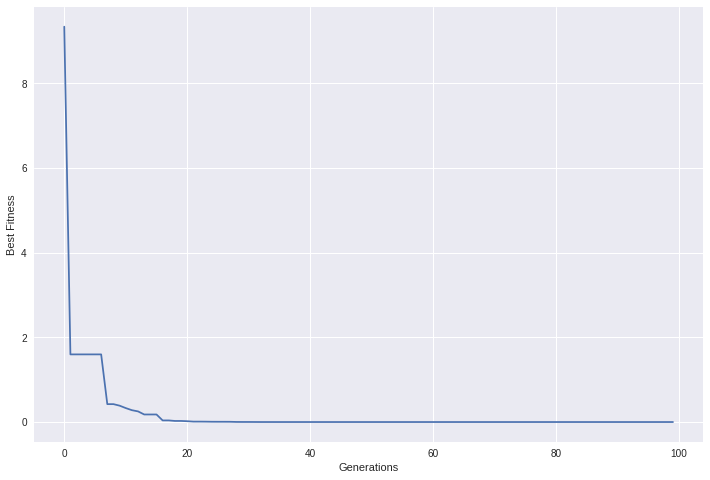

In [7]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [8]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 3.422494287974587e-11	Q1: 1.4730117126049436e-08	Q2: 6.083780907051306e-06	Q3: 0.006506156676041375	Max: 1.627005197235576e-10
0.21756768430326834


In [9]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Ackley', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [10]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 3.15983979722508e-11
Variance: 5.322258882119563e-22
Standard Deviation: 2.3070021417674417e-11


In [11]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.751277772585551
Variance: 0.00030594784785945554
Standard Deviation: 0.017491364951296842


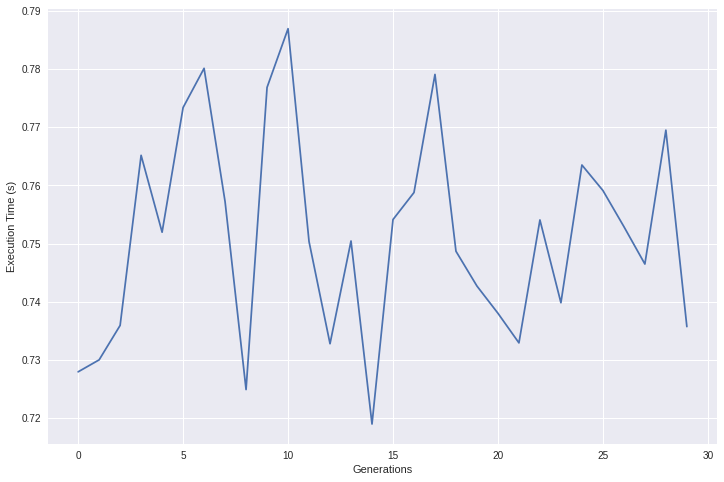

In [12]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### Algorítmos de Estimação de Distribuição

In [13]:
all_best_solutions = []
    
cga = CompactGA(
    ng=1100,
    np=150, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Ackley'
)
cga.evolve()

all_best_solutions = de.get_all_best_solutions()

Generatin string populagion. 
GERAÇÃO: 1100

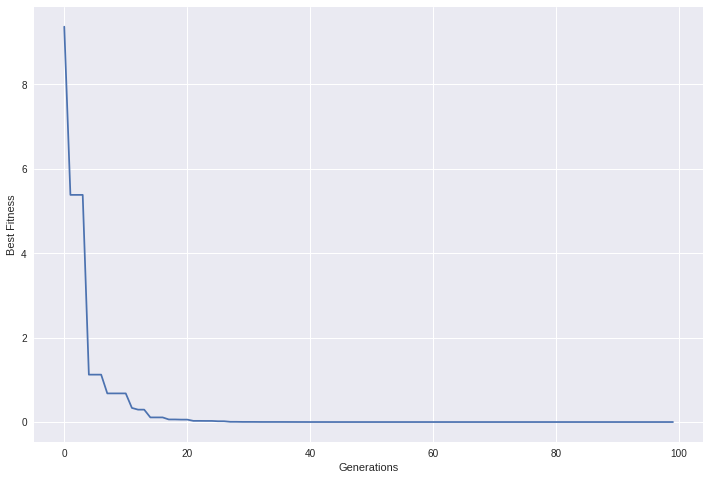

In [14]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [15]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.5913048656557294e-11	Q1: 2.7581745332128094e-08	Q2: 2.486143952262765e-05	Q3: 0.02082650519382634	Max: 1.3139045407228878e-10
0.33265203248728825


In [17]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=1100,
        np=150, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Ackley'
    )
    cga.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())

Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1064

KeyboardInterrupt: 

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### GA

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1% rodando durante 100 gerações. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 100 gerações.

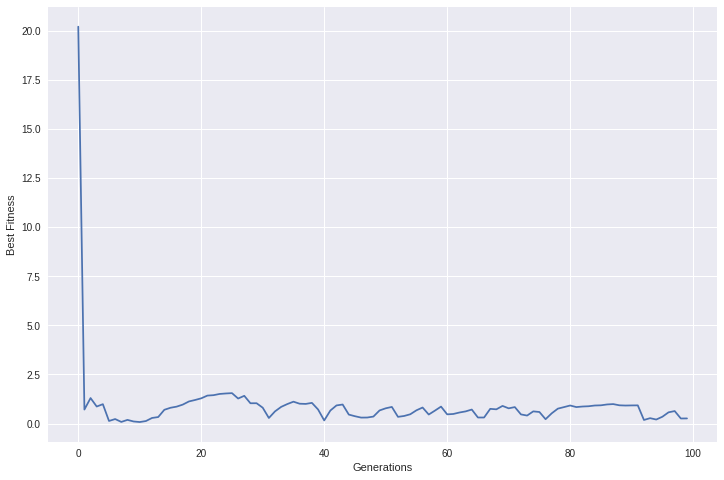

In [2]:
UB = 32
LB = -32
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
pop,
Ackley().compute, 
"whole arithmetic recombination", 
"uniform mutation",
"fitness proportional selection",
"fitness proportional selection",
0.01,
100,
UB,
LB,
0)
    
ga_alg = GA(model)
stop = time.time();
ga_alg.run(model)
stop = time.time();

x = range(0,100)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [26]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "0,16" com um desvio padrão de "0,14". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 3,9 s.

In [27]:
statistics = Statistics(all_best_solutions)

print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.16186891044770194
Variance: 0.016926329998450913
Standard Deviation: 0.13010122981144687


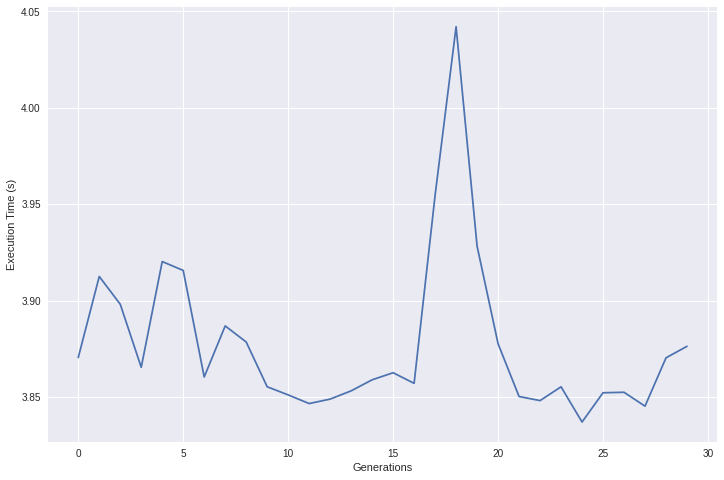

In [28]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi _"uniform mutation"_, a seleção de pais foi uniforme e a de filhos foi a _"mu,lambda"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 700 gerações.

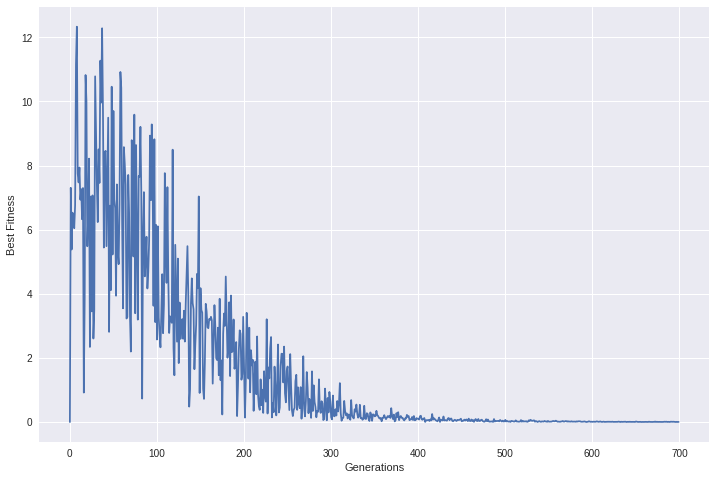

In [21]:
GENERATIONS = 700;
UB = 32
LB = -32
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
pop,
Ackley().compute,
"uniform mutation",
"mu,lambda",
"random",
2,
300,
40,
10,
GENERATIONS,
UB,
LB,
0)

es_alg = ES(model)

es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "8,52e-8" com um desvio padrão de "4,59e-7". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 3.68s.

In [23]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 8.524294369631017e-08
Variance: 2.105345639508586e-13
Standard Deviation: 4.588404558785751e-07


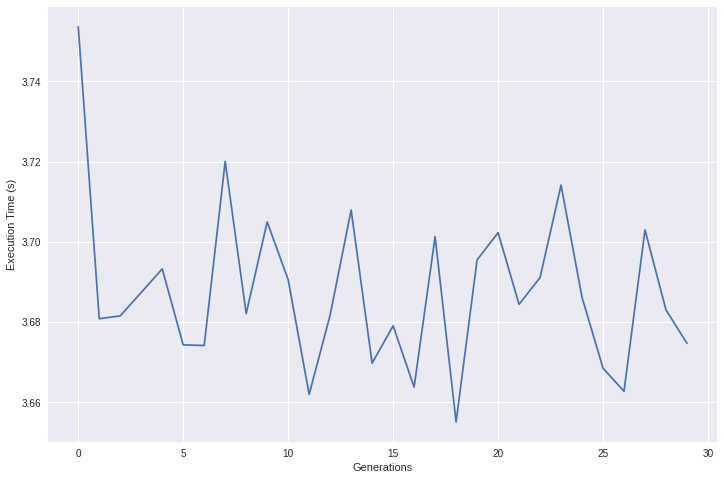

In [24]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (b)
## Gráfico da Função

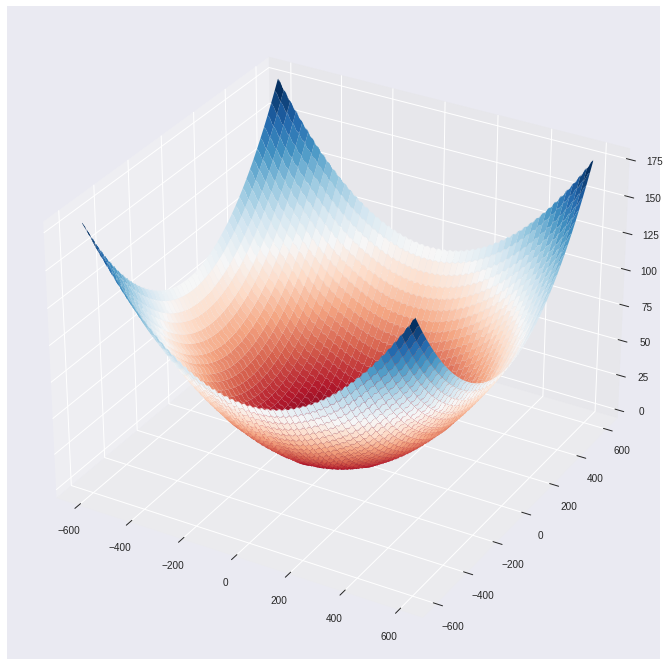

In [12]:
Griewank().graph()

### ES

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

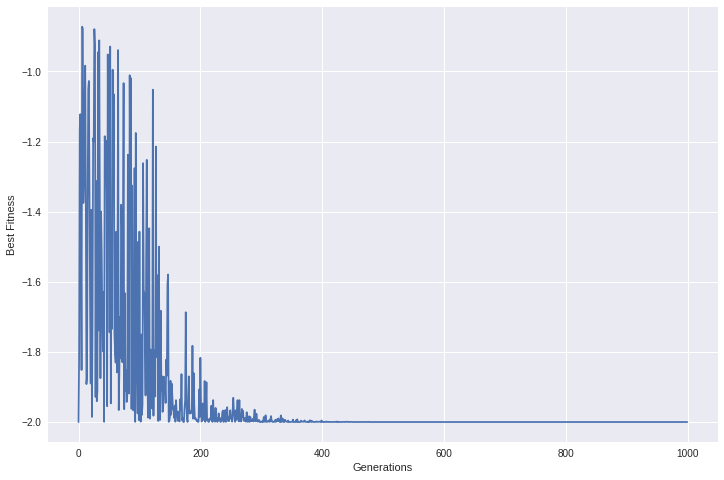

In [32]:
GENERATIONS = 1000
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
    pop,
    Griewank().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    GENERATIONS,
    UB,
    LB,
    0)
es_alg = ES(model)
es_alg.run(model)


x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [33]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-2" com um desvio padrão de "0" (o que significa que o desvio foi menor do que a precisão que o computador consegue chegar). Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 5,24 s.

In [34]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -2.0
Variance: 0.0
Standard Deviation: 0.0


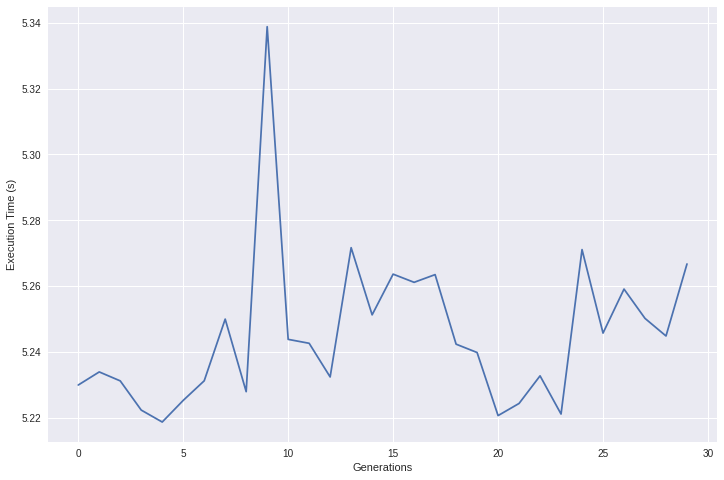

In [35]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### GA

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1% rodando durante 100 gerações. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 100 gerações.

Generation:  1
Best fitness:  1.5311051245758396
Generation:  2
Best fitness:  0.008146887165310313
Generation:  3
Best fitness:  0.009246188472137429
Generation:  4
Best fitness:  0.0007655906217297614
Generation:  5
Best fitness:  0.0014033977908939343
Generation:  6
Best fitness:  5.293353862501071e-05
Generation:  7
Best fitness:  0.00011374017364418343
Generation:  8
Best fitness:  1.0053355381511864e-06
Generation:  9
Best fitness:  0.0001890067192611422
Generation:  10
Best fitness:  0.00017700256664643366
Generation:  11
Best fitness:  0.00021339980700507688
Generation:  12
Best fitness:  9.293340465288402e-06
Generation:  13
Best fitness:  8.607172930952256e-05
Generation:  14
Best fitness:  0.00010792148858762562
Generation:  15
Best fitness:  2.0937852619695718e-05
Generation:  16
Best fitness:  9.106961478655418e-05
Generation:  17
Best fitness:  9.106961478655418e-05
Generation:  18
Best fitness:  0.001164996695596332
Generation:  19
Best fitness:  0.0017415162526314143
Ge

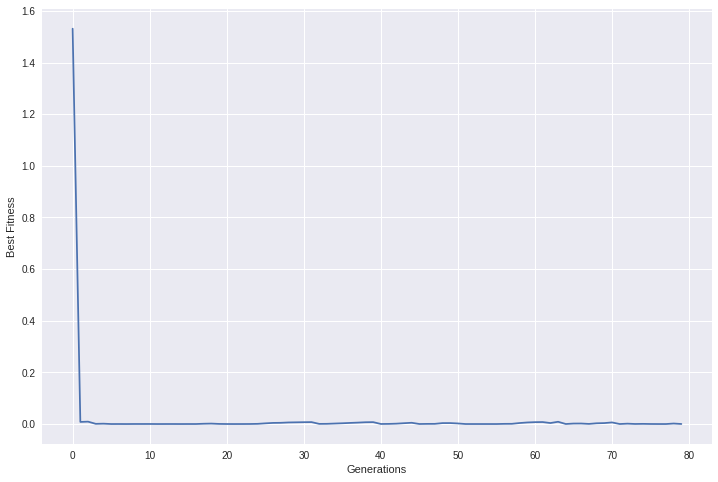

In [7]:
UB = 32
LB = -32
GENERATIONS = 80
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
    pop,
    Griewank().compute, 
    "whole arithmetic recombination", 
    "uniform mutation",
    "fitness proportional selection",
    "fitness proportional selection",
    0.01,
    GENERATIONS,
    UB,
    LB,
    0)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [9]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-1,99" com um desvio padrão de "6,08e-4". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 2,89s.

In [10]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -1.9997407767654964
Variance: 3.698159876523967e-07
Standard Deviation: 0.0006081249770009424


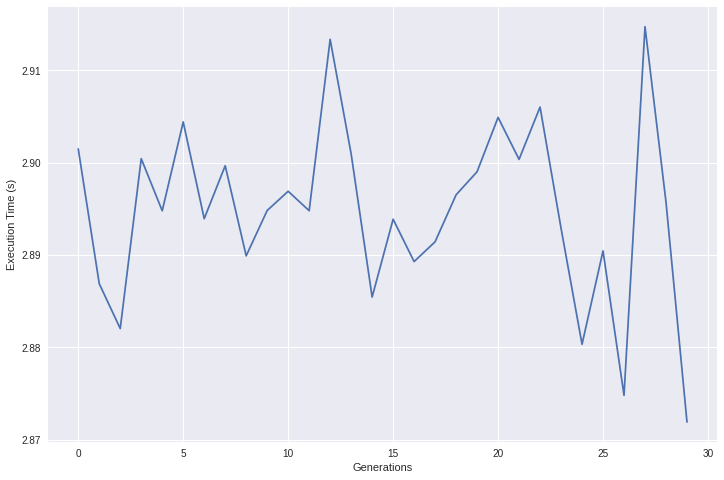

In [11]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (c)

### GA

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1%. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 2000 gerações.

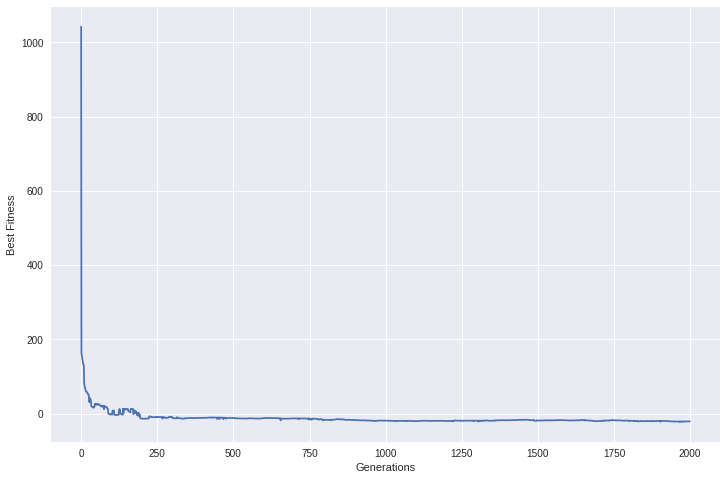

In [12]:
UB = 32
LB = -32
GENERATIONS = 2000
pop = np.random.uniform(low=LB, high=UB, size=(400,5))
model = ModelGA(
    pop,
    Trid().compute, 
    "whole arithmetic recombination", 
    "uniform mutation",
    "fitness proportional selection",
    "fitness proportional selection",
    0.01,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.99)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [13]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-28,5" com um desvio padrão de "1,02". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 31 s.

In [14]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -28.497466475272226
Variance: 1.0315777009490064
Standard Deviation: 1.0156661365571888


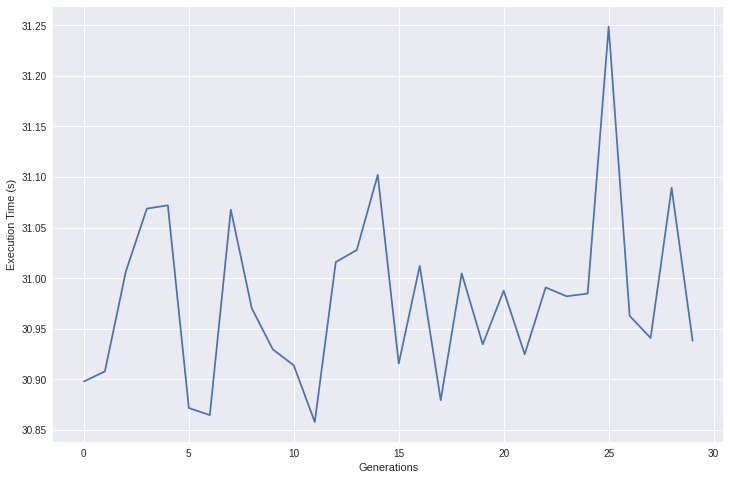

In [15]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### ES

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

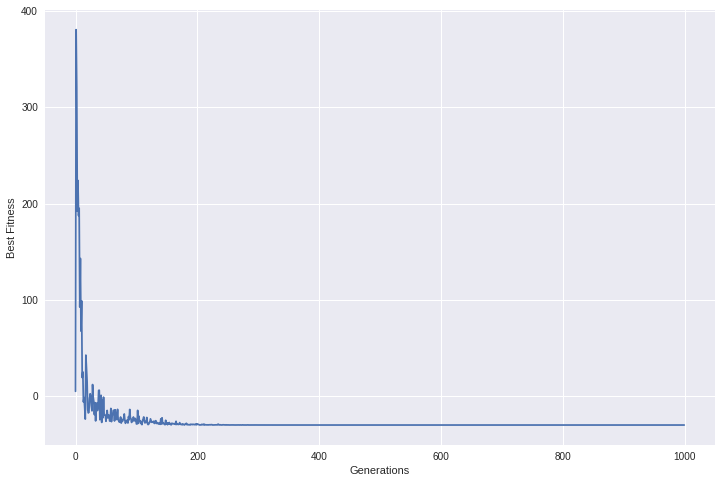

In [17]:
GENERATIONS = 1000
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,5))
model = ModelES(
    pop,
    Trid().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    1000,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [18]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-30" com um desvio padrão de "1,58e-14". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 4,41 s.

In [19]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -30.000000000000046
Variance: 2.4822823150954506e-28
Standard Deviation: 1.5755260439280116e-14


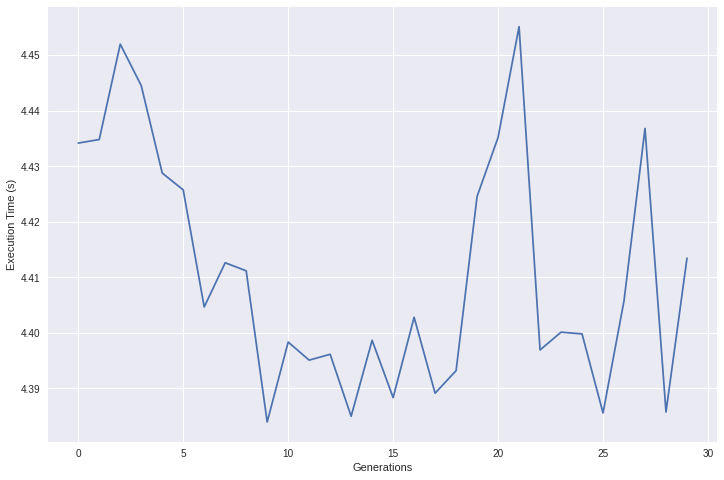

In [20]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (d)

### GA

Para esse algorítmo utilizou-se uma população de 1000 indivíduos e taxa de mutação de 10%. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

Generation:  1
Best fitness:  248864.67773657013
Generation:  2
Best fitness:  4762.884188755276
Generation:  3
Best fitness:  263.7461979789065
Generation:  4
Best fitness:  792.4584046264537
Generation:  5
Best fitness:  140.60144098857143
Generation:  6
Best fitness:  12.561282612950137
Generation:  7
Best fitness:  10.453220311530659
Generation:  8
Best fitness:  8.361392048345964
Generation:  9
Best fitness:  7.793439321621073
Generation:  10
Best fitness:  7.637160536521063
Generation:  11
Best fitness:  6.113083879008331
Generation:  12
Best fitness:  6.513143769253945
Generation:  13
Best fitness:  5.389456616989608
Generation:  14
Best fitness:  5.167743529906651
Generation:  15
Best fitness:  4.556619504017874
Generation:  16
Best fitness:  4.679164179515621
Generation:  17
Best fitness:  22.1151883485137
Generation:  18
Best fitness:  4.415242434794672
Generation:  19
Best fitness:  4.376609986580379
Generation:  20
Best fitness:  4.372239803798855
Generation:  21
Best fitne

Generation:  176
Best fitness:  2.9487085649038907
Generation:  177
Best fitness:  2.9487085649038907
Generation:  178
Best fitness:  2.9487085649038907
Generation:  179
Best fitness:  2.9487085649038907
Generation:  180
Best fitness:  2.9361083001827186
Generation:  181
Best fitness:  2.9360350491923874
Generation:  182
Best fitness:  16.139517603361764
Generation:  183
Best fitness:  2.9343176851444426
Generation:  184
Best fitness:  2.9343176851444426
Generation:  185
Best fitness:  2.9343176851444426
Generation:  186
Best fitness:  2.9343176851444426
Generation:  187
Best fitness:  2.9343176851444426
Generation:  188
Best fitness:  2.9343176851444426
Generation:  189
Best fitness:  2.9343176851444426
Generation:  190
Best fitness:  2.9343176851444426
Generation:  191
Best fitness:  2.9343176851444426
Generation:  192
Best fitness:  2.9343176851444426
Generation:  193
Best fitness:  2.9343176851444426
Generation:  194
Best fitness:  2.9343176851444426
Generation:  195
Best fitness: 

Generation:  353
Best fitness:  2.9042215095211406
Generation:  354
Best fitness:  14.833319784812666
Generation:  355
Best fitness:  14.027471428048173
Generation:  356
Best fitness:  2.9042215095211406
Generation:  357
Best fitness:  2.9042215095211406
Generation:  358
Best fitness:  2.9042215095211406
Generation:  359
Best fitness:  2.9042215095211406
Generation:  360
Best fitness:  2.9042215095211406
Generation:  361
Best fitness:  2.9042215095211406
Generation:  362
Best fitness:  16.078067970218758
Generation:  363
Best fitness:  2.9042215095211406
Generation:  364
Best fitness:  2.9042215095211406
Generation:  365
Best fitness:  2.9042215095211406
Generation:  366
Best fitness:  2.9042215095211406
Generation:  367
Best fitness:  2.9042215095211406
Generation:  368
Best fitness:  2.9042215095211406
Generation:  369
Best fitness:  2.9042215095211406
Generation:  370
Best fitness:  2.9042215095211406
Generation:  371
Best fitness:  2.9042215095211406
Generation:  372
Best fitness: 

Generation:  528
Best fitness:  2.9042215095211406
Generation:  529
Best fitness:  2.9042215095211406
Generation:  530
Best fitness:  2.9042215095211406
Generation:  531
Best fitness:  2.9042215095211406
Generation:  532
Best fitness:  2.9042215095211406
Generation:  533
Best fitness:  2.9042215095211406
Generation:  534
Best fitness:  2.9042215095211406
Generation:  535
Best fitness:  2.9042215095211406
Generation:  536
Best fitness:  2.9042215095211406
Generation:  537
Best fitness:  2.9042215095211406
Generation:  538
Best fitness:  2.9042215095211406
Generation:  539
Best fitness:  2.9042215095211406
Generation:  540
Best fitness:  2.9042215095211406
Generation:  541
Best fitness:  2.9042215095211406
Generation:  542
Best fitness:  2.9042215095211406
Generation:  543
Best fitness:  2.9042215095211406
Generation:  544
Best fitness:  2.9042215095211406
Generation:  545
Best fitness:  2.9042215095211406
Generation:  546
Best fitness:  2.9042215095211406
Generation:  547
Best fitness: 

Generation:  700
Best fitness:  0.3030324778573865
Generation:  701
Best fitness:  0.3030324778573865
Generation:  702
Best fitness:  0.3030324778573865
Generation:  703
Best fitness:  0.3030324778573865
Generation:  704
Best fitness:  0.3030324778573865
Generation:  705
Best fitness:  0.3030324778573865
Generation:  706
Best fitness:  0.3030324778573865
Generation:  707
Best fitness:  0.3030324778573865
Generation:  708
Best fitness:  0.3030324778573865
Generation:  709
Best fitness:  0.3030324778573865
Generation:  710
Best fitness:  0.3030324778573865
Generation:  711
Best fitness:  0.3030324778573865
Generation:  712
Best fitness:  0.3030324778573865
Generation:  713
Best fitness:  0.3030324778573865
Generation:  714
Best fitness:  0.3030324778573865
Generation:  715
Best fitness:  0.3030324778573865
Generation:  716
Best fitness:  0.3030324778573865
Generation:  717
Best fitness:  0.3030324778573865
Generation:  718
Best fitness:  0.3030324778573865
Generation:  719
Best fitness: 

Generation:  873
Best fitness:  0.3027878061390288
Generation:  874
Best fitness:  0.3027878061390288
Generation:  875
Best fitness:  0.3027878061390288
Generation:  876
Best fitness:  0.3027878061390288
Generation:  877
Best fitness:  0.3027878061390288
Generation:  878
Best fitness:  0.3027878061390288
Generation:  879
Best fitness:  0.3027878061390288
Generation:  880
Best fitness:  0.3027878061390288
Generation:  881
Best fitness:  0.3027878061390288
Generation:  882
Best fitness:  0.3027878061390288
Generation:  883
Best fitness:  0.3027878061390288
Generation:  884
Best fitness:  0.3027878061390288
Generation:  885
Best fitness:  0.3027878061390288
Generation:  886
Best fitness:  0.3027878061390288
Generation:  887
Best fitness:  0.3027878061390288
Generation:  888
Best fitness:  0.3027878061390288
Generation:  889
Best fitness:  0.3027878061390288
Generation:  890
Best fitness:  0.3027878061390288
Generation:  891
Best fitness:  0.3027878061390288
Generation:  892
Best fitness: 

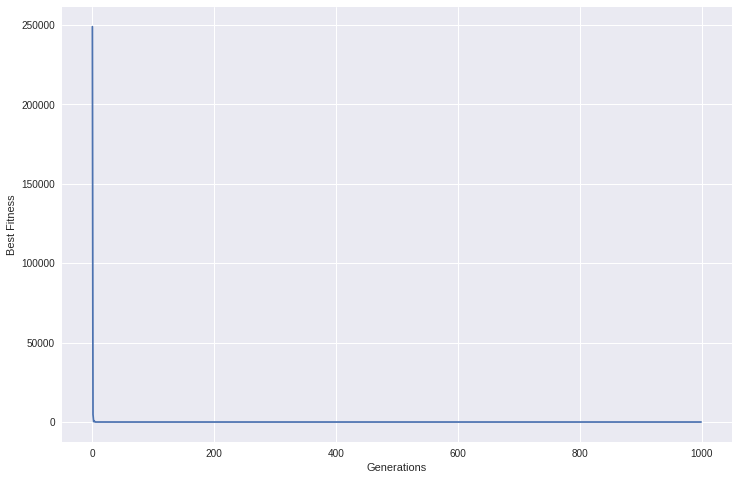

In [8]:
UB = 32
LB = -32
GENERATIONS = 1000
pop = np.random.uniform(low=LB, high=UB, size=(300,4))
    
model = ModelGA(
    pop,
    Colville().compute, 
    "whole arithmetic recombination best", 
    "uniform mutation",
    "fitness proportional selection kbest",
    "fitness proportional selection kbest",
    0.1,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.8)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)### Evolução Diferencial
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [9]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Generation:  1
Best fitness:  0.3027878061390288
Generation:  2
Best fitness:  0.3027878061390288
Generation:  3
Best fitness:  0.3027878061390288
Generation:  4
Best fitness:  0.3027878061390288
Generation:  5
Best fitness:  0.3027878061390288
Generation:  6
Best fitness:  0.3027878061390288
Generation:  7
Best fitness:  0.3027878061390288
Generation:  8
Best fitness:  0.3027878061390288
Generation:  9
Best fitness:  0.3027878061390288
Generation:  10
Best fitness:  0.3027878061390288
Generation:  11
Best fitness:  0.3027878061390288
Generation:  12
Best fitness:  0.3027878061390288
Generation:  13
Best fitness:  0.3027878061390288
Generation:  14
Best fitness:  0.3027878061390288
Generation:  15
Best fitness:  0.3027878061390288
Generation:  16
Best fitness:  0.3027878061390288
Generation:  17
Best fitness:  0.3027878061390288
Generation:  18
Best fitness:  0.3026849151711941
Generation:  19
Best fitness:  0.30270933972708214
Generation:  20
Best fitness:  0.3026766178971947
Generati

Generation:  177
Best fitness:  0.30218215688044303
Generation:  178
Best fitness:  0.30218215688044303
Generation:  179
Best fitness:  0.30218215688044303
Generation:  180
Best fitness:  0.30218215688044303
Generation:  181
Best fitness:  0.30218215688044303
Generation:  182
Best fitness:  0.30218215688044303
Generation:  183
Best fitness:  0.30218215688044303
Generation:  184
Best fitness:  0.30218215688044303
Generation:  185
Best fitness:  0.30218215688044303
Generation:  186
Best fitness:  0.30218215688044303
Generation:  187
Best fitness:  0.30218215688044303
Generation:  188
Best fitness:  0.30218215688044303
Generation:  189
Best fitness:  0.30218215688044303
Generation:  190
Best fitness:  0.30218215688044303
Generation:  191
Best fitness:  0.30218215688044303
Generation:  192
Best fitness:  0.30218215688044303
Generation:  193
Best fitness:  0.30218215688044303
Generation:  194
Best fitness:  0.30218215688044303
Generation:  195
Best fitness:  0.30218215688044303
Generation: 

Generation:  354
Best fitness:  0.30218215688044303
Generation:  355
Best fitness:  0.30218215688044303
Generation:  356
Best fitness:  0.30218215688044303
Generation:  357
Best fitness:  0.30218215688044303
Generation:  358
Best fitness:  0.30218215688044303
Generation:  359
Best fitness:  0.30218215688044303
Generation:  360
Best fitness:  0.30218215688044303
Generation:  361
Best fitness:  0.30218215688044303
Generation:  362
Best fitness:  0.30218215688044303
Generation:  363
Best fitness:  0.30218215688044303
Generation:  364
Best fitness:  0.30218215688044303
Generation:  365
Best fitness:  0.30218215688044303
Generation:  366
Best fitness:  0.30218215688044303
Generation:  367
Best fitness:  0.30218215688044303
Generation:  368
Best fitness:  0.30218215688044303
Generation:  369
Best fitness:  0.30218215688044303
Generation:  370
Best fitness:  0.30218215688044303
Generation:  371
Best fitness:  0.30218215688044303
Generation:  372
Best fitness:  0.30218215688044303
Generation: 

Generation:  530
Best fitness:  0.3016517971755137
Generation:  531
Best fitness:  0.30165179717551815
Generation:  532
Best fitness:  0.30165179717551815
Generation:  533
Best fitness:  0.3016517971755164
Generation:  534
Best fitness:  0.30165179717551815
Generation:  535
Best fitness:  0.30165179717551727
Generation:  536
Best fitness:  0.30165179717551904
Generation:  537
Best fitness:  0.3016517971755164
Generation:  538
Best fitness:  0.30165179717551815
Generation:  539
Best fitness:  0.30165179717551727
Generation:  540
Best fitness:  0.30165179717551727
Generation:  541
Best fitness:  0.30165179717551815
Generation:  542
Best fitness:  0.30165179717551815
Generation:  543
Best fitness:  0.30165179717551727
Generation:  544
Best fitness:  0.30165179717551815
Generation:  545
Best fitness:  0.30165179717551727
Generation:  546
Best fitness:  0.30165179717551904
Generation:  547
Best fitness:  0.30165179717551727
Generation:  548
Best fitness:  0.30165179717551727
Generation:  54

Generation:  706
Best fitness:  0.3014736303951242
Generation:  707
Best fitness:  0.3014736303951242
Generation:  708
Best fitness:  0.3014736303951242
Generation:  709
Best fitness:  0.3014736303951242
Generation:  710
Best fitness:  0.3014736303951242
Generation:  711
Best fitness:  0.3014736303951242
Generation:  712
Best fitness:  0.3014736303951242
Generation:  713
Best fitness:  0.3014736303951242
Generation:  714
Best fitness:  0.3014736303951242
Generation:  715
Best fitness:  0.3014736303951242
Generation:  716
Best fitness:  0.3014736303951242
Generation:  717
Best fitness:  0.3014736303951242
Generation:  718
Best fitness:  0.3014736303951242
Generation:  719
Best fitness:  0.3014736303951242
Generation:  720
Best fitness:  0.3014736303951242
Generation:  721
Best fitness:  0.3014736303951242
Generation:  722
Best fitness:  0.3014736303951242
Generation:  723
Best fitness:  0.3014736303951242
Generation:  724
Best fitness:  0.3014736303951242
Generation:  725
Best fitness: 

Generation:  881
Best fitness:  0.3014736303951242
Generation:  882
Best fitness:  0.3014736303951242
Generation:  883
Best fitness:  0.3014736303951242
Generation:  884
Best fitness:  0.3014736303951242
Generation:  885
Best fitness:  0.3014736303951242
Generation:  886
Best fitness:  0.3014736303951242
Generation:  887
Best fitness:  0.3014736303951242
Generation:  888
Best fitness:  0.3014736303951242
Generation:  889
Best fitness:  0.3014736303951242
Generation:  890
Best fitness:  0.3014736303951242
Generation:  891
Best fitness:  0.3014736303951242
Generation:  892
Best fitness:  0.3014736303951242
Generation:  893
Best fitness:  0.3014736303951242
Generation:  894
Best fitness:  0.3014736303951242
Generation:  895
Best fitness:  0.3014736303951242
Generation:  896
Best fitness:  0.3014736303951242
Generation:  897
Best fitness:  0.3014736303951242
Generation:  898
Best fitness:  0.3014736303951242
Generation:  899
Best fitness:  0.3014736303951242
Generation:  900
Best fitness: 

Generation:  56
Best fitness:  0.2991958809445485
Generation:  57
Best fitness:  0.2991958809445485
Generation:  58
Best fitness:  0.2991958809445485
Generation:  59
Best fitness:  0.2991958809445485
Generation:  60
Best fitness:  0.2991958809445485
Generation:  61
Best fitness:  0.2991958809445485
Generation:  62
Best fitness:  0.2991958809445485
Generation:  63
Best fitness:  0.2991958809445485
Generation:  64
Best fitness:  0.2991958809445485
Generation:  65
Best fitness:  0.2991958809445485
Generation:  66
Best fitness:  0.2991958809445485
Generation:  67
Best fitness:  0.2991958809445485
Generation:  68
Best fitness:  0.2991958809445485
Generation:  69
Best fitness:  0.2991958809445485
Generation:  70
Best fitness:  0.2991958809445485
Generation:  71
Best fitness:  0.2991958809445485
Generation:  72
Best fitness:  0.2991958809445485
Generation:  73
Best fitness:  0.2991958809445485
Generation:  74
Best fitness:  0.2991958809445485
Generation:  75
Best fitness:  0.2991958809445485


Generation:  233
Best fitness:  0.2991958809445485
Generation:  234
Best fitness:  0.2991958809445485
Generation:  235
Best fitness:  0.2991958809445485
Generation:  236
Best fitness:  0.2991958809445485
Generation:  237
Best fitness:  0.2991958809445485
Generation:  238
Best fitness:  0.2991958809445485
Generation:  239
Best fitness:  0.2991958809445485
Generation:  240
Best fitness:  0.2991958809445485
Generation:  241
Best fitness:  0.2991958809445485
Generation:  242
Best fitness:  0.2991958809445485
Generation:  243
Best fitness:  0.2991958809445485
Generation:  244
Best fitness:  0.2991958809445485
Generation:  245
Best fitness:  0.2991958809445485
Generation:  246
Best fitness:  0.2991958809445485
Generation:  247
Best fitness:  0.2991958809445485
Generation:  248
Best fitness:  0.2991958809445485
Generation:  249
Best fitness:  0.2991958809445485
Generation:  250
Best fitness:  0.2991958809445485
Generation:  251
Best fitness:  0.2991958809445485
Generation:  252
Best fitness: 

Generation:  409
Best fitness:  0.2991958809445485
Generation:  410
Best fitness:  0.2991958809445485
Generation:  411
Best fitness:  0.2991958809445485
Generation:  412
Best fitness:  0.2991958809445485
Generation:  413
Best fitness:  0.2991958809445485
Generation:  414
Best fitness:  0.2991958809445485
Generation:  415
Best fitness:  0.2991958809445485
Generation:  416
Best fitness:  0.2991958809445485
Generation:  417
Best fitness:  0.2991958809445485
Generation:  418
Best fitness:  0.2991958809445485
Generation:  419
Best fitness:  0.2991958809445485
Generation:  420
Best fitness:  0.2991958809445485
Generation:  421
Best fitness:  0.2991958809445485
Generation:  422
Best fitness:  0.2991958809445485
Generation:  423
Best fitness:  0.2991958809445485
Generation:  424
Best fitness:  0.2991958809445485
Generation:  425
Best fitness:  0.2991958809445485
Generation:  426
Best fitness:  0.2991958809445485
Generation:  427
Best fitness:  0.2991958809445485
Generation:  428
Best fitness: 

Generation:  585
Best fitness:  0.2991958809445485
Generation:  586
Best fitness:  0.2991958809445485
Generation:  587
Best fitness:  0.2991958809445485
Generation:  588
Best fitness:  0.2991958809445485
Generation:  589
Best fitness:  0.2991958809445485
Generation:  590
Best fitness:  0.2991958809445485
Generation:  591
Best fitness:  0.2991958809445485
Generation:  592
Best fitness:  0.2991958809445485
Generation:  593
Best fitness:  0.2991958809445485
Generation:  594
Best fitness:  0.2991958809445485
Generation:  595
Best fitness:  0.2991958809445485
Generation:  596
Best fitness:  0.2991958809445485
Generation:  597
Best fitness:  0.2991958809445485
Generation:  598
Best fitness:  0.2991958809445485
Generation:  599
Best fitness:  0.2991958809445485
Generation:  600
Best fitness:  0.2991958809445485
Generation:  601
Best fitness:  0.2991958809445485
Generation:  602
Best fitness:  0.2991958809445485
Generation:  603
Best fitness:  0.2991958809445485
Generation:  604
Best fitness: 

Generation:  762
Best fitness:  0.2988344387413626
Generation:  763
Best fitness:  0.2988344387413626
Generation:  764
Best fitness:  0.2988344387413626
Generation:  765
Best fitness:  0.2988344387413626
Generation:  766
Best fitness:  0.2988344387413626
Generation:  767
Best fitness:  0.2988344387413626
Generation:  768
Best fitness:  0.2988344387413626
Generation:  769
Best fitness:  0.2988344387413626
Generation:  770
Best fitness:  0.2988344387413626
Generation:  771
Best fitness:  0.2988344387413626
Generation:  772
Best fitness:  0.2988344387413626
Generation:  773
Best fitness:  0.2988344387413626
Generation:  774
Best fitness:  0.2988344387413626
Generation:  775
Best fitness:  0.2988344387413626
Generation:  776
Best fitness:  0.2988344387413626
Generation:  777
Best fitness:  0.2988344387413626
Generation:  778
Best fitness:  0.2988344387413626
Generation:  779
Best fitness:  0.2988344387413626
Generation:  780
Best fitness:  0.2988344387413626
Generation:  781
Best fitness: 

Generation:  939
Best fitness:  0.2988344387413626
Generation:  940
Best fitness:  0.2988344387413626
Generation:  941
Best fitness:  0.2988344387413626
Generation:  942
Best fitness:  0.2988344387413626
Generation:  943
Best fitness:  0.2988344387413626
Generation:  944
Best fitness:  0.2988344387413626
Generation:  945
Best fitness:  0.2988344387413626
Generation:  946
Best fitness:  0.2988344387413626
Generation:  947
Best fitness:  0.2988344387413626
Generation:  948
Best fitness:  0.2988344387413626
Generation:  949
Best fitness:  0.2988344387413626
Generation:  950
Best fitness:  0.2988344387413626
Generation:  951
Best fitness:  0.2988344387413626
Generation:  952
Best fitness:  0.2988344387413626
Generation:  953
Best fitness:  0.2988344387413626
Generation:  954
Best fitness:  0.2988344387413626
Generation:  955
Best fitness:  0.2988344387413626
Generation:  956
Best fitness:  0.2988344387413626
Generation:  957
Best fitness:  0.2988344387413626
Generation:  958
Best fitness: 

Generation:  117
Best fitness:  0.2988344387413626
Generation:  118
Best fitness:  0.2988344387413626
Generation:  119
Best fitness:  0.2988344387413626
Generation:  120
Best fitness:  0.2988344387413626
Generation:  121
Best fitness:  0.2988344387413626
Generation:  122
Best fitness:  0.2988344387413626
Generation:  123
Best fitness:  0.2988344387413626
Generation:  124
Best fitness:  0.2988344387413626
Generation:  125
Best fitness:  0.2988344387413626
Generation:  126
Best fitness:  0.2988344387413626
Generation:  127
Best fitness:  0.2988344387413626
Generation:  128
Best fitness:  0.2988344387413626
Generation:  129
Best fitness:  0.2988344387413626
Generation:  130
Best fitness:  0.2988344387413626
Generation:  131
Best fitness:  0.2988344387413626
Generation:  132
Best fitness:  0.2988344387413626
Generation:  133
Best fitness:  0.2988344387413626
Generation:  134
Best fitness:  0.2988344387413626
Generation:  135
Best fitness:  0.2988344387413626
Generation:  136
Best fitness: 

Generation:  293
Best fitness:  0.2988344387413626
Generation:  294
Best fitness:  0.2988344387413626
Generation:  295
Best fitness:  0.2988344387413626
Generation:  296
Best fitness:  0.2988344387413626
Generation:  297
Best fitness:  0.2988344387413626
Generation:  298
Best fitness:  0.2988344387413626
Generation:  299
Best fitness:  0.2988344387413626
Generation:  300
Best fitness:  0.2988344387413626
Generation:  301
Best fitness:  0.2988344387413626
Generation:  302
Best fitness:  0.2988344387413626
Generation:  303
Best fitness:  0.2988344387413626
Generation:  304
Best fitness:  0.2988344387413626
Generation:  305
Best fitness:  0.2988344387413626
Generation:  306
Best fitness:  0.2988344387413626
Generation:  307
Best fitness:  0.2988344387413626
Generation:  308
Best fitness:  0.2988344387413626
Generation:  309
Best fitness:  0.2988344387413626
Generation:  310
Best fitness:  0.2988344387413626
Generation:  311
Best fitness:  0.2988344387413626
Generation:  312
Best fitness: 

Generation:  469
Best fitness:  0.2988344387413626
Generation:  470
Best fitness:  0.2988344387413626
Generation:  471
Best fitness:  0.29862661064549645
Generation:  472
Best fitness:  0.29869149635818193
Generation:  473
Best fitness:  0.29849710089830506
Generation:  474
Best fitness:  0.2984250235031354
Generation:  475
Best fitness:  0.29841059161418393
Generation:  476
Best fitness:  0.29841059161418393
Generation:  477
Best fitness:  0.29841059161418393
Generation:  478
Best fitness:  0.29841059161418393
Generation:  479
Best fitness:  0.29841059161418393
Generation:  480
Best fitness:  0.29841059161418393
Generation:  481
Best fitness:  0.29841059161418393
Generation:  482
Best fitness:  0.29841059161418393
Generation:  483
Best fitness:  0.29841059161418393
Generation:  484
Best fitness:  0.29841059161418393
Generation:  485
Best fitness:  0.29841059161418393
Generation:  486
Best fitness:  0.29841059161418393
Generation:  487
Best fitness:  0.29841059161418393
Generation:  48

Generation:  649
Best fitness:  0.29841059161418393
Generation:  650
Best fitness:  0.29841059161418393
Generation:  651
Best fitness:  0.29841059161418393
Generation:  652
Best fitness:  0.29841059161418393
Generation:  653
Best fitness:  0.29841059161418393
Generation:  654
Best fitness:  0.29841059161418393
Generation:  655
Best fitness:  0.29841059161418393
Generation:  656
Best fitness:  0.29841059161418393
Generation:  657
Best fitness:  0.29841059161418393
Generation:  658
Best fitness:  0.29841059161418393
Generation:  659
Best fitness:  0.29841059161418393
Generation:  660
Best fitness:  0.29841059161418393
Generation:  661
Best fitness:  0.29841059161418393
Generation:  662
Best fitness:  0.29841059161418393
Generation:  663
Best fitness:  0.29841059161418393
Generation:  664
Best fitness:  0.29841059161418393
Generation:  665
Best fitness:  0.29841059161418393
Generation:  666
Best fitness:  0.29841059161418393
Generation:  667
Best fitness:  0.29841059161418393
Generation: 

Generation:  825
Best fitness:  0.29818077564021106
Generation:  826
Best fitness:  0.29818077564021017
Generation:  827
Best fitness:  0.29818077564021017
Generation:  828
Best fitness:  0.29818077564021017
Generation:  829
Best fitness:  0.29818077564021017
Generation:  830
Best fitness:  0.29818077564021017
Generation:  831
Best fitness:  0.29818077564021017
Generation:  832
Best fitness:  0.29818077564021017
Generation:  833
Best fitness:  0.29818077564021106
Generation:  834
Best fitness:  0.29818077564021017
Generation:  835
Best fitness:  0.29818077564021017
Generation:  836
Best fitness:  0.29818077564021017
Generation:  837
Best fitness:  0.29818077564021017
Generation:  838
Best fitness:  0.29818077564021017
Generation:  839
Best fitness:  0.29818077564021017
Generation:  840
Best fitness:  0.29818077564021017
Generation:  841
Best fitness:  0.29818077564021017
Generation:  842
Best fitness:  0.29818077564021017
Generation:  843
Best fitness:  0.29818077564021017
Generation: 

Generation:  1000
Best fitness:  0.29818077564021017
Generation:  1
Best fitness:  0.29818077564021017
Generation:  2
Best fitness:  0.29818077564021017
Generation:  3
Best fitness:  0.29818077564021017
Generation:  4
Best fitness:  0.29818077564021017
Generation:  5
Best fitness:  0.29818077564021017
Generation:  6
Best fitness:  0.29818077564021017
Generation:  7
Best fitness:  0.29818077564021017
Generation:  8
Best fitness:  0.29818077564021017
Generation:  9
Best fitness:  0.29818077564021017
Generation:  10
Best fitness:  0.29818077564021017
Generation:  11
Best fitness:  0.29818077564021017
Generation:  12
Best fitness:  0.29818077564021017
Generation:  13
Best fitness:  0.29818077564021017
Generation:  14
Best fitness:  0.29818077564021017
Generation:  15
Best fitness:  0.29818077564021017
Generation:  16
Best fitness:  0.29818077564021017
Generation:  17
Best fitness:  0.29818077564021017
Generation:  18
Best fitness:  0.29818077564021017
Generation:  19
Best fitness:  0.29818

Generation:  176
Best fitness:  0.29818077564021017
Generation:  177
Best fitness:  0.29818077564021017
Generation:  178
Best fitness:  0.29818077564021017
Generation:  179
Best fitness:  0.29818077564021017
Generation:  180
Best fitness:  0.29818077564021017
Generation:  181
Best fitness:  0.29818077564021017
Generation:  182
Best fitness:  0.29818077564021017
Generation:  183
Best fitness:  0.29818077564021017
Generation:  184
Best fitness:  0.29818077564021017
Generation:  185
Best fitness:  0.29818077564021017
Generation:  186
Best fitness:  0.29818077564021017
Generation:  187
Best fitness:  0.29818077564021017
Generation:  188
Best fitness:  0.29818077564021017
Generation:  189
Best fitness:  0.29818077564021017
Generation:  190
Best fitness:  0.29818077564021017
Generation:  191
Best fitness:  0.29818077564021017
Generation:  192
Best fitness:  0.29818077564021017
Generation:  193
Best fitness:  0.29818077564021017
Generation:  194
Best fitness:  0.29818077564021017
Generation: 

Generation:  352
Best fitness:  0.29818077564021017
Generation:  353
Best fitness:  0.29818077564021017
Generation:  354
Best fitness:  0.29818077564021017
Generation:  355
Best fitness:  0.29818077564021017
Generation:  356
Best fitness:  0.29818077564021017
Generation:  357
Best fitness:  0.29818077564021017
Generation:  358
Best fitness:  0.29818077564021017
Generation:  359
Best fitness:  0.29818077564021017
Generation:  360
Best fitness:  0.29818077564021017
Generation:  361
Best fitness:  0.29818077564021017
Generation:  362
Best fitness:  0.29818077564021017
Generation:  363
Best fitness:  0.29818077564021017
Generation:  364
Best fitness:  0.29818077564021017
Generation:  365
Best fitness:  0.29818077564021017
Generation:  366
Best fitness:  0.29818077564021017
Generation:  367
Best fitness:  0.29818077564021017
Generation:  368
Best fitness:  0.29818077564021017
Generation:  369
Best fitness:  0.29818077564021017
Generation:  370
Best fitness:  0.29818077564021017
Generation: 

Generation:  529
Best fitness:  0.29818077564021017
Generation:  530
Best fitness:  0.29818077564021017
Generation:  531
Best fitness:  0.29818077564021017
Generation:  532
Best fitness:  0.29818077564021017
Generation:  533
Best fitness:  0.29818077564021017
Generation:  534
Best fitness:  0.29818077564021017
Generation:  535
Best fitness:  0.29818077564021017
Generation:  536
Best fitness:  0.29818077564021017
Generation:  537
Best fitness:  0.29818077564021017
Generation:  538
Best fitness:  0.29818077564021017
Generation:  539
Best fitness:  0.29818077564021017
Generation:  540
Best fitness:  0.29818077564021017
Generation:  541
Best fitness:  0.29818077564021017
Generation:  542
Best fitness:  0.29818077564021017
Generation:  543
Best fitness:  0.29818077564021017
Generation:  544
Best fitness:  0.29818077564021017
Generation:  545
Best fitness:  0.29818077564021017
Generation:  546
Best fitness:  0.29818077564021017
Generation:  547
Best fitness:  0.29818077564021017
Generation: 

Generation:  706
Best fitness:  0.29818077564021017
Generation:  707
Best fitness:  0.29818077564021017
Generation:  708
Best fitness:  0.29818077564021017
Generation:  709
Best fitness:  0.29818077564021017
Generation:  710
Best fitness:  0.29818077564021017
Generation:  711
Best fitness:  0.29818077564021017
Generation:  712
Best fitness:  0.29818077564021017
Generation:  713
Best fitness:  0.29818077564021017
Generation:  714
Best fitness:  0.29818077564021017
Generation:  715
Best fitness:  0.29818077564021017
Generation:  716
Best fitness:  0.29818077564021017
Generation:  717
Best fitness:  0.29818077564021017
Generation:  718
Best fitness:  0.29818077564021017
Generation:  719
Best fitness:  0.29818077564021017
Generation:  720
Best fitness:  0.29818077564021017
Generation:  721
Best fitness:  0.29818077564021017
Generation:  722
Best fitness:  0.29818077564021017
Generation:  723
Best fitness:  0.29818077564021017
Generation:  724
Best fitness:  0.29818077564021017
Generation: 

Generation:  881
Best fitness:  0.2980818050289047
Generation:  882
Best fitness:  0.2980818050289047
Generation:  883
Best fitness:  0.2980818050289047
Generation:  884
Best fitness:  0.2980818050289047
Generation:  885
Best fitness:  0.29807399126068646
Generation:  886
Best fitness:  0.298076272776858
Generation:  887
Best fitness:  0.29807167080586083
Generation:  888
Best fitness:  0.29806932617223847
Generation:  889
Best fitness:  0.2980688610349489
Generation:  890
Best fitness:  0.29806857123404207
Generation:  891
Best fitness:  0.2980685657412554
Generation:  892
Best fitness:  0.29806849836126936
Generation:  893
Best fitness:  0.2980684963840545
Generation:  894
Best fitness:  0.29806849708853456
Generation:  895
Best fitness:  0.29806849813493397
Generation:  896
Best fitness:  0.29806849711497385
Generation:  897
Best fitness:  0.2980684968485461
Generation:  898
Best fitness:  0.2980684973875558
Generation:  899
Best fitness:  0.2980684973259091
Generation:  900
Best fi

Generation:  55
Best fitness:  0.29806849741186703
Generation:  56
Best fitness:  0.29806849741186703
Generation:  57
Best fitness:  0.29806849741186703
Generation:  58
Best fitness:  0.29806849741186703
Generation:  59
Best fitness:  0.29806849741186703
Generation:  60
Best fitness:  0.29806849741186703
Generation:  61
Best fitness:  0.29806849741186703
Generation:  62
Best fitness:  0.29806849741186703
Generation:  63
Best fitness:  0.29806849741186703
Generation:  64
Best fitness:  0.29806849741186703
Generation:  65
Best fitness:  0.29806849741186703
Generation:  66
Best fitness:  0.29806849741186703
Generation:  67
Best fitness:  0.29806849741186703
Generation:  68
Best fitness:  0.29806849741186703
Generation:  69
Best fitness:  0.29806849741186703
Generation:  70
Best fitness:  0.29806849741186703
Generation:  71
Best fitness:  0.29806849741186703
Generation:  72
Best fitness:  0.29806849741186703
Generation:  73
Best fitness:  0.29806849741186703
Generation:  74
Best fitness:  

Generation:  230
Best fitness:  0.29651101332944485
Generation:  231
Best fitness:  0.29651101332944485
Generation:  232
Best fitness:  0.29651101332944485
Generation:  233
Best fitness:  0.29651101332944485
Generation:  234
Best fitness:  0.29651101332944485
Generation:  235
Best fitness:  0.29651101332944485
Generation:  236
Best fitness:  0.29651101332944485
Generation:  237
Best fitness:  0.29651101332944485
Generation:  238
Best fitness:  0.29651101332944485
Generation:  239
Best fitness:  0.29651101332944485
Generation:  240
Best fitness:  0.29651101332944485
Generation:  241
Best fitness:  0.29651101332944485
Generation:  242
Best fitness:  0.29651101332944485
Generation:  243
Best fitness:  0.29651101332944485
Generation:  244
Best fitness:  0.29651101332944485
Generation:  245
Best fitness:  0.29651101332944485
Generation:  246
Best fitness:  0.29651101332944485
Generation:  247
Best fitness:  0.29651101332944485
Generation:  248
Best fitness:  0.29651101332944485
Generation: 

Generation:  406
Best fitness:  0.29651101332944485
Generation:  407
Best fitness:  0.29651101332944485
Generation:  408
Best fitness:  0.29651101332944485
Generation:  409
Best fitness:  0.29651101332944485
Generation:  410
Best fitness:  0.29651101332944485
Generation:  411
Best fitness:  0.29651101332944485
Generation:  412
Best fitness:  0.29651101332944485
Generation:  413
Best fitness:  0.29651101332944485
Generation:  414
Best fitness:  0.29651101332944485
Generation:  415
Best fitness:  0.29651101332944485
Generation:  416
Best fitness:  0.29651101332944485
Generation:  417
Best fitness:  0.29651101332944485
Generation:  418
Best fitness:  0.29651101332944485
Generation:  419
Best fitness:  0.29651101332944485
Generation:  420
Best fitness:  0.29651101332944485
Generation:  421
Best fitness:  0.29651101332944485
Generation:  422
Best fitness:  0.29651101332944485
Generation:  423
Best fitness:  0.29651101332944485
Generation:  424
Best fitness:  0.29651101332944485
Generation: 

Generation:  580
Best fitness:  0.2931766404690812
Generation:  581
Best fitness:  0.2931766404690812
Generation:  582
Best fitness:  0.2931766404690812
Generation:  583
Best fitness:  0.2931766404690812
Generation:  584
Best fitness:  0.2931766404690812
Generation:  585
Best fitness:  0.2931766404690812
Generation:  586
Best fitness:  0.2931766404690812
Generation:  587
Best fitness:  0.2931766404690812
Generation:  588
Best fitness:  0.2931766404690812
Generation:  589
Best fitness:  0.2931766404690812
Generation:  590
Best fitness:  0.2931766404690812
Generation:  591
Best fitness:  0.2931766404690812
Generation:  592
Best fitness:  0.2931766404690812
Generation:  593
Best fitness:  0.2931766404690812
Generation:  594
Best fitness:  0.2931766404690812
Generation:  595
Best fitness:  0.2931766404690812
Generation:  596
Best fitness:  0.2931766404690812
Generation:  597
Best fitness:  0.2931766404690812
Generation:  598
Best fitness:  0.2931766404690812
Generation:  599
Best fitness: 

Generation:  756
Best fitness:  0.2931766404690812
Generation:  757
Best fitness:  0.2931766404690812
Generation:  758
Best fitness:  0.2931766404690812
Generation:  759
Best fitness:  0.2931766404690812
Generation:  760
Best fitness:  0.2931766404690812
Generation:  761
Best fitness:  0.2931766404690812
Generation:  762
Best fitness:  0.2931766404690812
Generation:  763
Best fitness:  0.2931766404690812
Generation:  764
Best fitness:  0.2931766404690812
Generation:  765
Best fitness:  0.2931766404690812
Generation:  766
Best fitness:  0.2931766404690812
Generation:  767
Best fitness:  0.2931766404690812
Generation:  768
Best fitness:  0.2931766404690812
Generation:  769
Best fitness:  0.2931766404690812
Generation:  770
Best fitness:  0.2931766404690812
Generation:  771
Best fitness:  0.2931766404690812
Generation:  772
Best fitness:  0.2931766404690812
Generation:  773
Best fitness:  0.2931766404690812
Generation:  774
Best fitness:  0.2931766404690812
Generation:  775
Best fitness: 

Generation:  934
Best fitness:  0.2931766404690812
Generation:  935
Best fitness:  0.2931766404690812
Generation:  936
Best fitness:  0.2931766404690812
Generation:  937
Best fitness:  0.2931766404690812
Generation:  938
Best fitness:  0.2931766404690812
Generation:  939
Best fitness:  0.2931766404690812
Generation:  940
Best fitness:  0.2931766404690812
Generation:  941
Best fitness:  0.2931766404690812
Generation:  942
Best fitness:  0.2931766404690812
Generation:  943
Best fitness:  0.2931766404690812
Generation:  944
Best fitness:  0.2931766404690812
Generation:  945
Best fitness:  0.2931766404690812
Generation:  946
Best fitness:  0.2931766404690812
Generation:  947
Best fitness:  0.2931766404690812
Generation:  948
Best fitness:  0.2931766404690812
Generation:  949
Best fitness:  0.2931766404690812
Generation:  950
Best fitness:  0.2931766404690812
Generation:  951
Best fitness:  0.2931766404690812
Generation:  952
Best fitness:  0.2931766404690812
Generation:  953
Best fitness: 

Generation:  109
Best fitness:  0.2931766404690812
Generation:  110
Best fitness:  0.2931766404690812
Generation:  111
Best fitness:  0.2931766404690812
Generation:  112
Best fitness:  0.2931766404690812
Generation:  113
Best fitness:  0.2931766404690812
Generation:  114
Best fitness:  0.2931766404690812
Generation:  115
Best fitness:  0.2931766404690812
Generation:  116
Best fitness:  0.2931766404690812
Generation:  117
Best fitness:  0.2931766404690812
Generation:  118
Best fitness:  0.2931766404690812
Generation:  119
Best fitness:  0.2931766404690812
Generation:  120
Best fitness:  0.2931766404690812
Generation:  121
Best fitness:  0.2931766404690812
Generation:  122
Best fitness:  0.2931766404690812
Generation:  123
Best fitness:  0.2931766404690812
Generation:  124
Best fitness:  0.2931766404690812
Generation:  125
Best fitness:  0.2931766404690812
Generation:  126
Best fitness:  0.2931766404690812
Generation:  127
Best fitness:  0.2931766404690812
Generation:  128
Best fitness: 

Generation:  285
Best fitness:  0.2931766404690812
Generation:  286
Best fitness:  0.2931766404690812
Generation:  287
Best fitness:  0.2931766404690812
Generation:  288
Best fitness:  0.2931766404690812
Generation:  289
Best fitness:  0.2931766404690812
Generation:  290
Best fitness:  0.2931766404690812
Generation:  291
Best fitness:  0.2931766404690812
Generation:  292
Best fitness:  0.2931766404690812
Generation:  293
Best fitness:  0.2931766404690812
Generation:  294
Best fitness:  0.2931766404690812
Generation:  295
Best fitness:  0.2931766404690812
Generation:  296
Best fitness:  0.2931766404690812
Generation:  297
Best fitness:  0.2931766404690812
Generation:  298
Best fitness:  0.2931766404690812
Generation:  299
Best fitness:  0.2931766404690812
Generation:  300
Best fitness:  0.2931766404690812
Generation:  301
Best fitness:  0.2931766404690812
Generation:  302
Best fitness:  0.2931766404690812
Generation:  303
Best fitness:  0.2931766404690812
Generation:  304
Best fitness: 

Generation:  461
Best fitness:  0.2917928619934784
Generation:  462
Best fitness:  0.2917928619934784
Generation:  463
Best fitness:  0.2917928619934784
Generation:  464
Best fitness:  0.2917928619934784
Generation:  465
Best fitness:  0.2917928619934784
Generation:  466
Best fitness:  0.2917928619934784
Generation:  467
Best fitness:  0.2917928619934784
Generation:  468
Best fitness:  0.2917928619934784
Generation:  469
Best fitness:  0.2917928619934784
Generation:  470
Best fitness:  0.2917928619934784
Generation:  471
Best fitness:  0.2917928619934784
Generation:  472
Best fitness:  0.2917928619934784
Generation:  473
Best fitness:  0.2917928619934784
Generation:  474
Best fitness:  0.2917928619934784
Generation:  475
Best fitness:  0.2917928619934784
Generation:  476
Best fitness:  0.2917928619934784
Generation:  477
Best fitness:  0.2917928619934784
Generation:  478
Best fitness:  0.2917928619934784
Generation:  479
Best fitness:  0.2917928619934784
Generation:  480
Best fitness: 

Generation:  637
Best fitness:  0.2898439136012465
Generation:  638
Best fitness:  0.2898439136012465
Generation:  639
Best fitness:  0.2898439136012465
Generation:  640
Best fitness:  0.2898439136012465
Generation:  641
Best fitness:  0.2898439136012465
Generation:  642
Best fitness:  0.2898439136012465
Generation:  643
Best fitness:  0.2898439136012465
Generation:  644
Best fitness:  0.2898439136012465
Generation:  645
Best fitness:  0.2898439136012465
Generation:  646
Best fitness:  0.2898439136012465
Generation:  647
Best fitness:  0.2898439136012465
Generation:  648
Best fitness:  0.2898439136012465
Generation:  649
Best fitness:  0.2898439136012465
Generation:  650
Best fitness:  0.2898439136012465
Generation:  651
Best fitness:  0.2898439136012465
Generation:  652
Best fitness:  0.2898439136012465
Generation:  653
Best fitness:  0.2898348822640111
Generation:  654
Best fitness:  0.2898271229665266
Generation:  655
Best fitness:  0.2898271229665266
Generation:  656
Best fitness: 

Generation:  812
Best fitness:  0.2898271229665266
Generation:  813
Best fitness:  0.2898271229665266
Generation:  814
Best fitness:  0.2898271229665266
Generation:  815
Best fitness:  0.2898271229665266
Generation:  816
Best fitness:  0.2898271229665266
Generation:  817
Best fitness:  0.2898271229665266
Generation:  818
Best fitness:  0.2898271229665266
Generation:  819
Best fitness:  0.2898271229665266
Generation:  820
Best fitness:  0.2898271229665266
Generation:  821
Best fitness:  0.2898271229665266
Generation:  822
Best fitness:  0.2898271229665266
Generation:  823
Best fitness:  0.2898271229665266
Generation:  824
Best fitness:  0.2898271229665266
Generation:  825
Best fitness:  0.2898271229665266
Generation:  826
Best fitness:  0.2898271229665266
Generation:  827
Best fitness:  0.2898271229665266
Generation:  828
Best fitness:  0.2898271229665266
Generation:  829
Best fitness:  0.2898271229665266
Generation:  830
Best fitness:  0.2898271229665266
Generation:  831
Best fitness: 

Generation:  989
Best fitness:  0.2898271229665266
Generation:  990
Best fitness:  0.2898271229665266
Generation:  991
Best fitness:  0.2898271229665266
Generation:  992
Best fitness:  0.2898271229665266
Generation:  993
Best fitness:  0.2898271229665266
Generation:  994
Best fitness:  0.2898271229665266
Generation:  995
Best fitness:  0.2898271229665266
Generation:  996
Best fitness:  0.2898271229665266
Generation:  997
Best fitness:  0.2898271229665266
Generation:  998
Best fitness:  0.2898271229665266
Generation:  999
Best fitness:  0.2898271229665266
Generation:  1000
Best fitness:  0.2898271229665266
Generation:  1
Best fitness:  0.2898271229665266
Generation:  2
Best fitness:  0.2898271229665266
Generation:  3
Best fitness:  0.2898271229665266
Generation:  4
Best fitness:  0.2898271229665266
Generation:  5
Best fitness:  0.2898271229665266
Generation:  6
Best fitness:  0.2898271229665266
Generation:  7
Best fitness:  0.2898271229665266
Generation:  8
Best fitness:  0.289827122966

Generation:  165
Best fitness:  0.2898271229665266
Generation:  166
Best fitness:  0.2898271229665266
Generation:  167
Best fitness:  0.2898271229665266
Generation:  168
Best fitness:  0.2898271229665266
Generation:  169
Best fitness:  0.2898271229665266
Generation:  170
Best fitness:  0.2898271229665266
Generation:  171
Best fitness:  0.2898271229665266
Generation:  172
Best fitness:  0.2898271229665266
Generation:  173
Best fitness:  0.2898271229665266
Generation:  174
Best fitness:  0.2898271229665266
Generation:  175
Best fitness:  0.2898271229665266
Generation:  176
Best fitness:  0.2898271229665266
Generation:  177
Best fitness:  0.2898271229665266
Generation:  178
Best fitness:  0.2898271229665266
Generation:  179
Best fitness:  0.2898271229665266
Generation:  180
Best fitness:  0.2898271229665266
Generation:  181
Best fitness:  0.2898271229665266
Generation:  182
Best fitness:  0.2898271229665266
Generation:  183
Best fitness:  0.2898271229665266
Generation:  184
Best fitness: 

Generation:  342
Best fitness:  0.2898271229665266
Generation:  343
Best fitness:  0.2898271229665266
Generation:  344
Best fitness:  0.2898271229665266
Generation:  345
Best fitness:  0.2898271229665266
Generation:  346
Best fitness:  0.2898271229665266
Generation:  347
Best fitness:  0.2898271229665266
Generation:  348
Best fitness:  0.2898271229665266
Generation:  349
Best fitness:  0.2898271229665266
Generation:  350
Best fitness:  0.2898271229665266
Generation:  351
Best fitness:  0.2898271229665266
Generation:  352
Best fitness:  0.2898271229665266
Generation:  353
Best fitness:  0.2898271229665266
Generation:  354
Best fitness:  0.2898271229665266
Generation:  355
Best fitness:  0.2898271229665266
Generation:  356
Best fitness:  0.2898271229665266
Generation:  357
Best fitness:  0.2898271229665266
Generation:  358
Best fitness:  0.2898271229665266
Generation:  359
Best fitness:  0.2898271229665266
Generation:  360
Best fitness:  0.2898271229665266
Generation:  361
Best fitness: 

Generation:  518
Best fitness:  0.2898271229665266
Generation:  519
Best fitness:  0.2898271229665266
Generation:  520
Best fitness:  0.2898271229665266
Generation:  521
Best fitness:  0.2898271229665266
Generation:  522
Best fitness:  0.2898271229665266
Generation:  523
Best fitness:  0.2898271229665266
Generation:  524
Best fitness:  0.2898271229665266
Generation:  525
Best fitness:  0.2898271229665266
Generation:  526
Best fitness:  0.2898271229665266
Generation:  527
Best fitness:  0.2898271229665266
Generation:  528
Best fitness:  0.2898271229665266
Generation:  529
Best fitness:  0.2898271229665266
Generation:  530
Best fitness:  0.2898271229665266
Generation:  531
Best fitness:  0.2898271229665266
Generation:  532
Best fitness:  0.2898271229665266
Generation:  533
Best fitness:  0.2898271229665266
Generation:  534
Best fitness:  0.2898271229665266
Generation:  535
Best fitness:  0.2898271229665266
Generation:  536
Best fitness:  0.2898271229665266
Generation:  537
Best fitness: 

Generation:  696
Best fitness:  0.2898271229665266
Generation:  697
Best fitness:  0.2898271229665266
Generation:  698
Best fitness:  0.2898271229665266
Generation:  699
Best fitness:  0.2898271229665266
Generation:  700
Best fitness:  0.2898271229665266
Generation:  701
Best fitness:  0.2898271229665266
Generation:  702
Best fitness:  0.2898271229665266
Generation:  703
Best fitness:  0.2898271229665266
Generation:  704
Best fitness:  0.2898271229665266
Generation:  705
Best fitness:  0.2898271229665266
Generation:  706
Best fitness:  0.2898271229665266
Generation:  707
Best fitness:  0.2898271229665266
Generation:  708
Best fitness:  0.2898271229665266
Generation:  709
Best fitness:  0.2898271229665266
Generation:  710
Best fitness:  0.2898271229665266
Generation:  711
Best fitness:  0.2898271229665266
Generation:  712
Best fitness:  0.2898271229665266
Generation:  713
Best fitness:  0.2898271229665266
Generation:  714
Best fitness:  0.2898271229665266
Generation:  715
Best fitness: 

Generation:  872
Best fitness:  0.2898271229665266
Generation:  873
Best fitness:  0.2898271229665266
Generation:  874
Best fitness:  0.2898271229665266
Generation:  875
Best fitness:  0.2898271229665266
Generation:  876
Best fitness:  0.2898271229665266
Generation:  877
Best fitness:  0.2898271229665266
Generation:  878
Best fitness:  0.2898271229665266
Generation:  879
Best fitness:  0.2898271229665266
Generation:  880
Best fitness:  0.2898271229665266
Generation:  881
Best fitness:  0.2898271229665266
Generation:  882
Best fitness:  0.2898271229665266
Generation:  883
Best fitness:  0.2898271229665266
Generation:  884
Best fitness:  0.2898271229665266
Generation:  885
Best fitness:  0.2898271229665266
Generation:  886
Best fitness:  0.2898271229665266
Generation:  887
Best fitness:  0.2898271229665266
Generation:  888
Best fitness:  0.2898271229665266
Generation:  889
Best fitness:  0.2898271229665266
Generation:  890
Best fitness:  0.2898271229665266
Generation:  891
Best fitness: 

Generation:  49
Best fitness:  0.2898271229665266
Generation:  50
Best fitness:  0.2898271229665266
Generation:  51
Best fitness:  0.2898271229665266
Generation:  52
Best fitness:  0.2898271229665266
Generation:  53
Best fitness:  0.2898271229665266
Generation:  54
Best fitness:  0.2898271229665266
Generation:  55
Best fitness:  0.2898271229665266
Generation:  56
Best fitness:  0.2898271229665266
Generation:  57
Best fitness:  0.2898271229665266
Generation:  58
Best fitness:  0.2898271229665266
Generation:  59
Best fitness:  0.2898271229665266
Generation:  60
Best fitness:  0.2898271229665266
Generation:  61
Best fitness:  0.2898271229665266
Generation:  62
Best fitness:  0.2898271229665266
Generation:  63
Best fitness:  0.2898271229665266
Generation:  64
Best fitness:  0.2898271229665266
Generation:  65
Best fitness:  0.2898271229665266
Generation:  66
Best fitness:  0.2898271229665266
Generation:  67
Best fitness:  0.2898271229665266
Generation:  68
Best fitness:  0.2898271229665266


Generation:  227
Best fitness:  0.2898271229665266
Generation:  228
Best fitness:  0.2898271229665266
Generation:  229
Best fitness:  0.2898271229665266
Generation:  230
Best fitness:  0.2898271229665266
Generation:  231
Best fitness:  0.2898271229665266
Generation:  232
Best fitness:  0.2898271229665266
Generation:  233
Best fitness:  0.2898271229665266
Generation:  234
Best fitness:  0.2898271229665266
Generation:  235
Best fitness:  0.2898271229665266
Generation:  236
Best fitness:  0.2898271229665266
Generation:  237
Best fitness:  0.2898271229665266
Generation:  238
Best fitness:  0.2898271229665266
Generation:  239
Best fitness:  0.2898271229665266
Generation:  240
Best fitness:  0.2898271229665266
Generation:  241
Best fitness:  0.28981233806521356
Generation:  242
Best fitness:  0.2898083933282791
Generation:  243
Best fitness:  0.28980873988473554
Generation:  244
Best fitness:  0.28980822903365144
Generation:  245
Best fitness:  0.28980810786650046
Generation:  246
Best fitne

Generation:  403
Best fitness:  0.28980810786650046
Generation:  404
Best fitness:  0.28980810786650046
Generation:  405
Best fitness:  0.28980810786650046
Generation:  406
Best fitness:  0.28919819747254216
Generation:  407
Best fitness:  0.288693438436586
Generation:  408
Best fitness:  0.288693438436586
Generation:  409
Best fitness:  0.288693438436586
Generation:  410
Best fitness:  0.288693438436586
Generation:  411
Best fitness:  0.288693438436586
Generation:  412
Best fitness:  0.288693438436586
Generation:  413
Best fitness:  0.288693438436586
Generation:  414
Best fitness:  0.288693438436586
Generation:  415
Best fitness:  0.288693438436586
Generation:  416
Best fitness:  0.288693438436586
Generation:  417
Best fitness:  0.288693438436586
Generation:  418
Best fitness:  0.288693438436586
Generation:  419
Best fitness:  0.288693438436586
Generation:  420
Best fitness:  0.288693438436586
Generation:  421
Best fitness:  0.288693438436586
Generation:  422
Best fitness:  0.28869343

Generation:  578
Best fitness:  0.288693438436586
Generation:  579
Best fitness:  0.288693438436586
Generation:  580
Best fitness:  0.288693438436586
Generation:  581
Best fitness:  0.288693438436586
Generation:  582
Best fitness:  0.288693438436586
Generation:  583
Best fitness:  0.288693438436586
Generation:  584
Best fitness:  0.288693438436586
Generation:  585
Best fitness:  0.288693438436586
Generation:  586
Best fitness:  0.288693438436586
Generation:  587
Best fitness:  0.288693438436586
Generation:  588
Best fitness:  0.288693438436586
Generation:  589
Best fitness:  0.288693438436586
Generation:  590
Best fitness:  0.2883323389808794
Generation:  591
Best fitness:  0.2884113037336853
Generation:  592
Best fitness:  0.2882797673822317
Generation:  593
Best fitness:  0.2882797673822317
Generation:  594
Best fitness:  0.2882797673822317
Generation:  595
Best fitness:  0.2882797673822317
Generation:  596
Best fitness:  0.2882797673822317
Generation:  597
Best fitness:  0.288279767

Generation:  754
Best fitness:  0.2882797673822317
Generation:  755
Best fitness:  0.2882797673822317
Generation:  756
Best fitness:  0.2882797673822317
Generation:  757
Best fitness:  0.2882797673822317
Generation:  758
Best fitness:  0.2882797673822317
Generation:  759
Best fitness:  0.2882797673822317
Generation:  760
Best fitness:  0.2882797673822317
Generation:  761
Best fitness:  0.2882797673822317
Generation:  762
Best fitness:  0.2882797673822317
Generation:  763
Best fitness:  0.2882797673822317
Generation:  764
Best fitness:  0.2882797673822317
Generation:  765
Best fitness:  0.2882797673822317
Generation:  766
Best fitness:  0.2882797673822317
Generation:  767
Best fitness:  0.2882797673822317
Generation:  768
Best fitness:  0.2882797673822317
Generation:  769
Best fitness:  0.2882797673822317
Generation:  770
Best fitness:  0.2882797673822317
Generation:  771
Best fitness:  0.2882797673822317
Generation:  772
Best fitness:  0.2882797673822317
Generation:  773
Best fitness: 

Generation:  930
Best fitness:  0.2882797673822317
Generation:  931
Best fitness:  0.2882797673822317
Generation:  932
Best fitness:  0.2882797673822317
Generation:  933
Best fitness:  0.2882797673822317
Generation:  934
Best fitness:  0.2882797673822317
Generation:  935
Best fitness:  0.2882797673822317
Generation:  936
Best fitness:  0.2882797673822317
Generation:  937
Best fitness:  0.2882797673822317
Generation:  938
Best fitness:  0.2882797673822317
Generation:  939
Best fitness:  0.2882797673822317
Generation:  940
Best fitness:  0.2882797673822317
Generation:  941
Best fitness:  0.2882797673822317
Generation:  942
Best fitness:  0.2882797673822317
Generation:  943
Best fitness:  0.2882797673822317
Generation:  944
Best fitness:  0.2882797673822317
Generation:  945
Best fitness:  0.2882797673822317
Generation:  946
Best fitness:  0.2882797673822317
Generation:  947
Best fitness:  0.2882797673822317
Generation:  948
Best fitness:  0.2882797673822317
Generation:  949
Best fitness: 

Generation:  105
Best fitness:  0.2882797673822317
Generation:  106
Best fitness:  0.2882797673822317
Generation:  107
Best fitness:  0.2882797673822317
Generation:  108
Best fitness:  0.2882797673822317
Generation:  109
Best fitness:  0.2882797673822317
Generation:  110
Best fitness:  0.2882797673822317
Generation:  111
Best fitness:  0.2882797673822317
Generation:  112
Best fitness:  0.2882797673822317
Generation:  113
Best fitness:  0.2882797673822317
Generation:  114
Best fitness:  0.2882797673822317
Generation:  115
Best fitness:  0.2882797673822317
Generation:  116
Best fitness:  0.2882797673822317
Generation:  117
Best fitness:  0.2882797673822317
Generation:  118
Best fitness:  0.2882797673822317
Generation:  119
Best fitness:  0.2882797673822317
Generation:  120
Best fitness:  0.2882797673822317
Generation:  121
Best fitness:  0.2882797673822317
Generation:  122
Best fitness:  0.2882797673822317
Generation:  123
Best fitness:  0.2882797673822317
Generation:  124
Best fitness: 

Generation:  280
Best fitness:  0.2882797673822317
Generation:  281
Best fitness:  0.2882797673822317
Generation:  282
Best fitness:  0.2882797673822317
Generation:  283
Best fitness:  0.2882797673822317
Generation:  284
Best fitness:  0.2882797673822317
Generation:  285
Best fitness:  0.2882797673822317
Generation:  286
Best fitness:  0.2882797673822317
Generation:  287
Best fitness:  0.2882797673822317
Generation:  288
Best fitness:  0.2882797673822317
Generation:  289
Best fitness:  0.2882797673822317
Generation:  290
Best fitness:  0.2882797673822317
Generation:  291
Best fitness:  0.2882797673822317
Generation:  292
Best fitness:  0.2882797673822317
Generation:  293
Best fitness:  0.2882797673822317
Generation:  294
Best fitness:  0.2882797673822317
Generation:  295
Best fitness:  0.2882797673822317
Generation:  296
Best fitness:  0.2882797673822317
Generation:  297
Best fitness:  0.2882797673822317
Generation:  298
Best fitness:  0.2882797673822317
Generation:  299
Best fitness: 

Generation:  457
Best fitness:  0.2882797673822317
Generation:  458
Best fitness:  0.2882797673822317
Generation:  459
Best fitness:  0.2882797673822317
Generation:  460
Best fitness:  0.2882797673822317
Generation:  461
Best fitness:  0.2882797673822317
Generation:  462
Best fitness:  0.2882797673822317
Generation:  463
Best fitness:  0.2882797673822317
Generation:  464
Best fitness:  0.2882797673822317
Generation:  465
Best fitness:  0.2882797673822317
Generation:  466
Best fitness:  0.2882797673822317
Generation:  467
Best fitness:  0.2882797673822317
Generation:  468
Best fitness:  0.2882797673822317
Generation:  469
Best fitness:  0.2882797673822317
Generation:  470
Best fitness:  0.2882797673822317
Generation:  471
Best fitness:  0.2882797673822317
Generation:  472
Best fitness:  0.2882797673822317
Generation:  473
Best fitness:  0.2882797673822317
Generation:  474
Best fitness:  0.2882797673822317
Generation:  475
Best fitness:  0.2882797673822317
Generation:  476
Best fitness: 

Generation:  631
Best fitness:  0.2882787955216699
Generation:  632
Best fitness:  0.2882782606167753
Generation:  633
Best fitness:  0.2882784692221243
Generation:  634
Best fitness:  0.2882784074350022
Generation:  635
Best fitness:  0.2882783421169819
Generation:  636
Best fitness:  0.28827834993370516
Generation:  637
Best fitness:  0.2882783453113067
Generation:  638
Best fitness:  0.28827834655692985
Generation:  639
Best fitness:  0.2882783452622064
Generation:  640
Best fitness:  0.2882783454722606
Generation:  641
Best fitness:  0.288278345529017
Generation:  642
Best fitness:  0.2882783460135476
Generation:  643
Best fitness:  0.2882783457266527
Generation:  644
Best fitness:  0.2882783457102045
Generation:  645
Best fitness:  0.28827834581904543
Generation:  646
Best fitness:  0.2882783458045708
Generation:  647
Best fitness:  0.2882783458026612
Generation:  648
Best fitness:  0.2882783457474538
Generation:  649
Best fitness:  0.288278345758191
Generation:  650
Best fitness:

Generation:  806
Best fitness:  0.28827834580663847
Generation:  807
Best fitness:  0.28827834580663847
Generation:  808
Best fitness:  0.28827834580663847
Generation:  809
Best fitness:  0.28827834580663847
Generation:  810
Best fitness:  0.28827834580663847
Generation:  811
Best fitness:  0.28827834580663847
Generation:  812
Best fitness:  0.28827834580663847
Generation:  813
Best fitness:  0.28827834580663847
Generation:  814
Best fitness:  0.28827834580663847
Generation:  815
Best fitness:  0.28827834580663847
Generation:  816
Best fitness:  0.28827834580663847
Generation:  817
Best fitness:  0.28827834580663847
Generation:  818
Best fitness:  0.28827834580663847
Generation:  819
Best fitness:  0.28827834580663847
Generation:  820
Best fitness:  0.28827834580663847
Generation:  821
Best fitness:  0.28827834580663847
Generation:  822
Best fitness:  0.28827834580663847
Generation:  823
Best fitness:  0.28827834580663847
Generation:  824
Best fitness:  0.28827834580663847
Generation: 

Generation:  981
Best fitness:  0.28827834580663847
Generation:  982
Best fitness:  0.28827834580663847
Generation:  983
Best fitness:  0.28827834580663847
Generation:  984
Best fitness:  0.28827834580663847
Generation:  985
Best fitness:  0.28827834580663847
Generation:  986
Best fitness:  0.28827834580663847
Generation:  987
Best fitness:  0.28827834580663847
Generation:  988
Best fitness:  0.28827834580663847
Generation:  989
Best fitness:  0.28827834580663847
Generation:  990
Best fitness:  0.28827834580663847
Generation:  991
Best fitness:  0.28827834580663847
Generation:  992
Best fitness:  0.28827834580663847
Generation:  993
Best fitness:  0.28827834580663847
Generation:  994
Best fitness:  0.28827834580663847
Generation:  995
Best fitness:  0.28827834580663847
Generation:  996
Best fitness:  0.28827834580663847
Generation:  997
Best fitness:  0.28827834580663847
Generation:  998
Best fitness:  0.28827834580663847
Generation:  999
Best fitness:  0.28827834580663847
Generation: 

Generation:  157
Best fitness:  0.28827834580663847
Generation:  158
Best fitness:  0.28827834580663847
Generation:  159
Best fitness:  0.28827834580663847
Generation:  160
Best fitness:  0.28827834580663847
Generation:  161
Best fitness:  0.28827834580663847
Generation:  162
Best fitness:  0.28827834580663847
Generation:  163
Best fitness:  0.28827834580663847
Generation:  164
Best fitness:  0.28827834580663847
Generation:  165
Best fitness:  0.28827834580663847
Generation:  166
Best fitness:  0.28827834580663847
Generation:  167
Best fitness:  0.28827834580663847
Generation:  168
Best fitness:  0.28827834580663847
Generation:  169
Best fitness:  0.28827834580663847
Generation:  170
Best fitness:  0.28827834580663847
Generation:  171
Best fitness:  0.28827834580663847
Generation:  172
Best fitness:  0.28827834580663847
Generation:  173
Best fitness:  0.28827834580663847
Generation:  174
Best fitness:  0.28827834580663847
Generation:  175
Best fitness:  0.28827834580663847
Generation: 

Generation:  334
Best fitness:  0.28827834580663847
Generation:  335
Best fitness:  0.28827834580663847
Generation:  336
Best fitness:  0.28827834580663847
Generation:  337
Best fitness:  0.28827834580663847
Generation:  338
Best fitness:  0.28827834580663847
Generation:  339
Best fitness:  0.28827834580663847
Generation:  340
Best fitness:  0.28827834580663847
Generation:  341
Best fitness:  0.28827834580663847
Generation:  342
Best fitness:  0.28827834580663847
Generation:  343
Best fitness:  0.28827834580663847
Generation:  344
Best fitness:  0.28827834580663847
Generation:  345
Best fitness:  0.28827834580663847
Generation:  346
Best fitness:  0.28827834580663847
Generation:  347
Best fitness:  0.28827834580663847
Generation:  348
Best fitness:  0.28827834580663847
Generation:  349
Best fitness:  0.28827834580663847
Generation:  350
Best fitness:  0.28827834580663847
Generation:  351
Best fitness:  0.28827834580663847
Generation:  352
Best fitness:  0.28827834580663847
Generation: 

Generation:  510
Best fitness:  0.28827834580663847
Generation:  511
Best fitness:  0.28827834580663847
Generation:  512
Best fitness:  0.28827834580663847
Generation:  513
Best fitness:  0.28827834580663847
Generation:  514
Best fitness:  0.28827834580663847
Generation:  515
Best fitness:  0.28827834580663847
Generation:  516
Best fitness:  0.28827834580663847
Generation:  517
Best fitness:  0.28827834580663847
Generation:  518
Best fitness:  0.28827834580663847
Generation:  519
Best fitness:  0.28827834580663847
Generation:  520
Best fitness:  0.28827834580663847
Generation:  521
Best fitness:  0.28827834580663847
Generation:  522
Best fitness:  0.28827834580663847
Generation:  523
Best fitness:  0.28827834580663847
Generation:  524
Best fitness:  0.28827834580663847
Generation:  525
Best fitness:  0.28827834580663847
Generation:  526
Best fitness:  0.28827834580663847
Generation:  527
Best fitness:  0.28827834580663847
Generation:  528
Best fitness:  0.28827834580663847
Generation: 

Generation:  686
Best fitness:  0.2882341884043216
Generation:  687
Best fitness:  0.2882341884043216
Generation:  688
Best fitness:  0.2882341884043216
Generation:  689
Best fitness:  0.2882341884043216
Generation:  690
Best fitness:  0.2882341884043216
Generation:  691
Best fitness:  0.2882341884043216
Generation:  692
Best fitness:  0.2882341884043216
Generation:  693
Best fitness:  0.2882341884043216
Generation:  694
Best fitness:  0.2882341884043216
Generation:  695
Best fitness:  0.2882341884043216
Generation:  696
Best fitness:  0.2882341884043216
Generation:  697
Best fitness:  0.2882341884043216
Generation:  698
Best fitness:  0.2882341884043216
Generation:  699
Best fitness:  0.2882341884043216
Generation:  700
Best fitness:  0.2882341884043216
Generation:  701
Best fitness:  0.2882341884043216
Generation:  702
Best fitness:  0.2882341884043216
Generation:  703
Best fitness:  0.2882341884043216
Generation:  704
Best fitness:  0.2882341884043216
Generation:  705
Best fitness: 

Generation:  861
Best fitness:  0.2880136936545368
Generation:  862
Best fitness:  0.2880136936545368
Generation:  863
Best fitness:  0.2880136936545368
Generation:  864
Best fitness:  0.2880136936545368
Generation:  865
Best fitness:  0.2880136936545368
Generation:  866
Best fitness:  0.2880136936545368
Generation:  867
Best fitness:  0.2880136936545368
Generation:  868
Best fitness:  0.2880136936545368
Generation:  869
Best fitness:  0.2880136936545368
Generation:  870
Best fitness:  0.2880136936545368
Generation:  871
Best fitness:  0.2880136936545368
Generation:  872
Best fitness:  0.2880136936545368
Generation:  873
Best fitness:  0.2880136936545368
Generation:  874
Best fitness:  0.2880136936545368
Generation:  875
Best fitness:  0.2880136936545368
Generation:  876
Best fitness:  0.2880136936545368
Generation:  877
Best fitness:  0.2880136936545368
Generation:  878
Best fitness:  0.2880136936545368
Generation:  879
Best fitness:  0.2880136936545368
Generation:  880
Best fitness: 

Generation:  35
Best fitness:  0.2880136936545368
Generation:  36
Best fitness:  0.2880136936545368
Generation:  37
Best fitness:  0.2880136936545368
Generation:  38
Best fitness:  0.2880136936545368
Generation:  39
Best fitness:  0.2880136936545368
Generation:  40
Best fitness:  0.2880136936545368
Generation:  41
Best fitness:  0.2880136936545368
Generation:  42
Best fitness:  0.2880136936545368
Generation:  43
Best fitness:  0.2880136936545368
Generation:  44
Best fitness:  0.2880136936545368
Generation:  45
Best fitness:  0.2880136936545368
Generation:  46
Best fitness:  0.2880136936545368
Generation:  47
Best fitness:  0.2880136936545368
Generation:  48
Best fitness:  0.2880136936545368
Generation:  49
Best fitness:  0.2880136936545368
Generation:  50
Best fitness:  0.2880136936545368
Generation:  51
Best fitness:  0.2880136936545368
Generation:  52
Best fitness:  0.2880136936545368
Generation:  53
Best fitness:  0.2880136936545368
Generation:  54
Best fitness:  0.2880136936545368


Generation:  211
Best fitness:  0.2880136936545368
Generation:  212
Best fitness:  0.2880136936545368
Generation:  213
Best fitness:  0.2880136936545368
Generation:  214
Best fitness:  0.2880136936545368
Generation:  215
Best fitness:  0.2880136936545368
Generation:  216
Best fitness:  0.2880136936545368
Generation:  217
Best fitness:  0.2880136936545368
Generation:  218
Best fitness:  0.2880136936545368
Generation:  219
Best fitness:  0.2880136936545368
Generation:  220
Best fitness:  0.2880136936545368
Generation:  221
Best fitness:  0.2880136936545368
Generation:  222
Best fitness:  0.2880136936545368
Generation:  223
Best fitness:  0.2880136936545368
Generation:  224
Best fitness:  0.2880136936545368
Generation:  225
Best fitness:  0.2880136936545368
Generation:  226
Best fitness:  0.2880136936545368
Generation:  227
Best fitness:  0.2880136936545368
Generation:  228
Best fitness:  0.2880136936545368
Generation:  229
Best fitness:  0.2880136936545368
Generation:  230
Best fitness: 

Generation:  386
Best fitness:  0.2880136936545368
Generation:  387
Best fitness:  0.2880136936545368
Generation:  388
Best fitness:  0.2880136936545368
Generation:  389
Best fitness:  0.2880136936545368
Generation:  390
Best fitness:  0.2880136936545368
Generation:  391
Best fitness:  0.2880136936545368
Generation:  392
Best fitness:  0.2880136936545368
Generation:  393
Best fitness:  0.2880136936545368
Generation:  394
Best fitness:  0.2880136936545368
Generation:  395
Best fitness:  0.2880136936545368
Generation:  396
Best fitness:  0.2880136936545368
Generation:  397
Best fitness:  0.2880136936545368
Generation:  398
Best fitness:  0.2880136936545368
Generation:  399
Best fitness:  0.2880136936545368
Generation:  400
Best fitness:  0.2880136936545368
Generation:  401
Best fitness:  0.2880136936545368
Generation:  402
Best fitness:  0.2880136936545368
Generation:  403
Best fitness:  0.2880136936545368
Generation:  404
Best fitness:  0.2880136936545368
Generation:  405
Best fitness: 

Generation:  562
Best fitness:  0.2871906482508857
Generation:  563
Best fitness:  0.2871906482508857
Generation:  564
Best fitness:  0.2871906482508857
Generation:  565
Best fitness:  0.2871906482508857
Generation:  566
Best fitness:  0.2871906482508857
Generation:  567
Best fitness:  0.2871906482508857
Generation:  568
Best fitness:  0.2871906482508857
Generation:  569
Best fitness:  0.2871906482508857
Generation:  570
Best fitness:  0.2871906482508857
Generation:  571
Best fitness:  0.2871906482508857
Generation:  572
Best fitness:  0.2871906482508857
Generation:  573
Best fitness:  0.2871906482508857
Generation:  574
Best fitness:  0.2871906482508857
Generation:  575
Best fitness:  0.2871906482508857
Generation:  576
Best fitness:  0.2871906482508857
Generation:  577
Best fitness:  0.2871906482508857
Generation:  578
Best fitness:  0.2871906482508857
Generation:  579
Best fitness:  0.2871906482508857
Generation:  580
Best fitness:  0.2871906482508857
Generation:  581
Best fitness: 

Generation:  738
Best fitness:  0.2871906482508857
Generation:  739
Best fitness:  0.2871906482508857
Generation:  740
Best fitness:  0.2871906482508857
Generation:  741
Best fitness:  0.2871906482508857
Generation:  742
Best fitness:  0.2871906482508857
Generation:  743
Best fitness:  0.2871906482508857
Generation:  744
Best fitness:  0.2871906482508857
Generation:  745
Best fitness:  0.2871906482508857
Generation:  746
Best fitness:  0.2871906482508857
Generation:  747
Best fitness:  0.2871906482508857
Generation:  748
Best fitness:  0.2871906482508857
Generation:  749
Best fitness:  0.2871906482508857
Generation:  750
Best fitness:  0.2871906482508857
Generation:  751
Best fitness:  0.2871906482508857
Generation:  752
Best fitness:  0.2871906482508857
Generation:  753
Best fitness:  0.2871906482508857
Generation:  754
Best fitness:  0.2871906482508857
Generation:  755
Best fitness:  0.2871906482508857
Generation:  756
Best fitness:  0.2871906482508857
Generation:  757
Best fitness: 

Generation:  917
Best fitness:  0.2871906482508857
Generation:  918
Best fitness:  0.2871906482508857
Generation:  919
Best fitness:  0.2871906482508857
Generation:  920
Best fitness:  0.2871906482508857
Generation:  921
Best fitness:  0.2871906482508857
Generation:  922
Best fitness:  0.2871906482508857
Generation:  923
Best fitness:  0.2871906482508857
Generation:  924
Best fitness:  0.2871906482508857
Generation:  925
Best fitness:  0.2871906482508857
Generation:  926
Best fitness:  0.2871906482508857
Generation:  927
Best fitness:  0.2871906482508857
Generation:  928
Best fitness:  0.2871906482508857
Generation:  929
Best fitness:  0.2871906482508857
Generation:  930
Best fitness:  0.2871906482508857
Generation:  931
Best fitness:  0.2871906482508857
Generation:  932
Best fitness:  0.2871906482508857
Generation:  933
Best fitness:  0.2871906482508857
Generation:  934
Best fitness:  0.2871906482508857
Generation:  935
Best fitness:  0.2871906482508857
Generation:  936
Best fitness: 

Generation:  92
Best fitness:  0.28608043317121457
Generation:  93
Best fitness:  0.28608043317121457
Generation:  94
Best fitness:  0.28608043317121457
Generation:  95
Best fitness:  0.28608043317121457
Generation:  96
Best fitness:  0.28608043317121457
Generation:  97
Best fitness:  0.28608043317121457
Generation:  98
Best fitness:  0.28608043317121545
Generation:  99
Best fitness:  0.28608043317121457
Generation:  100
Best fitness:  0.28608043317121457
Generation:  101
Best fitness:  0.28608043317121457
Generation:  102
Best fitness:  0.28608043317121457
Generation:  103
Best fitness:  0.28608043317121457
Generation:  104
Best fitness:  0.28608043317121457
Generation:  105
Best fitness:  0.28608043317121457
Generation:  106
Best fitness:  0.28608043317121545
Generation:  107
Best fitness:  0.28608043317121457
Generation:  108
Best fitness:  0.28608043317121545
Generation:  109
Best fitness:  0.28608043317121457
Generation:  110
Best fitness:  0.28608043317121457
Generation:  111
Bes

Generation:  267
Best fitness:  0.28608043317121457
Generation:  268
Best fitness:  0.28608043317121457
Generation:  269
Best fitness:  0.28608043317121457
Generation:  270
Best fitness:  0.28608043317121457
Generation:  271
Best fitness:  0.28608043317121457
Generation:  272
Best fitness:  0.28608043317121457
Generation:  273
Best fitness:  0.28608043317121457
Generation:  274
Best fitness:  0.28608043317121457
Generation:  275
Best fitness:  0.28608043317121457
Generation:  276
Best fitness:  0.28608043317121457
Generation:  277
Best fitness:  0.28608043317121457
Generation:  278
Best fitness:  0.28608043317121457
Generation:  279
Best fitness:  0.28608043317121457
Generation:  280
Best fitness:  0.28608043317121457
Generation:  281
Best fitness:  0.28608043317121457
Generation:  282
Best fitness:  0.28608043317121457
Generation:  283
Best fitness:  0.28608043317121457
Generation:  284
Best fitness:  0.28608043317121457
Generation:  285
Best fitness:  0.28608043317121457
Generation: 

Generation:  442
Best fitness:  0.28608043317121457
Generation:  443
Best fitness:  0.28608043317121457
Generation:  444
Best fitness:  0.28608043317121457
Generation:  445
Best fitness:  0.28608043317121457
Generation:  446
Best fitness:  0.28608043317121457
Generation:  447
Best fitness:  0.28608043317121457
Generation:  448
Best fitness:  0.28608043317121457
Generation:  449
Best fitness:  0.28608043317121457
Generation:  450
Best fitness:  0.28608043317121457
Generation:  451
Best fitness:  0.28608043317121457
Generation:  452
Best fitness:  0.28608043317121457
Generation:  453
Best fitness:  0.28608043317121457
Generation:  454
Best fitness:  0.28608043317121457
Generation:  455
Best fitness:  0.28608043317121457
Generation:  456
Best fitness:  0.28608043317121457
Generation:  457
Best fitness:  0.28608043317121457
Generation:  458
Best fitness:  0.28608043317121457
Generation:  459
Best fitness:  0.28608043317121457
Generation:  460
Best fitness:  0.28608043317121457
Generation: 

Generation:  617
Best fitness:  0.28608043317121457
Generation:  618
Best fitness:  0.28608043317121457
Generation:  619
Best fitness:  0.28608043317121457
Generation:  620
Best fitness:  0.28608043317121457
Generation:  621
Best fitness:  0.28608043317121457
Generation:  622
Best fitness:  0.28608043317121457
Generation:  623
Best fitness:  0.28608043317121457
Generation:  624
Best fitness:  0.28608043317121457
Generation:  625
Best fitness:  0.28608043317121457
Generation:  626
Best fitness:  0.28608043317121457
Generation:  627
Best fitness:  0.28608043317121457
Generation:  628
Best fitness:  0.28608043317121457
Generation:  629
Best fitness:  0.28608043317121457
Generation:  630
Best fitness:  0.28608043317121457
Generation:  631
Best fitness:  0.28608043317121457
Generation:  632
Best fitness:  0.28608043317121457
Generation:  633
Best fitness:  0.28608043317121457
Generation:  634
Best fitness:  0.28608043317121457
Generation:  635
Best fitness:  0.28608043317121457
Generation: 

Generation:  795
Best fitness:  0.28594899766292237
Generation:  796
Best fitness:  0.2859489976629215
Generation:  797
Best fitness:  0.2859489976629215
Generation:  798
Best fitness:  0.2859489976629215
Generation:  799
Best fitness:  0.2859489976629215
Generation:  800
Best fitness:  0.2859489976629215
Generation:  801
Best fitness:  0.2859489976629215
Generation:  802
Best fitness:  0.2859489976629215
Generation:  803
Best fitness:  0.2859489976629215
Generation:  804
Best fitness:  0.2859489976629215
Generation:  805
Best fitness:  0.2859489976629215
Generation:  806
Best fitness:  0.2859489976629215
Generation:  807
Best fitness:  0.2859489976629215
Generation:  808
Best fitness:  0.2859489976629215
Generation:  809
Best fitness:  0.2859489976629215
Generation:  810
Best fitness:  0.2859489976629215
Generation:  811
Best fitness:  0.2859489976629215
Generation:  812
Best fitness:  0.2859489976629215
Generation:  813
Best fitness:  0.2859489976629215
Generation:  814
Best fitness:

Generation:  973
Best fitness:  0.2859489976629215
Generation:  974
Best fitness:  0.2859489976629215
Generation:  975
Best fitness:  0.2859489976629215
Generation:  976
Best fitness:  0.2859489976629215
Generation:  977
Best fitness:  0.2859489976629215
Generation:  978
Best fitness:  0.2859489976629215
Generation:  979
Best fitness:  0.2859489976629215
Generation:  980
Best fitness:  0.2859489976629215
Generation:  981
Best fitness:  0.2859489976629215
Generation:  982
Best fitness:  0.2859489976629215
Generation:  983
Best fitness:  0.2859489976629215
Generation:  984
Best fitness:  0.2859489976629215
Generation:  985
Best fitness:  0.2859489976629215
Generation:  986
Best fitness:  0.2859489976629215
Generation:  987
Best fitness:  0.2859489976629215
Generation:  988
Best fitness:  0.2859489976629215
Generation:  989
Best fitness:  0.2859489976629215
Generation:  990
Best fitness:  0.2859489976629215
Generation:  991
Best fitness:  0.2859489976629215
Generation:  992
Best fitness: 

Generation:  151
Best fitness:  0.2859489976629215
Generation:  152
Best fitness:  0.2859489976629215
Generation:  153
Best fitness:  0.2859489976629215
Generation:  154
Best fitness:  0.2859489976629215
Generation:  155
Best fitness:  0.2859489976629215
Generation:  156
Best fitness:  0.2859489976629215
Generation:  157
Best fitness:  0.2859489976629215
Generation:  158
Best fitness:  0.2859489976629215
Generation:  159
Best fitness:  0.2859489976629215
Generation:  160
Best fitness:  0.2859489976629215
Generation:  161
Best fitness:  0.2859489976629215
Generation:  162
Best fitness:  0.2859489976629215
Generation:  163
Best fitness:  0.2859489976629215
Generation:  164
Best fitness:  0.2859489976629215
Generation:  165
Best fitness:  0.2859489976629215
Generation:  166
Best fitness:  0.2859489976629215
Generation:  167
Best fitness:  0.2859489976629215
Generation:  168
Best fitness:  0.2859489976629215
Generation:  169
Best fitness:  0.2859489976629215
Generation:  170
Best fitness: 

Generation:  327
Best fitness:  0.2857279343375456
Generation:  328
Best fitness:  0.2857279343375456
Generation:  329
Best fitness:  0.2857279343375456
Generation:  330
Best fitness:  0.2857279343375456
Generation:  331
Best fitness:  0.2857279343375456
Generation:  332
Best fitness:  0.2857279343375456
Generation:  333
Best fitness:  0.2857279343375456
Generation:  334
Best fitness:  0.2857279343375456
Generation:  335
Best fitness:  0.2857279343375456
Generation:  336
Best fitness:  0.2857279343375456
Generation:  337
Best fitness:  0.2857279343375456
Generation:  338
Best fitness:  0.2857279343375456
Generation:  339
Best fitness:  0.2857279343375456
Generation:  340
Best fitness:  0.2857279343375456
Generation:  341
Best fitness:  0.2857279343375456
Generation:  342
Best fitness:  0.2857279343375456
Generation:  343
Best fitness:  0.2857279343375456
Generation:  344
Best fitness:  0.2857279343375456
Generation:  345
Best fitness:  0.2857279343375456
Generation:  346
Best fitness: 

Generation:  504
Best fitness:  0.2853128015269304
Generation:  505
Best fitness:  0.2853128015269215
Generation:  506
Best fitness:  0.28531280152691085
Generation:  507
Best fitness:  0.28531280152706184
Generation:  508
Best fitness:  0.28531280152700145
Generation:  509
Best fitness:  0.28531280152698546
Generation:  510
Best fitness:  0.2853128015269988
Generation:  511
Best fitness:  0.2852894650117994
Generation:  512
Best fitness:  0.2852834711393424
Generation:  513
Best fitness:  0.28527496569488164
Generation:  514
Best fitness:  0.285274965694887
Generation:  515
Best fitness:  0.2852749656948923
Generation:  516
Best fitness:  0.28527496569488875
Generation:  517
Best fitness:  0.28527496569488964
Generation:  518
Best fitness:  0.2852749656948914
Generation:  519
Best fitness:  0.2852749656948914
Generation:  520
Best fitness:  0.2852749656948905
Generation:  521
Best fitness:  0.2852749656948905
Generation:  522
Best fitness:  0.2852749656948905
Generation:  523
Best fit

Generation:  680
Best fitness:  0.2852749656948914
Generation:  681
Best fitness:  0.2852749656948914
Generation:  682
Best fitness:  0.2852749656948914
Generation:  683
Best fitness:  0.2852749656948914
Generation:  684
Best fitness:  0.2852749656948914
Generation:  685
Best fitness:  0.2852749656948914
Generation:  686
Best fitness:  0.2852749656948914
Generation:  687
Best fitness:  0.2852749656948914
Generation:  688
Best fitness:  0.2852749656948914
Generation:  689
Best fitness:  0.2852749656948914
Generation:  690
Best fitness:  0.2852749656948914
Generation:  691
Best fitness:  0.2852749656948914
Generation:  692
Best fitness:  0.2852749656948914
Generation:  693
Best fitness:  0.2852749656948914
Generation:  694
Best fitness:  0.2852749656948914
Generation:  695
Best fitness:  0.2852749656948914
Generation:  696
Best fitness:  0.2852749656948914
Generation:  697
Best fitness:  0.2852749656948914
Generation:  698
Best fitness:  0.2852749656948914
Generation:  699
Best fitness: 

Generation:  855
Best fitness:  0.2852749656948914
Generation:  856
Best fitness:  0.2852749656948914
Generation:  857
Best fitness:  0.2852749656948914
Generation:  858
Best fitness:  0.2852749656948914
Generation:  859
Best fitness:  0.2852749656948914
Generation:  860
Best fitness:  0.2852749656948914
Generation:  861
Best fitness:  0.2852749656948914
Generation:  862
Best fitness:  0.2852749656948914
Generation:  863
Best fitness:  0.2852749656948914
Generation:  864
Best fitness:  0.2852749656948914
Generation:  865
Best fitness:  0.2852749656948914
Generation:  866
Best fitness:  0.2852749656948914
Generation:  867
Best fitness:  0.2852749656948914
Generation:  868
Best fitness:  0.2852749656948914
Generation:  869
Best fitness:  0.2852749656948914
Generation:  870
Best fitness:  0.2852749656948914
Generation:  871
Best fitness:  0.2852749656948914
Generation:  872
Best fitness:  0.2852749656948914
Generation:  873
Best fitness:  0.2852749656948914
Generation:  874
Best fitness: 

Generation:  29
Best fitness:  0.2852749656948914
Generation:  30
Best fitness:  0.2852749656948914
Generation:  31
Best fitness:  0.2852749656948914
Generation:  32
Best fitness:  0.2852749656948914
Generation:  33
Best fitness:  0.2852749656948914
Generation:  34
Best fitness:  0.2852749656948914
Generation:  35
Best fitness:  0.2852749656948914
Generation:  36
Best fitness:  0.2852749656948914
Generation:  37
Best fitness:  0.2852749656948914
Generation:  38
Best fitness:  0.2852749656948914
Generation:  39
Best fitness:  0.2852749656948914
Generation:  40
Best fitness:  0.2852749656948914
Generation:  41
Best fitness:  0.2852749656948914
Generation:  42
Best fitness:  0.2852749656948914
Generation:  43
Best fitness:  0.2852749656948914
Generation:  44
Best fitness:  0.2852749656948914
Generation:  45
Best fitness:  0.2852749656948914
Generation:  46
Best fitness:  0.2852749656948914
Generation:  47
Best fitness:  0.2852749656948914
Generation:  48
Best fitness:  0.2852749656948914


Generation:  205
Best fitness:  0.2849443524569262
Generation:  206
Best fitness:  0.2849443524610935
Generation:  207
Best fitness:  0.2849443524608528
Generation:  208
Best fitness:  0.28494435246131733
Generation:  209
Best fitness:  0.2849443524612836
Generation:  210
Best fitness:  0.2849443524617694
Generation:  211
Best fitness:  0.2849443524616486
Generation:  212
Best fitness:  0.2849443524613564
Generation:  213
Best fitness:  0.28494435246127114
Generation:  214
Best fitness:  0.28494435246154914
Generation:  215
Best fitness:  0.28494435246172944
Generation:  216
Best fitness:  0.28494435246149674
Generation:  217
Best fitness:  0.2849443524615447
Generation:  218
Best fitness:  0.28494435246163086
Generation:  219
Best fitness:  0.2849443524616797
Generation:  220
Best fitness:  0.28494435246167615
Generation:  221
Best fitness:  0.2849443524616744
Generation:  222
Best fitness:  0.2849443524616966
Generation:  223
Best fitness:  0.28494435246170635
Generation:  224
Best f

Generation:  381
Best fitness:  0.2849306216840777
Generation:  382
Best fitness:  0.28493062168407146
Generation:  383
Best fitness:  0.28493062168408034
Generation:  384
Best fitness:  0.2849306216840999
Generation:  385
Best fitness:  0.28493062168409367
Generation:  386
Best fitness:  0.2849306216840972
Generation:  387
Best fitness:  0.28493062168409367
Generation:  388
Best fitness:  0.2849306216840919
Generation:  389
Best fitness:  0.28493062168409367
Generation:  390
Best fitness:  0.28493062168409455
Generation:  391
Best fitness:  0.28493062168409367
Generation:  392
Best fitness:  0.28493062168409367
Generation:  393
Best fitness:  0.28493062168409367
Generation:  394
Best fitness:  0.28493062168409455
Generation:  395
Best fitness:  0.28493062168409544
Generation:  396
Best fitness:  0.28493062168409544
Generation:  397
Best fitness:  0.28493062168409367
Generation:  398
Best fitness:  0.28493062168409544
Generation:  399
Best fitness:  0.28493062168409367
Generation:  400

Generation:  558
Best fitness:  0.28493062168409544
Generation:  559
Best fitness:  0.28493062168409544
Generation:  560
Best fitness:  0.28493062168409544
Generation:  561
Best fitness:  0.28493062168409544
Generation:  562
Best fitness:  0.28493062168409544
Generation:  563
Best fitness:  0.28493062168409544
Generation:  564
Best fitness:  0.28493062168409544
Generation:  565
Best fitness:  0.28493062168409544
Generation:  566
Best fitness:  0.28493062168409544
Generation:  567
Best fitness:  0.28493062168409544
Generation:  568
Best fitness:  0.28493062168409544
Generation:  569
Best fitness:  0.28493062168409544
Generation:  570
Best fitness:  0.28493062168409544
Generation:  571
Best fitness:  0.28493062168409544
Generation:  572
Best fitness:  0.28493062168409544
Generation:  573
Best fitness:  0.28493062168409544
Generation:  574
Best fitness:  0.28493062168409544
Generation:  575
Best fitness:  0.28493062168409544
Generation:  576
Best fitness:  0.28493062168409544
Generation: 

Generation:  734
Best fitness:  0.28493062168409544
Generation:  735
Best fitness:  0.28493062168409544
Generation:  736
Best fitness:  0.28493062168409544
Generation:  737
Best fitness:  0.28493062168409544
Generation:  738
Best fitness:  0.28493062168409544
Generation:  739
Best fitness:  0.28493062168409544
Generation:  740
Best fitness:  0.28493062168409544
Generation:  741
Best fitness:  0.28493062168409544
Generation:  742
Best fitness:  0.28493062168409544
Generation:  743
Best fitness:  0.28493062168409544
Generation:  744
Best fitness:  0.28493062168409544
Generation:  745
Best fitness:  0.28493062168409544
Generation:  746
Best fitness:  0.28493062168409544
Generation:  747
Best fitness:  0.28493062168409544
Generation:  748
Best fitness:  0.28493062168409544
Generation:  749
Best fitness:  0.28493062168409544
Generation:  750
Best fitness:  0.28493062168409544
Generation:  751
Best fitness:  0.28493062168409544
Generation:  752
Best fitness:  0.28493062168409544
Generation: 

Generation:  910
Best fitness:  0.2846183952898107
Generation:  911
Best fitness:  0.2846183952898107
Generation:  912
Best fitness:  0.2846183952898107
Generation:  913
Best fitness:  0.2846183952898107
Generation:  914
Best fitness:  0.2846183952898107
Generation:  915
Best fitness:  0.2846183952898107
Generation:  916
Best fitness:  0.2846183952898107
Generation:  917
Best fitness:  0.2846183952898107
Generation:  918
Best fitness:  0.2846183952898107
Generation:  919
Best fitness:  0.2846183952898107
Generation:  920
Best fitness:  0.2846183952898107
Generation:  921
Best fitness:  0.2846183952898107
Generation:  922
Best fitness:  0.2846183952898107
Generation:  923
Best fitness:  0.2846183952898107
Generation:  924
Best fitness:  0.2846183952898107
Generation:  925
Best fitness:  0.2846183952898107
Generation:  926
Best fitness:  0.2846183952898107
Generation:  927
Best fitness:  0.2846183952898107
Generation:  928
Best fitness:  0.2846183952898107
Generation:  929
Best fitness: 

Generation:  86
Best fitness:  0.28437571046114396
Generation:  87
Best fitness:  0.28437571046114574
Generation:  88
Best fitness:  0.28437571046114574
Generation:  89
Best fitness:  0.28437571046114574
Generation:  90
Best fitness:  0.28437571046114574
Generation:  91
Best fitness:  0.28437571046114485
Generation:  92
Best fitness:  0.28437571046114574
Generation:  93
Best fitness:  0.28437571046114574
Generation:  94
Best fitness:  0.28437571046114574
Generation:  95
Best fitness:  0.28437571046114574
Generation:  96
Best fitness:  0.28437571046114574
Generation:  97
Best fitness:  0.28437571046114574
Generation:  98
Best fitness:  0.28437571046114574
Generation:  99
Best fitness:  0.28437571046114574
Generation:  100
Best fitness:  0.28437571046114574
Generation:  101
Best fitness:  0.28437571046114574
Generation:  102
Best fitness:  0.28437571046114574
Generation:  103
Best fitness:  0.28437571046114574
Generation:  104
Best fitness:  0.28437571046114574
Generation:  105
Best fitn

Generation:  261
Best fitness:  0.28437571046114574
Generation:  262
Best fitness:  0.28437571046114574
Generation:  263
Best fitness:  0.28437571046114574
Generation:  264
Best fitness:  0.28437571046114574
Generation:  265
Best fitness:  0.28437571046114574
Generation:  266
Best fitness:  0.28437571046114574
Generation:  267
Best fitness:  0.28437571046114574
Generation:  268
Best fitness:  0.28437571046114574
Generation:  269
Best fitness:  0.28437571046114574
Generation:  270
Best fitness:  0.28437571046114574
Generation:  271
Best fitness:  0.28437571046114574
Generation:  272
Best fitness:  0.28437571046114574
Generation:  273
Best fitness:  0.28437571046114574
Generation:  274
Best fitness:  0.28437571046114574
Generation:  275
Best fitness:  0.28437571046114574
Generation:  276
Best fitness:  0.28437571046114574
Generation:  277
Best fitness:  0.28437571046114574
Generation:  278
Best fitness:  0.28437571046114574
Generation:  279
Best fitness:  0.28437571046114574
Generation: 

Generation:  437
Best fitness:  0.28437571046114574
Generation:  438
Best fitness:  0.28437571046114574
Generation:  439
Best fitness:  0.28437571046114574
Generation:  440
Best fitness:  0.28437571046114574
Generation:  441
Best fitness:  0.28437571046114574
Generation:  442
Best fitness:  0.28437571046114574
Generation:  443
Best fitness:  0.28437571046114574
Generation:  444
Best fitness:  0.28437571046114574
Generation:  445
Best fitness:  0.28437571046114574
Generation:  446
Best fitness:  0.28437571046114574
Generation:  447
Best fitness:  0.28437571046114574
Generation:  448
Best fitness:  0.28437571046114574
Generation:  449
Best fitness:  0.28437571046114574
Generation:  450
Best fitness:  0.28437571046114574
Generation:  451
Best fitness:  0.28437571046114574
Generation:  452
Best fitness:  0.28437571046114574
Generation:  453
Best fitness:  0.28437571046114574
Generation:  454
Best fitness:  0.28437571046114574
Generation:  455
Best fitness:  0.28437571046114574
Generation: 

Generation:  613
Best fitness:  0.28437571046114574
Generation:  614
Best fitness:  0.28437571046114574
Generation:  615
Best fitness:  0.28437571046114574
Generation:  616
Best fitness:  0.28437571046114574
Generation:  617
Best fitness:  0.28437571046114574
Generation:  618
Best fitness:  0.28437571046114574
Generation:  619
Best fitness:  0.28437571046114574
Generation:  620
Best fitness:  0.28437571046114574
Generation:  621
Best fitness:  0.28437571046114574
Generation:  622
Best fitness:  0.28437571046114574
Generation:  623
Best fitness:  0.28437571046114574
Generation:  624
Best fitness:  0.28437571046114574
Generation:  625
Best fitness:  0.28437571046114574
Generation:  626
Best fitness:  0.28437571046114574
Generation:  627
Best fitness:  0.28437571046114574
Generation:  628
Best fitness:  0.28437571046114574
Generation:  629
Best fitness:  0.28437571046114574
Generation:  630
Best fitness:  0.28437571046114574
Generation:  631
Best fitness:  0.28437571046114574
Generation: 

Generation:  789
Best fitness:  0.28437571046114574
Generation:  790
Best fitness:  0.28437571046114574
Generation:  791
Best fitness:  0.28437571046114574
Generation:  792
Best fitness:  0.28437571046114574
Generation:  793
Best fitness:  0.28437571046114574
Generation:  794
Best fitness:  0.28437571046114574
Generation:  795
Best fitness:  0.28437571046114574
Generation:  796
Best fitness:  0.28437571046114574
Generation:  797
Best fitness:  0.28437571046114574
Generation:  798
Best fitness:  0.28437571046114574
Generation:  799
Best fitness:  0.28437571046114574
Generation:  800
Best fitness:  0.28437571046114574
Generation:  801
Best fitness:  0.28437571046114574
Generation:  802
Best fitness:  0.28437571046114574
Generation:  803
Best fitness:  0.28437571046114574
Generation:  804
Best fitness:  0.28437571046114574
Generation:  805
Best fitness:  0.28437571046114574
Generation:  806
Best fitness:  0.28437571046114574
Generation:  807
Best fitness:  0.28437571046114574
Generation: 

Generation:  964
Best fitness:  0.28424787659714834
Generation:  965
Best fitness:  0.28424787659714834
Generation:  966
Best fitness:  0.28424787659714834
Generation:  967
Best fitness:  0.28424787659714834
Generation:  968
Best fitness:  0.28424787659714834
Generation:  969
Best fitness:  0.28424787659714834
Generation:  970
Best fitness:  0.28424787659714834
Generation:  971
Best fitness:  0.28424787659714834
Generation:  972
Best fitness:  0.28424787659714834
Generation:  973
Best fitness:  0.28424787659714834
Generation:  974
Best fitness:  0.28424787659714834
Generation:  975
Best fitness:  0.28424787659714834
Generation:  976
Best fitness:  0.28424787659714834
Generation:  977
Best fitness:  0.28424787659714834
Generation:  978
Best fitness:  0.28424787659714834
Generation:  979
Best fitness:  0.28424787659714834
Generation:  980
Best fitness:  0.28424787659714834
Generation:  981
Best fitness:  0.28424787659714834
Generation:  982
Best fitness:  0.28424787659714834
Generation: 

Generation:  139
Best fitness:  0.28424787659714834
Generation:  140
Best fitness:  0.28424787659714834
Generation:  141
Best fitness:  0.28424787659714834
Generation:  142
Best fitness:  0.28424787659714834
Generation:  143
Best fitness:  0.28424787659714834
Generation:  144
Best fitness:  0.28424787659714834
Generation:  145
Best fitness:  0.28424787659714834
Generation:  146
Best fitness:  0.28424787659714834
Generation:  147
Best fitness:  0.28424787659714834
Generation:  148
Best fitness:  0.28424787659714834
Generation:  149
Best fitness:  0.28424787659714834
Generation:  150
Best fitness:  0.28424787659714834
Generation:  151
Best fitness:  0.28424787659714834
Generation:  152
Best fitness:  0.28424787659714834
Generation:  153
Best fitness:  0.28424787659714834
Generation:  154
Best fitness:  0.28424787659714834
Generation:  155
Best fitness:  0.28424787659714834
Generation:  156
Best fitness:  0.28424787659714834
Generation:  157
Best fitness:  0.28424787659714834
Generation: 

Generation:  315
Best fitness:  0.28419785854111446
Generation:  316
Best fitness:  0.28419785854111446
Generation:  317
Best fitness:  0.28419785854111446
Generation:  318
Best fitness:  0.28419785854111446
Generation:  319
Best fitness:  0.28419785854111446
Generation:  320
Best fitness:  0.28419785854111446
Generation:  321
Best fitness:  0.28419785854111446
Generation:  322
Best fitness:  0.28419785854111446
Generation:  323
Best fitness:  0.28419785854111446
Generation:  324
Best fitness:  0.28419785854111446
Generation:  325
Best fitness:  0.28419785854111446
Generation:  326
Best fitness:  0.28419785854111446
Generation:  327
Best fitness:  0.28419785854111446
Generation:  328
Best fitness:  0.28419785854111446
Generation:  329
Best fitness:  0.28419785854111446
Generation:  330
Best fitness:  0.28419785854111446
Generation:  331
Best fitness:  0.28419785854111446
Generation:  332
Best fitness:  0.28419785854111446
Generation:  333
Best fitness:  0.28419785854111446
Generation: 

Generation:  492
Best fitness:  0.28419785854111446
Generation:  493
Best fitness:  0.28419785854111446
Generation:  494
Best fitness:  0.28419785854111446
Generation:  495
Best fitness:  0.28419785854111446
Generation:  496
Best fitness:  0.28419785854111446
Generation:  497
Best fitness:  0.28419785854111446
Generation:  498
Best fitness:  0.28419785854111446
Generation:  499
Best fitness:  0.28419785854111446
Generation:  500
Best fitness:  0.28419785854111446
Generation:  501
Best fitness:  0.28419785854111446
Generation:  502
Best fitness:  0.28419785854111446
Generation:  503
Best fitness:  0.28419785854111446
Generation:  504
Best fitness:  0.28419785854111446
Generation:  505
Best fitness:  0.28419785854111446
Generation:  506
Best fitness:  0.28419785854111446
Generation:  507
Best fitness:  0.28419785854111446
Generation:  508
Best fitness:  0.28419785854111446
Generation:  509
Best fitness:  0.28419785854111446
Generation:  510
Best fitness:  0.28419785854111446
Generation: 

Generation:  668
Best fitness:  0.28391786318515244
Generation:  669
Best fitness:  0.28391786318515244
Generation:  670
Best fitness:  0.28391786318515244
Generation:  671
Best fitness:  0.28391786318515244
Generation:  672
Best fitness:  0.28391786318515244
Generation:  673
Best fitness:  0.28391786318515244
Generation:  674
Best fitness:  0.28391786318515244
Generation:  675
Best fitness:  0.28391786318515244
Generation:  676
Best fitness:  0.28391786318515244
Generation:  677
Best fitness:  0.28391786318515244
Generation:  678
Best fitness:  0.28391786318515244
Generation:  679
Best fitness:  0.28391786318515244
Generation:  680
Best fitness:  0.28391786318515244
Generation:  681
Best fitness:  0.28391786318515244
Generation:  682
Best fitness:  0.28391786318515244
Generation:  683
Best fitness:  0.28391786318515244
Generation:  684
Best fitness:  0.28391786318515244
Generation:  685
Best fitness:  0.28391786318515244
Generation:  686
Best fitness:  0.28391786318515244
Generation: 

Generation:  846
Best fitness:  0.28391786318515244
Generation:  847
Best fitness:  0.28391786318515244
Generation:  848
Best fitness:  0.28391786318515244
Generation:  849
Best fitness:  0.28391786318515244
Generation:  850
Best fitness:  0.28391786318515244
Generation:  851
Best fitness:  0.28391786318515244
Generation:  852
Best fitness:  0.28391786318515244
Generation:  853
Best fitness:  0.28391786318515244
Generation:  854
Best fitness:  0.28391786318515244
Generation:  855
Best fitness:  0.28391786318515244
Generation:  856
Best fitness:  0.28391786318515244
Generation:  857
Best fitness:  0.28391786318515244
Generation:  858
Best fitness:  0.28391786318515244
Generation:  859
Best fitness:  0.28391786318515244
Generation:  860
Best fitness:  0.28391786318515244
Generation:  861
Best fitness:  0.28391786318515244
Generation:  862
Best fitness:  0.28391786318515244
Generation:  863
Best fitness:  0.28391786318515244
Generation:  864
Best fitness:  0.28391786318515244
Generation: 

Generation:  23
Best fitness:  0.28376960773993964
Generation:  24
Best fitness:  0.28376960773993964
Generation:  25
Best fitness:  0.28376960773993964
Generation:  26
Best fitness:  0.28376960773993964
Generation:  27
Best fitness:  0.28376960773993964
Generation:  28
Best fitness:  0.28376960773993964
Generation:  29
Best fitness:  0.28376960773993964
Generation:  30
Best fitness:  0.28376960773993964
Generation:  31
Best fitness:  0.28376960773993964
Generation:  32
Best fitness:  0.28376960773993964
Generation:  33
Best fitness:  0.28376960773993964
Generation:  34
Best fitness:  0.28376960773993964
Generation:  35
Best fitness:  0.28376960773993964
Generation:  36
Best fitness:  0.28376960773993964
Generation:  37
Best fitness:  0.28376960773993964
Generation:  38
Best fitness:  0.28376960773993964
Generation:  39
Best fitness:  0.28376960773993964
Generation:  40
Best fitness:  0.28376960773993964
Generation:  41
Best fitness:  0.28376960773993964
Generation:  42
Best fitness:  

Generation:  190
Best fitness:  0.28376960773993964
Generation:  191
Best fitness:  0.28376960773993964
Generation:  192
Best fitness:  0.28376960773993964
Generation:  193
Best fitness:  0.28376960773993964
Generation:  194
Best fitness:  0.28376960773993964
Generation:  195
Best fitness:  0.28376960773993964
Generation:  196
Best fitness:  0.28376960773993964
Generation:  197
Best fitness:  0.28376960773993964
Generation:  198
Best fitness:  0.28376960773993964
Generation:  199
Best fitness:  0.28376960773993964
Generation:  200
Best fitness:  0.28376960773993964
Generation:  201
Best fitness:  0.28376960773993964
Generation:  202
Best fitness:  0.28376960773993964
Generation:  203
Best fitness:  0.28376960773993964
Generation:  204
Best fitness:  0.28376960773993964
Generation:  205
Best fitness:  0.28376960773993964
Generation:  206
Best fitness:  0.28376960773993964
Generation:  207
Best fitness:  0.28376960773993964
Generation:  208
Best fitness:  0.28376960773993964
Generation: 

Generation:  364
Best fitness:  0.28356500143080154
Generation:  365
Best fitness:  0.28356500143080154
Generation:  366
Best fitness:  0.28356500143080154
Generation:  367
Best fitness:  0.28356500143080154
Generation:  368
Best fitness:  0.28356500143080154
Generation:  369
Best fitness:  0.28356500143080154
Generation:  370
Best fitness:  0.28356500143080154
Generation:  371
Best fitness:  0.28356500143080154
Generation:  372
Best fitness:  0.28356500143080154
Generation:  373
Best fitness:  0.28356500143080154
Generation:  374
Best fitness:  0.28356500143080154
Generation:  375
Best fitness:  0.28356500143080154
Generation:  376
Best fitness:  0.28356500143080154
Generation:  377
Best fitness:  0.28356500143080154
Generation:  378
Best fitness:  0.28356500143080154
Generation:  379
Best fitness:  0.28356500143080154
Generation:  380
Best fitness:  0.28356500143080154
Generation:  381
Best fitness:  0.28356500143080154
Generation:  382
Best fitness:  0.28356500143080154
Generation: 

Generation:  542
Best fitness:  0.28356500143080154
Generation:  543
Best fitness:  0.28356500143080154
Generation:  544
Best fitness:  0.28356500143080154
Generation:  545
Best fitness:  0.28356500143080154
Generation:  546
Best fitness:  0.28356500143080154
Generation:  547
Best fitness:  0.28356500143080154
Generation:  548
Best fitness:  0.28356500143080154
Generation:  549
Best fitness:  0.28356500143080154
Generation:  550
Best fitness:  0.28356500143080154
Generation:  551
Best fitness:  0.28356500143080154
Generation:  552
Best fitness:  0.28356500143080154
Generation:  553
Best fitness:  0.28356500143080154
Generation:  554
Best fitness:  0.28356500143080154
Generation:  555
Best fitness:  0.28356500143080154
Generation:  556
Best fitness:  0.28356500143080154
Generation:  557
Best fitness:  0.28356500143080154
Generation:  558
Best fitness:  0.28356500143080154
Generation:  559
Best fitness:  0.28356500143080154
Generation:  560
Best fitness:  0.28356500143080154
Generation: 

Generation:  717
Best fitness:  0.28325120062707576
Generation:  718
Best fitness:  0.2832512004491452
Generation:  719
Best fitness:  0.2832512006942922
Generation:  720
Best fitness:  0.28325120061216413
Generation:  721
Best fitness:  0.2832512006963519
Generation:  722
Best fitness:  0.283251200636065
Generation:  723
Best fitness:  0.2832512006680519
Generation:  724
Best fitness:  0.28325120066089937
Generation:  725
Best fitness:  0.28325120068199094
Generation:  726
Best fitness:  0.28325120068960885
Generation:  727
Best fitness:  0.2832512006802226
Generation:  728
Best fitness:  0.2832512006911818
Generation:  729
Best fitness:  0.28325120070010357
Generation:  730
Best fitness:  0.2832512006943384
Generation:  731
Best fitness:  0.283251200697193
Generation:  732
Best fitness:  0.28325120069873666
Generation:  733
Best fitness:  0.2832512006953971
Generation:  734
Best fitness:  0.2832512006940586
Generation:  735
Best fitness:  0.28325120069494947
Generation:  736
Best fit

Generation:  895
Best fitness:  0.28316770081540454
Generation:  896
Best fitness:  0.28316770081540454
Generation:  897
Best fitness:  0.28316770081540454
Generation:  898
Best fitness:  0.28316770081540454
Generation:  899
Best fitness:  0.28316770081540454
Generation:  900
Best fitness:  0.28316770081540454
Generation:  901
Best fitness:  0.28316770081540454
Generation:  902
Best fitness:  0.28316770081540454
Generation:  903
Best fitness:  0.28316770081540454
Generation:  904
Best fitness:  0.28316770081540454
Generation:  905
Best fitness:  0.28316770081540454
Generation:  906
Best fitness:  0.28316770081540454
Generation:  907
Best fitness:  0.28316770081540454
Generation:  908
Best fitness:  0.28316770081540454
Generation:  909
Best fitness:  0.28316770081540454
Generation:  910
Best fitness:  0.28316770081540454
Generation:  911
Best fitness:  0.28316770081540454
Generation:  912
Best fitness:  0.28316770081540454
Generation:  913
Best fitness:  0.28316770081540454
Generation: 

Generation:  70
Best fitness:  0.2828947373951243
Generation:  71
Best fitness:  0.2828850312379201
Generation:  72
Best fitness:  0.2828850527971243
Generation:  73
Best fitness:  0.2828850162845953
Generation:  74
Best fitness:  0.28288501983155623
Generation:  75
Best fitness:  0.28288502057762344
Generation:  76
Best fitness:  0.28288502006426164
Generation:  77
Best fitness:  0.28288502109703284
Generation:  78
Best fitness:  0.28288502107874436
Generation:  79
Best fitness:  0.28288502161201023
Generation:  80
Best fitness:  0.2828850215695766
Generation:  81
Best fitness:  0.2828850215553045
Generation:  82
Best fitness:  0.28288502185807207
Generation:  83
Best fitness:  0.2828850217117287
Generation:  84
Best fitness:  0.28288502179738817
Generation:  85
Best fitness:  0.2828850218492658
Generation:  86
Best fitness:  0.2828850217866945
Generation:  87
Best fitness:  0.2828850218546668
Generation:  88
Best fitness:  0.28288502183194364
Generation:  89
Best fitness:  0.28288502

Generation:  247
Best fitness:  0.28287533528450304
Generation:  248
Best fitness:  0.28287533528450304
Generation:  249
Best fitness:  0.28287533528450304
Generation:  250
Best fitness:  0.28287533528450304
Generation:  251
Best fitness:  0.28287533528450304
Generation:  252
Best fitness:  0.28287533528450304
Generation:  253
Best fitness:  0.28287533528450304
Generation:  254
Best fitness:  0.28287533528450304
Generation:  255
Best fitness:  0.28287533528450304
Generation:  256
Best fitness:  0.28287533528450304
Generation:  257
Best fitness:  0.28287533528450304
Generation:  258
Best fitness:  0.28287533528450304
Generation:  259
Best fitness:  0.28287533528450304
Generation:  260
Best fitness:  0.28287533528450304
Generation:  261
Best fitness:  0.28287533528450304
Generation:  262
Best fitness:  0.28287533528450304
Generation:  263
Best fitness:  0.28287533528450304
Generation:  264
Best fitness:  0.28287533528450304
Generation:  265
Best fitness:  0.28287533528450304
Generation: 

Generation:  421
Best fitness:  0.28287533528450304
Generation:  422
Best fitness:  0.28287533528450304
Generation:  423
Best fitness:  0.28287533528450304
Generation:  424
Best fitness:  0.28287533528450304
Generation:  425
Best fitness:  0.28287533528450304
Generation:  426
Best fitness:  0.28287533528450304
Generation:  427
Best fitness:  0.28287533528450304
Generation:  428
Best fitness:  0.28287533528450304
Generation:  429
Best fitness:  0.28287533528450304
Generation:  430
Best fitness:  0.28287533528450304
Generation:  431
Best fitness:  0.28287533528450304
Generation:  432
Best fitness:  0.28287533528450304
Generation:  433
Best fitness:  0.28287533528450304
Generation:  434
Best fitness:  0.28287533528450304
Generation:  435
Best fitness:  0.28287533528450304
Generation:  436
Best fitness:  0.28287533528450304
Generation:  437
Best fitness:  0.28287533528450304
Generation:  438
Best fitness:  0.28287533528450304
Generation:  439
Best fitness:  0.28287533528450304
Generation: 

Generation:  596
Best fitness:  0.28287533528450304
Generation:  597
Best fitness:  0.28287533528450304
Generation:  598
Best fitness:  0.28287533528450304
Generation:  599
Best fitness:  0.28287533528450304
Generation:  600
Best fitness:  0.28287533528450304
Generation:  601
Best fitness:  0.28287533528450304
Generation:  602
Best fitness:  0.28287533528450304
Generation:  603
Best fitness:  0.28287533528450304
Generation:  604
Best fitness:  0.28287533528450304
Generation:  605
Best fitness:  0.28287533528450304
Generation:  606
Best fitness:  0.28287533528450304
Generation:  607
Best fitness:  0.28287533528450304
Generation:  608
Best fitness:  0.28287533528450304
Generation:  609
Best fitness:  0.28287533528450304
Generation:  610
Best fitness:  0.28287533528450304
Generation:  611
Best fitness:  0.28287533528450304
Generation:  612
Best fitness:  0.28287533528450304
Generation:  613
Best fitness:  0.28287533528450304
Generation:  614
Best fitness:  0.28287533528450304
Generation: 

Generation:  774
Best fitness:  0.28287533528450304
Generation:  775
Best fitness:  0.28287533528450304
Generation:  776
Best fitness:  0.28287533528450304
Generation:  777
Best fitness:  0.28287533528450304
Generation:  778
Best fitness:  0.28287533528450304
Generation:  779
Best fitness:  0.28287533528450304
Generation:  780
Best fitness:  0.28287533528450304
Generation:  781
Best fitness:  0.28287533528450304
Generation:  782
Best fitness:  0.28287533528450304
Generation:  783
Best fitness:  0.28287533528450304
Generation:  784
Best fitness:  0.28287533528450304
Generation:  785
Best fitness:  0.28287533528450304
Generation:  786
Best fitness:  0.28287533528450304
Generation:  787
Best fitness:  0.28287533528450304
Generation:  788
Best fitness:  0.28287533528450304
Generation:  789
Best fitness:  0.28287533528450304
Generation:  790
Best fitness:  0.28287533528450304
Generation:  791
Best fitness:  0.28287533528450304
Generation:  792
Best fitness:  0.28287533528450304
Generation: 

Generation:  949
Best fitness:  0.28287533528450304
Generation:  950
Best fitness:  0.28287533528450304
Generation:  951
Best fitness:  0.28287533528450304
Generation:  952
Best fitness:  0.28287533528450304
Generation:  953
Best fitness:  0.28287533528450304
Generation:  954
Best fitness:  0.28287533528450304
Generation:  955
Best fitness:  0.28287533528450304
Generation:  956
Best fitness:  0.28287533528450304
Generation:  957
Best fitness:  0.28287533528450304
Generation:  958
Best fitness:  0.28287533528450304
Generation:  959
Best fitness:  0.28287533528450304
Generation:  960
Best fitness:  0.28287533528450304
Generation:  961
Best fitness:  0.28287533528450304
Generation:  962
Best fitness:  0.28287533528450304
Generation:  963
Best fitness:  0.28287533528450304
Generation:  964
Best fitness:  0.28287533528450304
Generation:  965
Best fitness:  0.28287533528450304
Generation:  966
Best fitness:  0.28287533528450304
Generation:  967
Best fitness:  0.28287533528450304
Generation: 

Generation:  125
Best fitness:  0.28287533528450304
Generation:  126
Best fitness:  0.28287533528450304
Generation:  127
Best fitness:  0.28287533528450304
Generation:  128
Best fitness:  0.28287533528450304
Generation:  129
Best fitness:  0.28287533528450304
Generation:  130
Best fitness:  0.28287533528450304
Generation:  131
Best fitness:  0.28287533528450304
Generation:  132
Best fitness:  0.28287533528450304
Generation:  133
Best fitness:  0.28287533528450304
Generation:  134
Best fitness:  0.28287533528450304
Generation:  135
Best fitness:  0.28287533528450304
Generation:  136
Best fitness:  0.28287533528450304
Generation:  137
Best fitness:  0.28287533528450304
Generation:  138
Best fitness:  0.28287533528450304
Generation:  139
Best fitness:  0.28287533528450304
Generation:  140
Best fitness:  0.28287533528450304
Generation:  141
Best fitness:  0.28287533528450304
Generation:  142
Best fitness:  0.28287533528450304
Generation:  143
Best fitness:  0.28287533528450304
Generation: 

Generation:  300
Best fitness:  0.28213049892814634
Generation:  301
Best fitness:  0.28213049892814634
Generation:  302
Best fitness:  0.28213049892814634
Generation:  303
Best fitness:  0.28213049892814634
Generation:  304
Best fitness:  0.28213049892814634
Generation:  305
Best fitness:  0.28213049892814634
Generation:  306
Best fitness:  0.28213049892814634
Generation:  307
Best fitness:  0.28213049892814634
Generation:  308
Best fitness:  0.28213049892814634
Generation:  309
Best fitness:  0.28213049892814634
Generation:  310
Best fitness:  0.28213049892814634
Generation:  311
Best fitness:  0.28213049892814634
Generation:  312
Best fitness:  0.28213049892814634
Generation:  313
Best fitness:  0.28213049892814634
Generation:  314
Best fitness:  0.28213049892814634
Generation:  315
Best fitness:  0.28213049892814634
Generation:  316
Best fitness:  0.28213049892814634
Generation:  317
Best fitness:  0.28213049892814634
Generation:  318
Best fitness:  0.28213049892814634
Generation: 

Generation:  477
Best fitness:  0.28213049892814634
Generation:  478
Best fitness:  0.28213049892814634
Generation:  479
Best fitness:  0.28213049892814634
Generation:  480
Best fitness:  0.28213049892814634
Generation:  481
Best fitness:  0.28213049892814634
Generation:  482
Best fitness:  0.28213049892814634
Generation:  483
Best fitness:  0.28213049892814634
Generation:  484
Best fitness:  0.28213049892814634
Generation:  485
Best fitness:  0.28213049892814634
Generation:  486
Best fitness:  0.28213049892814634
Generation:  487
Best fitness:  0.28213049892814634
Generation:  488
Best fitness:  0.28213049892814634
Generation:  489
Best fitness:  0.28213049892814634
Generation:  490
Best fitness:  0.28213049892814634
Generation:  491
Best fitness:  0.28213049892814634
Generation:  492
Best fitness:  0.28213049892814634
Generation:  493
Best fitness:  0.28213049892814634
Generation:  494
Best fitness:  0.28213049892814634
Generation:  495
Best fitness:  0.28213049892814634
Generation: 

Generation:  654
Best fitness:  0.28213049892814634
Generation:  655
Best fitness:  0.28213049892814634
Generation:  656
Best fitness:  0.28213049892814634
Generation:  657
Best fitness:  0.28213049892814634
Generation:  658
Best fitness:  0.28213049892814634
Generation:  659
Best fitness:  0.28213049892814634
Generation:  660
Best fitness:  0.28213049892814634
Generation:  661
Best fitness:  0.28213049892814634
Generation:  662
Best fitness:  0.28213049892814634
Generation:  663
Best fitness:  0.28213049892814634
Generation:  664
Best fitness:  0.28213049892814634
Generation:  665
Best fitness:  0.28213049892814634
Generation:  666
Best fitness:  0.28213049892814634
Generation:  667
Best fitness:  0.28213049892814634
Generation:  668
Best fitness:  0.28213049892814634
Generation:  669
Best fitness:  0.28213049892814634
Generation:  670
Best fitness:  0.28213049892814634
Generation:  671
Best fitness:  0.28213049892814634
Generation:  672
Best fitness:  0.28213049892814634
Generation: 

Generation:  831
Best fitness:  0.28213049892814634
Generation:  832
Best fitness:  0.28213049892814634
Generation:  833
Best fitness:  0.28213049892814634
Generation:  834
Best fitness:  0.28213049892814634
Generation:  835
Best fitness:  0.28213049892814634
Generation:  836
Best fitness:  0.28213049892814634
Generation:  837
Best fitness:  0.28213049892814634
Generation:  838
Best fitness:  0.28213049892814634
Generation:  839
Best fitness:  0.28213049892814634
Generation:  840
Best fitness:  0.28213049892814634
Generation:  841
Best fitness:  0.28213049892814634
Generation:  842
Best fitness:  0.28213049892814634
Generation:  843
Best fitness:  0.28213049892814634
Generation:  844
Best fitness:  0.28213049892814634
Generation:  845
Best fitness:  0.28213049892814634
Generation:  846
Best fitness:  0.28213049892814634
Generation:  847
Best fitness:  0.28213049892814634
Generation:  848
Best fitness:  0.28213049892814634
Generation:  849
Best fitness:  0.28213049892814634
Generation: 

Generation:  8
Best fitness:  0.28213049892814634
Generation:  9
Best fitness:  0.28213049892814634
Generation:  10
Best fitness:  0.28213049892814634
Generation:  11
Best fitness:  0.28213049892814634
Generation:  12
Best fitness:  0.28213049892814634
Generation:  13
Best fitness:  0.28213049892814634
Generation:  14
Best fitness:  0.28213049892814634
Generation:  15
Best fitness:  0.28213049892814634
Generation:  16
Best fitness:  0.28213049892814634
Generation:  17
Best fitness:  0.28213049892814634
Generation:  18
Best fitness:  0.28213049892814634
Generation:  19
Best fitness:  0.28213049892814634
Generation:  20
Best fitness:  0.28213049892814634
Generation:  21
Best fitness:  0.28213049892814634
Generation:  22
Best fitness:  0.28213049892814634
Generation:  23
Best fitness:  0.28213049892814634
Generation:  24
Best fitness:  0.28213049892814634
Generation:  25
Best fitness:  0.28213049892814634
Generation:  26
Best fitness:  0.28213049892814634
Generation:  27
Best fitness:  0.

Generation:  185
Best fitness:  0.28213049892814634
Generation:  186
Best fitness:  0.28213049892814634
Generation:  187
Best fitness:  0.28213049892814634
Generation:  188
Best fitness:  0.28213049892814634
Generation:  189
Best fitness:  0.28213049892814634
Generation:  190
Best fitness:  0.28213049892814634
Generation:  191
Best fitness:  0.28213049892814634
Generation:  192
Best fitness:  0.28213049892814634
Generation:  193
Best fitness:  0.28213049892814634
Generation:  194
Best fitness:  0.28213049892814634
Generation:  195
Best fitness:  0.28213049892814634
Generation:  196
Best fitness:  0.28213049892814634
Generation:  197
Best fitness:  0.28213049892814634
Generation:  198
Best fitness:  0.28213049892814634
Generation:  199
Best fitness:  0.28213049892814634
Generation:  200
Best fitness:  0.28213049892814634
Generation:  201
Best fitness:  0.28213049892814634
Generation:  202
Best fitness:  0.28213049892814634
Generation:  203
Best fitness:  0.28213049892814634
Generation: 

Generation:  360
Best fitness:  0.28213049892814634
Generation:  361
Best fitness:  0.28213049892814634
Generation:  362
Best fitness:  0.28213049892814634
Generation:  363
Best fitness:  0.28213049892814634
Generation:  364
Best fitness:  0.28213049892814634
Generation:  365
Best fitness:  0.28213049892814634
Generation:  366
Best fitness:  0.28213049892814634
Generation:  367
Best fitness:  0.28213049892814634
Generation:  368
Best fitness:  0.28213049892814634
Generation:  369
Best fitness:  0.28213049892814634
Generation:  370
Best fitness:  0.28213049892814634
Generation:  371
Best fitness:  0.28213049892814634
Generation:  372
Best fitness:  0.28213049892814634
Generation:  373
Best fitness:  0.28213049892814634
Generation:  374
Best fitness:  0.28213049892814634
Generation:  375
Best fitness:  0.28213049892814634
Generation:  376
Best fitness:  0.28213049892814634
Generation:  377
Best fitness:  0.28213049892814634
Generation:  378
Best fitness:  0.28213049892814634
Generation: 

Generation:  539
Best fitness:  0.28213049892814634
Generation:  540
Best fitness:  0.28213049892814634
Generation:  541
Best fitness:  0.28213049892814634
Generation:  542
Best fitness:  0.28213049892814634
Generation:  543
Best fitness:  0.28213049892814634
Generation:  544
Best fitness:  0.28213049892814634
Generation:  545
Best fitness:  0.28213049892814634
Generation:  546
Best fitness:  0.28213049892814634
Generation:  547
Best fitness:  0.28213049892814634
Generation:  548
Best fitness:  0.28213049892814634
Generation:  549
Best fitness:  0.28213049892814634
Generation:  550
Best fitness:  0.28213049892814634
Generation:  551
Best fitness:  0.28213049892814634
Generation:  552
Best fitness:  0.28213049892814634
Generation:  553
Best fitness:  0.28213049892814634
Generation:  554
Best fitness:  0.28213049892814634
Generation:  555
Best fitness:  0.28213049892814634
Generation:  556
Best fitness:  0.28213049892814634
Generation:  557
Best fitness:  0.28213049892814634
Generation: 

Generation:  714
Best fitness:  0.28213049892814634
Generation:  715
Best fitness:  0.28213049892814634
Generation:  716
Best fitness:  0.28213049892814634
Generation:  717
Best fitness:  0.28213049892814634
Generation:  718
Best fitness:  0.28213049892814634
Generation:  719
Best fitness:  0.28213049892814634
Generation:  720
Best fitness:  0.28213049892814634
Generation:  721
Best fitness:  0.28213049892814634
Generation:  722
Best fitness:  0.28213049892814634
Generation:  723
Best fitness:  0.28213049892814634
Generation:  724
Best fitness:  0.28213049892814634
Generation:  725
Best fitness:  0.28213049892814634
Generation:  726
Best fitness:  0.28213049892814634
Generation:  727
Best fitness:  0.28213049892814634
Generation:  728
Best fitness:  0.28213049892814634
Generation:  729
Best fitness:  0.28213049892814634
Generation:  730
Best fitness:  0.28213049892814634
Generation:  731
Best fitness:  0.28213049892814634
Generation:  732
Best fitness:  0.28213049892814634
Generation: 

Generation:  891
Best fitness:  0.28213049892814634
Generation:  892
Best fitness:  0.28213049892814634
Generation:  893
Best fitness:  0.28213049892814634
Generation:  894
Best fitness:  0.28213049892814634
Generation:  895
Best fitness:  0.28213049892814634
Generation:  896
Best fitness:  0.28213049892814634
Generation:  897
Best fitness:  0.28213049892814634
Generation:  898
Best fitness:  0.28213049892814634
Generation:  899
Best fitness:  0.28213049892814634
Generation:  900
Best fitness:  0.28213049892814634
Generation:  901
Best fitness:  0.28213049892814634
Generation:  902
Best fitness:  0.28213049892814634
Generation:  903
Best fitness:  0.28213049892814634
Generation:  904
Best fitness:  0.28213049892814634
Generation:  905
Best fitness:  0.28213049892814634
Generation:  906
Best fitness:  0.28213049892814634
Generation:  907
Best fitness:  0.28213049892814634
Generation:  908
Best fitness:  0.28213049892814634
Generation:  909
Best fitness:  0.28213049892814634
Generation: 

Generation:  69
Best fitness:  0.28213049892814634
Generation:  70
Best fitness:  0.28213049892814634
Generation:  71
Best fitness:  0.28213049892814634
Generation:  72
Best fitness:  0.28213049892814634
Generation:  73
Best fitness:  0.28213049892814634
Generation:  74
Best fitness:  0.28213049892814634
Generation:  75
Best fitness:  0.28213049892814634
Generation:  76
Best fitness:  0.28213049892814634
Generation:  77
Best fitness:  0.28213049892814634
Generation:  78
Best fitness:  0.28213049892814634
Generation:  79
Best fitness:  0.28213049892814634
Generation:  80
Best fitness:  0.28213049892814634
Generation:  81
Best fitness:  0.28213049892814634
Generation:  82
Best fitness:  0.28213049892814634
Generation:  83
Best fitness:  0.28213049892814634
Generation:  84
Best fitness:  0.28213049892814634
Generation:  85
Best fitness:  0.28213049892814634
Generation:  86
Best fitness:  0.28213049892814634
Generation:  87
Best fitness:  0.28213049892814634
Generation:  88
Best fitness:  

Generation:  244
Best fitness:  0.28066603202058626
Generation:  245
Best fitness:  0.28066603202058626
Generation:  246
Best fitness:  0.28066603202058626
Generation:  247
Best fitness:  0.28066603202058626
Generation:  248
Best fitness:  0.28066603202058626
Generation:  249
Best fitness:  0.28066603202058626
Generation:  250
Best fitness:  0.28066603202058626
Generation:  251
Best fitness:  0.28066603202058626
Generation:  252
Best fitness:  0.28066603202058626
Generation:  253
Best fitness:  0.28066603202058626
Generation:  254
Best fitness:  0.28066603202058626
Generation:  255
Best fitness:  0.28066603202058626
Generation:  256
Best fitness:  0.28066603202058626
Generation:  257
Best fitness:  0.28066603202058626
Generation:  258
Best fitness:  0.28066603202058626
Generation:  259
Best fitness:  0.28066603202058626
Generation:  260
Best fitness:  0.280441010048488
Generation:  261
Best fitness:  0.2802212511965321
Generation:  262
Best fitness:  0.2803498566720153
Generation:  263

Generation:  421
Best fitness:  0.2802050004024519
Generation:  422
Best fitness:  0.2802050004024519
Generation:  423
Best fitness:  0.2802050004024519
Generation:  424
Best fitness:  0.2802050004024519
Generation:  425
Best fitness:  0.2802050004024519
Generation:  426
Best fitness:  0.2802050004024519
Generation:  427
Best fitness:  0.2802050004024519
Generation:  428
Best fitness:  0.2802050004024519
Generation:  429
Best fitness:  0.2802050004024519
Generation:  430
Best fitness:  0.2802050004024519
Generation:  431
Best fitness:  0.2802050004024519
Generation:  432
Best fitness:  0.2802050004024519
Generation:  433
Best fitness:  0.2802050004024519
Generation:  434
Best fitness:  0.2802050004024519
Generation:  435
Best fitness:  0.2802050004024519
Generation:  436
Best fitness:  0.2802050004024519
Generation:  437
Best fitness:  0.2802050004024519
Generation:  438
Best fitness:  0.2802050004024519
Generation:  439
Best fitness:  0.2802050004024519
Generation:  440
Best fitness: 

Generation:  599
Best fitness:  0.2798164968119554
Generation:  600
Best fitness:  0.2798164968119554
Generation:  601
Best fitness:  0.2798164968119554
Generation:  602
Best fitness:  0.2798164968119554
Generation:  603
Best fitness:  0.2798164968119554
Generation:  604
Best fitness:  0.2798164968119554
Generation:  605
Best fitness:  0.2798164968119554
Generation:  606
Best fitness:  0.2798164968119554
Generation:  607
Best fitness:  0.2798164968119554
Generation:  608
Best fitness:  0.2798164968119554
Generation:  609
Best fitness:  0.2798164968119554
Generation:  610
Best fitness:  0.2798164968119554
Generation:  611
Best fitness:  0.2798164968119554
Generation:  612
Best fitness:  0.2798164968119554
Generation:  613
Best fitness:  0.2798164968119554
Generation:  614
Best fitness:  0.2798164968119554
Generation:  615
Best fitness:  0.2798164968119554
Generation:  616
Best fitness:  0.2798164968119554
Generation:  617
Best fitness:  0.2798164968119554
Generation:  618
Best fitness: 

Generation:  775
Best fitness:  0.27957184636941346
Generation:  776
Best fitness:  0.27957184636941346
Generation:  777
Best fitness:  0.27957184636941346
Generation:  778
Best fitness:  0.27957184636941346
Generation:  779
Best fitness:  0.27957184636941346
Generation:  780
Best fitness:  0.27957184636941346
Generation:  781
Best fitness:  0.27957184636941346
Generation:  782
Best fitness:  0.27957184636941346
Generation:  783
Best fitness:  0.27957184636941346
Generation:  784
Best fitness:  0.27957184636941346
Generation:  785
Best fitness:  0.27957184636941346
Generation:  786
Best fitness:  0.27957184636941346
Generation:  787
Best fitness:  0.27957184636941346
Generation:  788
Best fitness:  0.27957184636941346
Generation:  789
Best fitness:  0.27957184636941346
Generation:  790
Best fitness:  0.27957184636941346
Generation:  791
Best fitness:  0.27957184636941346
Generation:  792
Best fitness:  0.27957184636941346
Generation:  793
Best fitness:  0.27957184636941346
Generation: 

Generation:  951
Best fitness:  0.27957184636941346
Generation:  952
Best fitness:  0.27957184636941346
Generation:  953
Best fitness:  0.27957184636941346
Generation:  954
Best fitness:  0.27957184636941346
Generation:  955
Best fitness:  0.27957184636941346
Generation:  956
Best fitness:  0.27957184636941346
Generation:  957
Best fitness:  0.27957184636941346
Generation:  958
Best fitness:  0.27957184636941346
Generation:  959
Best fitness:  0.27957184636941346
Generation:  960
Best fitness:  0.27957184636941346
Generation:  961
Best fitness:  0.27957184636941346
Generation:  962
Best fitness:  0.27957184636941346
Generation:  963
Best fitness:  0.27957184636941346
Generation:  964
Best fitness:  0.27957184636941346
Generation:  965
Best fitness:  0.27957184636941346
Generation:  966
Best fitness:  0.27957184636941346
Generation:  967
Best fitness:  0.27957184636941346
Generation:  968
Best fitness:  0.27957184636941346
Generation:  969
Best fitness:  0.27957184636941346
Generation: 

Generation:  128
Best fitness:  0.27957184636941346
Generation:  129
Best fitness:  0.27957184636941346
Generation:  130
Best fitness:  0.27957184636941346
Generation:  131
Best fitness:  0.27957184636941346
Generation:  132
Best fitness:  0.27957184636941346
Generation:  133
Best fitness:  0.27957184636941346
Generation:  134
Best fitness:  0.27957184636941346
Generation:  135
Best fitness:  0.27957184636941346
Generation:  136
Best fitness:  0.27957184636941346
Generation:  137
Best fitness:  0.27957184636941346
Generation:  138
Best fitness:  0.27957184636941346
Generation:  139
Best fitness:  0.27957184636941346
Generation:  140
Best fitness:  0.27957184636941346
Generation:  141
Best fitness:  0.27957184636941346
Generation:  142
Best fitness:  0.27957184636941346
Generation:  143
Best fitness:  0.27957184636941346
Generation:  144
Best fitness:  0.27957184636941346
Generation:  145
Best fitness:  0.27957184636941346
Generation:  146
Best fitness:  0.27957184636941346
Generation: 

Generation:  303
Best fitness:  0.27957184636941346
Generation:  304
Best fitness:  0.27957184636941346
Generation:  305
Best fitness:  0.27957184636941346
Generation:  306
Best fitness:  0.27957184636941346
Generation:  307
Best fitness:  0.27957184636941346
Generation:  308
Best fitness:  0.27957184636941346
Generation:  309
Best fitness:  0.27957184636941346
Generation:  310
Best fitness:  0.27957184636941346
Generation:  311
Best fitness:  0.27957184636941346
Generation:  312
Best fitness:  0.27957184636941346
Generation:  313
Best fitness:  0.27957184636941346
Generation:  314
Best fitness:  0.27957184636941346
Generation:  315
Best fitness:  0.27957184636941346
Generation:  316
Best fitness:  0.27957184636941346
Generation:  317
Best fitness:  0.27957184636941346
Generation:  318
Best fitness:  0.27957184636941346
Generation:  319
Best fitness:  0.27957184636941346
Generation:  320
Best fitness:  0.27957184636941346
Generation:  321
Best fitness:  0.27957184636941346
Generation: 

Generation:  480
Best fitness:  0.27957184636941346
Generation:  481
Best fitness:  0.27957184636941346
Generation:  482
Best fitness:  0.27957184636941346
Generation:  483
Best fitness:  0.27957184636941346
Generation:  484
Best fitness:  0.27957184636941346
Generation:  485
Best fitness:  0.27957184636941346
Generation:  486
Best fitness:  0.27957184636941346
Generation:  487
Best fitness:  0.27957184636941346
Generation:  488
Best fitness:  0.27957184636941346
Generation:  489
Best fitness:  0.27957184636941346
Generation:  490
Best fitness:  0.27957184636941346
Generation:  491
Best fitness:  0.27957184636941346
Generation:  492
Best fitness:  0.27957184636941346
Generation:  493
Best fitness:  0.27957184636941346
Generation:  494
Best fitness:  0.27957184636941346
Generation:  495
Best fitness:  0.27957184636941346
Generation:  496
Best fitness:  0.27957184636941346
Generation:  497
Best fitness:  0.27957184636941346
Generation:  498
Best fitness:  0.27957184636941346
Generation: 

Generation:  654
Best fitness:  0.2795448634144675
Generation:  655
Best fitness:  0.2795448634144675
Generation:  656
Best fitness:  0.2795448634144675
Generation:  657
Best fitness:  0.2795448634144675
Generation:  658
Best fitness:  0.2795448634144675
Generation:  659
Best fitness:  0.2795448634144675
Generation:  660
Best fitness:  0.2795448634144675
Generation:  661
Best fitness:  0.2795448634144675
Generation:  662
Best fitness:  0.2795448634144675
Generation:  663
Best fitness:  0.2795448634144675
Generation:  664
Best fitness:  0.2795448634144675
Generation:  665
Best fitness:  0.2795448634144675
Generation:  666
Best fitness:  0.2795448634144675
Generation:  667
Best fitness:  0.2795448634144675
Generation:  668
Best fitness:  0.2795448634144675
Generation:  669
Best fitness:  0.2795448634144675
Generation:  670
Best fitness:  0.2795448634144675
Generation:  671
Best fitness:  0.2795448634144675
Generation:  672
Best fitness:  0.2795448634144675
Generation:  673
Best fitness: 

Generation:  831
Best fitness:  0.2795448634144675
Generation:  832
Best fitness:  0.2795448634144675
Generation:  833
Best fitness:  0.2795448634144675
Generation:  834
Best fitness:  0.2795448634144675
Generation:  835
Best fitness:  0.2795448634144675
Generation:  836
Best fitness:  0.2795448634144675
Generation:  837
Best fitness:  0.2795448634144675
Generation:  838
Best fitness:  0.2795448634144675
Generation:  839
Best fitness:  0.2795448634144675
Generation:  840
Best fitness:  0.2795448634144675
Generation:  841
Best fitness:  0.2795448634144675
Generation:  842
Best fitness:  0.2795448634144675
Generation:  843
Best fitness:  0.2795448634144675
Generation:  844
Best fitness:  0.2795448634144675
Generation:  845
Best fitness:  0.2795448634144675
Generation:  846
Best fitness:  0.2795448634144675
Generation:  847
Best fitness:  0.2795448634144675
Generation:  848
Best fitness:  0.2795448634144675
Generation:  849
Best fitness:  0.2795448634144675
Generation:  850
Best fitness: 

Generation:  6
Best fitness:  0.2783186622486449
Generation:  7
Best fitness:  0.2783186622486449
Generation:  8
Best fitness:  0.2783186622486449
Generation:  9
Best fitness:  0.2783186622486449
Generation:  10
Best fitness:  0.2783186622486449
Generation:  11
Best fitness:  0.2783186622486449
Generation:  12
Best fitness:  0.2783186622486449
Generation:  13
Best fitness:  0.2783186622486449
Generation:  14
Best fitness:  0.2783186622486449
Generation:  15
Best fitness:  0.2783186622486449
Generation:  16
Best fitness:  0.2783186622486449
Generation:  17
Best fitness:  0.2783186622486449
Generation:  18
Best fitness:  0.2783186622486449
Generation:  19
Best fitness:  0.2783186622486449
Generation:  20
Best fitness:  0.2783186622486449
Generation:  21
Best fitness:  0.2783186622486449
Generation:  22
Best fitness:  0.2783186622486449
Generation:  23
Best fitness:  0.2783186622486449
Generation:  24
Best fitness:  0.2783186622486449
Generation:  25
Best fitness:  0.2783186622486449
Gene

Generation:  184
Best fitness:  0.2783186622486449
Generation:  185
Best fitness:  0.2783186622486449
Generation:  186
Best fitness:  0.2783186622486449
Generation:  187
Best fitness:  0.2783186622486449
Generation:  188
Best fitness:  0.2783186622486449
Generation:  189
Best fitness:  0.2783186622486449
Generation:  190
Best fitness:  0.2783186622486449
Generation:  191
Best fitness:  0.2783186622486449
Generation:  192
Best fitness:  0.2783186622486449
Generation:  193
Best fitness:  0.2783186622486449
Generation:  194
Best fitness:  0.2783186622486449
Generation:  195
Best fitness:  0.2783186622486449
Generation:  196
Best fitness:  0.2783186622486449
Generation:  197
Best fitness:  0.2783186622486449
Generation:  198
Best fitness:  0.2783186622486449
Generation:  199
Best fitness:  0.2783186622486449
Generation:  200
Best fitness:  0.2783186622486449
Generation:  201
Best fitness:  0.2783186622486449
Generation:  202
Best fitness:  0.2783186622486449
Generation:  203
Best fitness: 

Generation:  361
Best fitness:  0.27826652319829037
Generation:  362
Best fitness:  0.27826652319829037
Generation:  363
Best fitness:  0.27826652319829037
Generation:  364
Best fitness:  0.27826652319829037
Generation:  365
Best fitness:  0.27826652319829037
Generation:  366
Best fitness:  0.27826652319829037
Generation:  367
Best fitness:  0.27826652319829037
Generation:  368
Best fitness:  0.27826652319829037
Generation:  369
Best fitness:  0.27826652319829037
Generation:  370
Best fitness:  0.27826652319829037
Generation:  371
Best fitness:  0.27826652319829037
Generation:  372
Best fitness:  0.27826652319829037
Generation:  373
Best fitness:  0.27826652319829037
Generation:  374
Best fitness:  0.27826652319829037
Generation:  375
Best fitness:  0.27826652319829037
Generation:  376
Best fitness:  0.27826652319829037
Generation:  377
Best fitness:  0.27826652319829037
Generation:  378
Best fitness:  0.27826652319829037
Generation:  379
Best fitness:  0.27826652319829037
Generation: 

Generation:  535
Best fitness:  0.27826652319829037
Generation:  536
Best fitness:  0.27826652319829037
Generation:  537
Best fitness:  0.27826652319829037
Generation:  538
Best fitness:  0.27826652319829037
Generation:  539
Best fitness:  0.27826652319829037
Generation:  540
Best fitness:  0.27826652319829037
Generation:  541
Best fitness:  0.27826652319829037
Generation:  542
Best fitness:  0.27826652319829037
Generation:  543
Best fitness:  0.27826652319829037
Generation:  544
Best fitness:  0.27826652319829037
Generation:  545
Best fitness:  0.27826652319829037
Generation:  546
Best fitness:  0.27826652319829037
Generation:  547
Best fitness:  0.27826652319829037
Generation:  548
Best fitness:  0.27826652319829037
Generation:  549
Best fitness:  0.27826652319829037
Generation:  550
Best fitness:  0.27826652319829037
Generation:  551
Best fitness:  0.27826652319829037
Generation:  552
Best fitness:  0.27826652319829037
Generation:  553
Best fitness:  0.27826652319829037
Generation: 

Generation:  711
Best fitness:  0.27826652319829037
Generation:  712
Best fitness:  0.27826652319829037
Generation:  713
Best fitness:  0.27826652319829037
Generation:  714
Best fitness:  0.27826652319829037
Generation:  715
Best fitness:  0.27826652319829037
Generation:  716
Best fitness:  0.27826652319829037
Generation:  717
Best fitness:  0.27826652319829037
Generation:  718
Best fitness:  0.27826652319829037
Generation:  719
Best fitness:  0.27826652319829037
Generation:  720
Best fitness:  0.27826652319829037
Generation:  721
Best fitness:  0.27826652319829037
Generation:  722
Best fitness:  0.27826652319829037
Generation:  723
Best fitness:  0.27826652319829037
Generation:  724
Best fitness:  0.27826652319829037
Generation:  725
Best fitness:  0.27826652319829037
Generation:  726
Best fitness:  0.27826652319829037
Generation:  727
Best fitness:  0.27826652319829037
Generation:  728
Best fitness:  0.27826652319829037
Generation:  729
Best fitness:  0.27826652319829037
Generation: 

Generation:  887
Best fitness:  0.27826652319829037
Generation:  888
Best fitness:  0.27826652319829037
Generation:  889
Best fitness:  0.27826652319829037
Generation:  890
Best fitness:  0.27826652319829037
Generation:  891
Best fitness:  0.27826652319829037
Generation:  892
Best fitness:  0.27826652319829037
Generation:  893
Best fitness:  0.27826652319829037
Generation:  894
Best fitness:  0.27826652319829037
Generation:  895
Best fitness:  0.27826652319829037
Generation:  896
Best fitness:  0.27826652319829037
Generation:  897
Best fitness:  0.27826652319829037
Generation:  898
Best fitness:  0.27826652319829037
Generation:  899
Best fitness:  0.27826652319829037
Generation:  900
Best fitness:  0.27826652319829037
Generation:  901
Best fitness:  0.27826652319829037
Generation:  902
Best fitness:  0.27826652319829037
Generation:  903
Best fitness:  0.27826652319829037
Generation:  904
Best fitness:  0.27826652319829037
Generation:  905
Best fitness:  0.27826652319829037
Generation: 

Generation:  63
Best fitness:  0.27826652319829037
Generation:  64
Best fitness:  0.27826652319829037
Generation:  65
Best fitness:  0.27826652319829037
Generation:  66
Best fitness:  0.27826652319829037
Generation:  67
Best fitness:  0.27826652319829037
Generation:  68
Best fitness:  0.27826652319829037
Generation:  69
Best fitness:  0.27826652319829037
Generation:  70
Best fitness:  0.27826652319829037
Generation:  71
Best fitness:  0.27826652319829037
Generation:  72
Best fitness:  0.27826652319829037
Generation:  73
Best fitness:  0.27826652319829037
Generation:  74
Best fitness:  0.27826652319829037
Generation:  75
Best fitness:  0.27826652319829037
Generation:  76
Best fitness:  0.27826652319829037
Generation:  77
Best fitness:  0.27826652319829037
Generation:  78
Best fitness:  0.27826652319829037
Generation:  79
Best fitness:  0.27826652319829037
Generation:  80
Best fitness:  0.27826652319829037
Generation:  81
Best fitness:  0.27826652319829037
Generation:  82
Best fitness:  

Generation:  241
Best fitness:  0.27826652319829037
Generation:  242
Best fitness:  0.27826652319829037
Generation:  243
Best fitness:  0.27826652319829037
Generation:  244
Best fitness:  0.27826652319829037
Generation:  245
Best fitness:  0.27826652319829037
Generation:  246
Best fitness:  0.27826652319829037
Generation:  247
Best fitness:  0.27826652319829037
Generation:  248
Best fitness:  0.27826652319829037
Generation:  249
Best fitness:  0.27826652319829037
Generation:  250
Best fitness:  0.27826652319829037
Generation:  251
Best fitness:  0.27826652319829037
Generation:  252
Best fitness:  0.27826652319829037
Generation:  253
Best fitness:  0.27826652319829037
Generation:  254
Best fitness:  0.27826652319829037
Generation:  255
Best fitness:  0.27826652319829037
Generation:  256
Best fitness:  0.27826652319829037
Generation:  257
Best fitness:  0.27826652319829037
Generation:  258
Best fitness:  0.27826652319829037
Generation:  259
Best fitness:  0.27826652319829037
Generation: 

Generation:  415
Best fitness:  0.27826652319829037
Generation:  416
Best fitness:  0.27826652319829037
Generation:  417
Best fitness:  0.27826652319829037
Generation:  418
Best fitness:  0.27826652319829037
Generation:  419
Best fitness:  0.27826652319829037
Generation:  420
Best fitness:  0.27826652319829037
Generation:  421
Best fitness:  0.27826652319829037
Generation:  422
Best fitness:  0.27826652319829037
Generation:  423
Best fitness:  0.27826652319829037
Generation:  424
Best fitness:  0.27826652319829037
Generation:  425
Best fitness:  0.27826652319829037
Generation:  426
Best fitness:  0.27826652319829037
Generation:  427
Best fitness:  0.27826652319829037
Generation:  428
Best fitness:  0.27826652319829037
Generation:  429
Best fitness:  0.27826652319829037
Generation:  430
Best fitness:  0.27826652319829037
Generation:  431
Best fitness:  0.27826652319829037
Generation:  432
Best fitness:  0.27826652319829037
Generation:  433
Best fitness:  0.27826652319829037
Generation: 

Generation:  589
Best fitness:  0.2780846802752812
Generation:  590
Best fitness:  0.2780846802752812
Generation:  591
Best fitness:  0.2780846802752812
Generation:  592
Best fitness:  0.2780846802752812
Generation:  593
Best fitness:  0.2780846802752812
Generation:  594
Best fitness:  0.2780846802752812
Generation:  595
Best fitness:  0.2780846802752812
Generation:  596
Best fitness:  0.2780846802752812
Generation:  597
Best fitness:  0.2780846802752812
Generation:  598
Best fitness:  0.2780846802752812
Generation:  599
Best fitness:  0.2780846802752812
Generation:  600
Best fitness:  0.2780846802752812
Generation:  601
Best fitness:  0.2780846802752812
Generation:  602
Best fitness:  0.2780846802752812
Generation:  603
Best fitness:  0.2780846802752812
Generation:  604
Best fitness:  0.2780846802752812
Generation:  605
Best fitness:  0.2780846802752812
Generation:  606
Best fitness:  0.2780846802752812
Generation:  607
Best fitness:  0.2780846802752812
Generation:  608
Best fitness: 

Generation:  764
Best fitness:  0.2772666913651811
Generation:  765
Best fitness:  0.2772666913651811
Generation:  766
Best fitness:  0.2772666913651811
Generation:  767
Best fitness:  0.2772666913651811
Generation:  768
Best fitness:  0.2772666913651811
Generation:  769
Best fitness:  0.2772666913651811
Generation:  770
Best fitness:  0.2772666913651811
Generation:  771
Best fitness:  0.2772666913651811
Generation:  772
Best fitness:  0.2772666913651811
Generation:  773
Best fitness:  0.2772666913651811
Generation:  774
Best fitness:  0.2772666913651811
Generation:  775
Best fitness:  0.2772666913651811
Generation:  776
Best fitness:  0.2772666913651811
Generation:  777
Best fitness:  0.2772666913651811
Generation:  778
Best fitness:  0.2772666913651811
Generation:  779
Best fitness:  0.2772666913651811
Generation:  780
Best fitness:  0.2772666913651811
Generation:  781
Best fitness:  0.2772666913651811
Generation:  782
Best fitness:  0.2772666913651811
Generation:  783
Best fitness: 

Generation:  940
Best fitness:  0.27698116886343715
Generation:  941
Best fitness:  0.27698116886343715
Generation:  942
Best fitness:  0.27698116886343715
Generation:  943
Best fitness:  0.27698116886343715
Generation:  944
Best fitness:  0.27698116886343715
Generation:  945
Best fitness:  0.27698116886343715
Generation:  946
Best fitness:  0.27698116886343715
Generation:  947
Best fitness:  0.27698116886343715
Generation:  948
Best fitness:  0.27698116886343715
Generation:  949
Best fitness:  0.27698116886343715
Generation:  950
Best fitness:  0.27698116886343715
Generation:  951
Best fitness:  0.27698116886343715
Generation:  952
Best fitness:  0.27698116886343715
Generation:  953
Best fitness:  0.27698116886343715
Generation:  954
Best fitness:  0.27698116886343715
Generation:  955
Best fitness:  0.27698116886343715
Generation:  956
Best fitness:  0.27698116886343715
Generation:  957
Best fitness:  0.27698116886343715
Generation:  958
Best fitness:  0.27698116886343715
Generation: 

Generation:  118
Best fitness:  0.27698116886343715
Generation:  119
Best fitness:  0.27698116886343715
Generation:  120
Best fitness:  0.27698116886343715
Generation:  121
Best fitness:  0.27698116886343715
Generation:  122
Best fitness:  0.27698116886343715
Generation:  123
Best fitness:  0.27698116886343715
Generation:  124
Best fitness:  0.27698116886343715
Generation:  125
Best fitness:  0.27698116886343715
Generation:  126
Best fitness:  0.27698116886343715
Generation:  127
Best fitness:  0.27698116886343715
Generation:  128
Best fitness:  0.27698116886343715
Generation:  129
Best fitness:  0.27698116886343715
Generation:  130
Best fitness:  0.27698116886343715
Generation:  131
Best fitness:  0.27698116886343715
Generation:  132
Best fitness:  0.27698116886343715
Generation:  133
Best fitness:  0.27698116886343715
Generation:  134
Best fitness:  0.27698116886343715
Generation:  135
Best fitness:  0.27698116886343715
Generation:  136
Best fitness:  0.27698116886343715
Generation: 

Generation:  295
Best fitness:  0.27698116886343715
Generation:  296
Best fitness:  0.27698116886343715
Generation:  297
Best fitness:  0.27698116886343715
Generation:  298
Best fitness:  0.27698116886343715
Generation:  299
Best fitness:  0.27698116886343715
Generation:  300
Best fitness:  0.27698116886343715
Generation:  301
Best fitness:  0.27698116886343715
Generation:  302
Best fitness:  0.27698116886343715
Generation:  303
Best fitness:  0.27698116886343715
Generation:  304
Best fitness:  0.27698116886343715
Generation:  305
Best fitness:  0.27698116886343715
Generation:  306
Best fitness:  0.27698116886343715
Generation:  307
Best fitness:  0.27698116886343715
Generation:  308
Best fitness:  0.27698116886343715
Generation:  309
Best fitness:  0.27698116886343715
Generation:  310
Best fitness:  0.27698116886343715
Generation:  311
Best fitness:  0.27698116886343715
Generation:  312
Best fitness:  0.27698116886343715
Generation:  313
Best fitness:  0.27698116886343715
Generation: 

Generation:  471
Best fitness:  0.27698116886343715
Generation:  472
Best fitness:  0.27698116886343715
Generation:  473
Best fitness:  0.27698116886343715
Generation:  474
Best fitness:  0.27698116886343715
Generation:  475
Best fitness:  0.27698116886343715
Generation:  476
Best fitness:  0.27698116886343715
Generation:  477
Best fitness:  0.27698116886343715
Generation:  478
Best fitness:  0.27698116886343715
Generation:  479
Best fitness:  0.27698116886343715
Generation:  480
Best fitness:  0.27698116886343715
Generation:  481
Best fitness:  0.27698116886343715
Generation:  482
Best fitness:  0.27698116886343715
Generation:  483
Best fitness:  0.27698116886343715
Generation:  484
Best fitness:  0.27698116886343715
Generation:  485
Best fitness:  0.27698116886343715
Generation:  486
Best fitness:  0.27698116886343715
Generation:  487
Best fitness:  0.27698116886343715
Generation:  488
Best fitness:  0.27698116886343715
Generation:  489
Best fitness:  0.27698116886343715
Generation: 

Generation:  644
Best fitness:  0.27698116886343715
Generation:  645
Best fitness:  0.27698116886343715
Generation:  646
Best fitness:  0.27698116886343715
Generation:  647
Best fitness:  0.27698116886343715
Generation:  648
Best fitness:  0.27698116886343715
Generation:  649
Best fitness:  0.27698116886343715
Generation:  650
Best fitness:  0.27698116886343715
Generation:  651
Best fitness:  0.27698116886343715
Generation:  652
Best fitness:  0.27698116886343715
Generation:  653
Best fitness:  0.27698116886343715
Generation:  654
Best fitness:  0.27698116886343715
Generation:  655
Best fitness:  0.27698116886343715
Generation:  656
Best fitness:  0.27698116886343715
Generation:  657
Best fitness:  0.27698116886343715
Generation:  658
Best fitness:  0.27698116886343715
Generation:  659
Best fitness:  0.27698116886343715
Generation:  660
Best fitness:  0.27698116886343715
Generation:  661
Best fitness:  0.27698116886343715
Generation:  662
Best fitness:  0.27698116886343715
Generation: 

Best fitness:  0.27608881282635345
Generation:  822
Best fitness:  0.27608881282635345
Generation:  823
Best fitness:  0.27608881282635345
Generation:  824
Best fitness:  0.27608881282635345
Generation:  825
Best fitness:  0.27608881282635345
Generation:  826
Best fitness:  0.27608881282635345
Generation:  827
Best fitness:  0.27608881282635345
Generation:  828
Best fitness:  0.27608881282635345
Generation:  829
Best fitness:  0.27608881282635345
Generation:  830
Best fitness:  0.27608881282635345
Generation:  831
Best fitness:  0.27608881282635345
Generation:  832
Best fitness:  0.27608881282635345
Generation:  833
Best fitness:  0.27608881282635345
Generation:  834
Best fitness:  0.27608881282635345
Generation:  835
Best fitness:  0.27608881282635345
Generation:  836
Best fitness:  0.27608881282635345
Generation:  837
Best fitness:  0.27608881282635345
Generation:  838
Best fitness:  0.27608881282635345
Generation:  839
Best fitness:  0.27608881282635345
Generation:  840
Best fitness

Generation:  997
Best fitness:  0.27608881282635345
Generation:  998
Best fitness:  0.27608881282635345
Generation:  999
Best fitness:  0.27608881282635345
Generation:  1000
Best fitness:  0.27608881282635345
Generation:  1
Best fitness:  0.27608881282635345
Generation:  2
Best fitness:  0.27608881282635345
Generation:  3
Best fitness:  0.27608881282635345
Generation:  4
Best fitness:  0.27608881282635345
Generation:  5
Best fitness:  0.27608881282635345
Generation:  6
Best fitness:  0.27608881282635345
Generation:  7
Best fitness:  0.27608881282635345
Generation:  8
Best fitness:  0.27608881282635345
Generation:  9
Best fitness:  0.27608881282635345
Generation:  10
Best fitness:  0.27608881282635345
Generation:  11
Best fitness:  0.27608881282635345
Generation:  12
Best fitness:  0.27608881282635345
Generation:  13
Best fitness:  0.27608881282635345
Generation:  14
Best fitness:  0.27608881282635345
Generation:  15
Best fitness:  0.27608881282635345
Generation:  16
Best fitness:  0.27

Generation:  174
Best fitness:  0.27608881282635345
Generation:  175
Best fitness:  0.27608881282635345
Generation:  176
Best fitness:  0.27608881282635345
Generation:  177
Best fitness:  0.27608881282635345
Generation:  178
Best fitness:  0.27608881282635345
Generation:  179
Best fitness:  0.27608881282635345
Generation:  180
Best fitness:  0.27608881282635345
Generation:  181
Best fitness:  0.27608881282635345
Generation:  182
Best fitness:  0.27608881282635345
Generation:  183
Best fitness:  0.27608881282635345
Generation:  184
Best fitness:  0.27608881282635345
Generation:  185
Best fitness:  0.27608881282635345
Generation:  186
Best fitness:  0.27608881282635345
Generation:  187
Best fitness:  0.27608881282635345
Generation:  188
Best fitness:  0.27608881282635345
Generation:  189
Best fitness:  0.27608881282635345
Generation:  190
Best fitness:  0.27608881282635345
Generation:  191
Best fitness:  0.27608881282635345
Generation:  192
Best fitness:  0.27608881282635345
Generation: 

Generation:  350
Best fitness:  0.27608881282635345
Generation:  351
Best fitness:  0.27608881282635345
Generation:  352
Best fitness:  0.27608881282635345
Generation:  353
Best fitness:  0.27608881282635345
Generation:  354
Best fitness:  0.27608881282635345
Generation:  355
Best fitness:  0.27608881282635345
Generation:  356
Best fitness:  0.27608881282635345
Generation:  357
Best fitness:  0.27608881282635345
Generation:  358
Best fitness:  0.27608881282635345
Generation:  359
Best fitness:  0.27608881282635345
Generation:  360
Best fitness:  0.27608881282635345
Generation:  361
Best fitness:  0.27608881282635345
Generation:  362
Best fitness:  0.27608881282635345
Generation:  363
Best fitness:  0.27608881282635345
Generation:  364
Best fitness:  0.27608881282635345
Generation:  365
Best fitness:  0.27608881282635345
Generation:  366
Best fitness:  0.27608881282635345
Generation:  367
Best fitness:  0.27608881282635345
Generation:  368
Best fitness:  0.27608881282635345
Generation: 

Generation:  527
Best fitness:  0.27608881282635345
Generation:  528
Best fitness:  0.27608881282635345
Generation:  529
Best fitness:  0.27608881282635345
Generation:  530
Best fitness:  0.27608881282635345
Generation:  531
Best fitness:  0.27608881282635345
Generation:  532
Best fitness:  0.27608881282635345
Generation:  533
Best fitness:  0.27608881282635345
Generation:  534
Best fitness:  0.27608881282635345
Generation:  535
Best fitness:  0.27608881282635345
Generation:  536
Best fitness:  0.27608881282635345
Generation:  537
Best fitness:  0.27608881282635345
Generation:  538
Best fitness:  0.27608881282635345
Generation:  539
Best fitness:  0.27608881282635345
Generation:  540
Best fitness:  0.27608881282635345
Generation:  541
Best fitness:  0.27608881282635345
Generation:  542
Best fitness:  0.27608881282635345
Generation:  543
Best fitness:  0.27608881282635345
Generation:  544
Best fitness:  0.27608881282635345
Generation:  545
Best fitness:  0.27608881282635345
Generation: 

Generation:  699
Best fitness:  0.27608881282635345
Generation:  700
Best fitness:  0.27608881282635345
Generation:  701
Best fitness:  0.27608881282635345
Generation:  702
Best fitness:  0.27608881282635345
Generation:  703
Best fitness:  0.27608881282635345
Generation:  704
Best fitness:  0.27608881282635345
Generation:  705
Best fitness:  0.27608881282635345
Generation:  706
Best fitness:  0.27608881282635345
Generation:  707
Best fitness:  0.27608881282635345
Generation:  708
Best fitness:  0.27608881282635345
Generation:  709
Best fitness:  0.27608881282635345
Generation:  710
Best fitness:  0.27608881282635345
Generation:  711
Best fitness:  0.27608881282635345
Generation:  712
Best fitness:  0.27608881282635345
Generation:  713
Best fitness:  0.27608881282635345
Generation:  714
Best fitness:  0.27608881282635345
Generation:  715
Best fitness:  0.27608881282635345
Generation:  716
Best fitness:  0.27608881282635345
Generation:  717
Best fitness:  0.27608881282635345
Generation: 

Generation:  873
Best fitness:  0.27608881282635345
Generation:  874
Best fitness:  0.27608881282635345
Generation:  875
Best fitness:  0.27608881282635345
Generation:  876
Best fitness:  0.27608881282635345
Generation:  877
Best fitness:  0.27608881282635345
Generation:  878
Best fitness:  0.27608881282635345
Generation:  879
Best fitness:  0.27608881282635345
Generation:  880
Best fitness:  0.27608881282635345
Generation:  881
Best fitness:  0.27608881282635345
Generation:  882
Best fitness:  0.27608881282635345
Generation:  883
Best fitness:  0.27608881282635345
Generation:  884
Best fitness:  0.27608881282635345
Generation:  885
Best fitness:  0.27608881282635345
Generation:  886
Best fitness:  0.27608881282635345
Generation:  887
Best fitness:  0.27608881282635345
Generation:  888
Best fitness:  0.27608881282635345
Generation:  889
Best fitness:  0.27608881282635345
Generation:  890
Best fitness:  0.27608881282635345
Generation:  891
Best fitness:  0.27608881282635345
Generation: 

Generation:  51
Best fitness:  0.27608881282635345
Generation:  52
Best fitness:  0.27608881282635345
Generation:  53
Best fitness:  0.27608881282635345
Generation:  54
Best fitness:  0.27608881282635345
Generation:  55
Best fitness:  0.27608881282635345
Generation:  56
Best fitness:  0.27608881282635345
Generation:  57
Best fitness:  0.27608881282635345
Generation:  58
Best fitness:  0.27608881282635345
Generation:  59
Best fitness:  0.27608881282635345
Generation:  60
Best fitness:  0.27608881282635345
Generation:  61
Best fitness:  0.27608881282635345
Generation:  62
Best fitness:  0.27608881282635345
Generation:  63
Best fitness:  0.27608881282635345
Generation:  64
Best fitness:  0.27608881282635345
Generation:  65
Best fitness:  0.27608881282635345
Generation:  66
Best fitness:  0.27608881282635345
Generation:  67
Best fitness:  0.27608881282635345
Generation:  68
Best fitness:  0.27608881282635345
Generation:  69
Best fitness:  0.27608881282635345
Generation:  70
Best fitness:  

Generation:  226
Best fitness:  0.27601963944077035
Generation:  227
Best fitness:  0.27601963944077035
Generation:  228
Best fitness:  0.27601963944077035
Generation:  229
Best fitness:  0.27601963944077035
Generation:  230
Best fitness:  0.27601963944077035
Generation:  231
Best fitness:  0.27601963944077035
Generation:  232
Best fitness:  0.27601963944077035
Generation:  233
Best fitness:  0.27601963944077035
Generation:  234
Best fitness:  0.27601963944077035
Generation:  235
Best fitness:  0.27601963944077035
Generation:  236
Best fitness:  0.27601963944077035
Generation:  237
Best fitness:  0.27601963944077035
Generation:  238
Best fitness:  0.27601963944077035
Generation:  239
Best fitness:  0.27601963944077035
Generation:  240
Best fitness:  0.27601963944077035
Generation:  241
Best fitness:  0.27601963944077035
Generation:  242
Best fitness:  0.27601963944077035
Generation:  243
Best fitness:  0.27601963944077035
Generation:  244
Best fitness:  0.27601963944077035
Generation: 

Generation:  402
Best fitness:  0.27601963944077035
Generation:  403
Best fitness:  0.27601963944077035
Generation:  404
Best fitness:  0.27601963944077035
Generation:  405
Best fitness:  0.27601963944077035
Generation:  406
Best fitness:  0.27601963944077035
Generation:  407
Best fitness:  0.27601963944077035
Generation:  408
Best fitness:  0.27601963944077035
Generation:  409
Best fitness:  0.27601963944077035
Generation:  410
Best fitness:  0.27601963944077035
Generation:  411
Best fitness:  0.27601963944077035
Generation:  412
Best fitness:  0.27601963944077035
Generation:  413
Best fitness:  0.27601963944077035
Generation:  414
Best fitness:  0.27601963944077035
Generation:  415
Best fitness:  0.27601963944077035
Generation:  416
Best fitness:  0.27601963944077035
Generation:  417
Best fitness:  0.27601963944077035
Generation:  418
Best fitness:  0.27601963944077035
Generation:  419
Best fitness:  0.27601963944077035
Generation:  420
Best fitness:  0.27601963944077035
Generation: 

Generation:  577
Best fitness:  0.27601963944077035
Generation:  578
Best fitness:  0.27601963944077035
Generation:  579
Best fitness:  0.27601963944077035
Generation:  580
Best fitness:  0.27601963944077035
Generation:  581
Best fitness:  0.27601963944077035
Generation:  582
Best fitness:  0.27601963944077035
Generation:  583
Best fitness:  0.27601963944077035
Generation:  584
Best fitness:  0.27601963944077035
Generation:  585
Best fitness:  0.27601963944077035
Generation:  586
Best fitness:  0.27601963944077035
Generation:  587
Best fitness:  0.27601963944077035
Generation:  588
Best fitness:  0.27601963944077035
Generation:  589
Best fitness:  0.27601963944077035
Generation:  590
Best fitness:  0.27601963944077035
Generation:  591
Best fitness:  0.27601963944077035
Generation:  592
Best fitness:  0.27601963944077035
Generation:  593
Best fitness:  0.27555102647520524
Generation:  594
Best fitness:  0.2752795672628032
Generation:  595
Best fitness:  0.2752795672628032
Generation:  5

Generation:  756
Best fitness:  0.2752795672628032
Generation:  757
Best fitness:  0.2752795672628032
Generation:  758
Best fitness:  0.2752795672628032
Generation:  759
Best fitness:  0.2752795672628032
Generation:  760
Best fitness:  0.2752795672628032
Generation:  761
Best fitness:  0.2752795672628032
Generation:  762
Best fitness:  0.2752795672628032
Generation:  763
Best fitness:  0.2752795672628032
Generation:  764
Best fitness:  0.2752795672628032
Generation:  765
Best fitness:  0.2752795672628032
Generation:  766
Best fitness:  0.2752795672628032
Generation:  767
Best fitness:  0.2752795672628032
Generation:  768
Best fitness:  0.2752795672628032
Generation:  769
Best fitness:  0.2752795672628032
Generation:  770
Best fitness:  0.2752795672628032
Generation:  771
Best fitness:  0.2752795672628032
Generation:  772
Best fitness:  0.2752795672628032
Generation:  773
Best fitness:  0.2752795672628032
Generation:  774
Best fitness:  0.2752795672628032
Generation:  775
Best fitness: 

Generation:  935
Best fitness:  0.27520690787178115
Generation:  936
Best fitness:  0.27520690787178115
Generation:  937
Best fitness:  0.27520690787178115
Generation:  938
Best fitness:  0.27520690787178115
Generation:  939
Best fitness:  0.27520690787178115
Generation:  940
Best fitness:  0.27520690787178115
Generation:  941
Best fitness:  0.27520690787178115
Generation:  942
Best fitness:  0.27520690787178115
Generation:  943
Best fitness:  0.27520690787178115
Generation:  944
Best fitness:  0.27520690787178115
Generation:  945
Best fitness:  0.27520690787178115
Generation:  946
Best fitness:  0.27520690787178115
Generation:  947
Best fitness:  0.27520690787178115
Generation:  948
Best fitness:  0.27520690787178115
Generation:  949
Best fitness:  0.27520690787178115
Generation:  950
Best fitness:  0.27520690787178115
Generation:  951
Best fitness:  0.27520690787178115
Generation:  952
Best fitness:  0.27520690787178115
Generation:  953
Best fitness:  0.27520690787178115
Generation: 

Generation:  112
Best fitness:  0.27490985845857097
Generation:  113
Best fitness:  0.27490985845857097
Generation:  114
Best fitness:  0.27490985845857097
Generation:  115
Best fitness:  0.27490985845857097
Generation:  116
Best fitness:  0.27490985845857097
Generation:  117
Best fitness:  0.27490985845857097
Generation:  118
Best fitness:  0.27490985845857097
Generation:  119
Best fitness:  0.27490985845857097
Generation:  120
Best fitness:  0.27490985845857097
Generation:  121
Best fitness:  0.27490985845857097
Generation:  122
Best fitness:  0.27490985845857097
Generation:  123
Best fitness:  0.27490985845857097
Generation:  124
Best fitness:  0.27490985845857097
Generation:  125
Best fitness:  0.27490985845857097
Generation:  126
Best fitness:  0.27490985845857097
Generation:  127
Best fitness:  0.27490985845857097
Generation:  128
Best fitness:  0.27490985845857097
Generation:  129
Best fitness:  0.27490985845857097
Generation:  130
Best fitness:  0.27490985845857097
Generation: 

Generation:  288
Best fitness:  0.27411020030740385
Generation:  289
Best fitness:  0.27411020030740385
Generation:  290
Best fitness:  0.27411020030740385
Generation:  291
Best fitness:  0.27411020030740385
Generation:  292
Best fitness:  0.27411020030740385
Generation:  293
Best fitness:  0.27411020030740385
Generation:  294
Best fitness:  0.27411020030740385
Generation:  295
Best fitness:  0.27411020030740385
Generation:  296
Best fitness:  0.27411020030740385
Generation:  297
Best fitness:  0.27411020030740385
Generation:  298
Best fitness:  0.27411020030740385
Generation:  299
Best fitness:  0.27411020030740385
Generation:  300
Best fitness:  0.27411020030740385
Generation:  301
Best fitness:  0.27411020030740385
Generation:  302
Best fitness:  0.27411020030740385
Generation:  303
Best fitness:  0.27411020030740385
Generation:  304
Best fitness:  0.27411020030740385
Generation:  305
Best fitness:  0.27411020030740385
Generation:  306
Best fitness:  0.27411020030740385
Generation: 

Generation:  465
Best fitness:  0.27411020030740385
Generation:  466
Best fitness:  0.27411020030740385
Generation:  467
Best fitness:  0.27411020030740385
Generation:  468
Best fitness:  0.27411020030740385
Generation:  469
Best fitness:  0.27411020030740385
Generation:  470
Best fitness:  0.27411020030740385
Generation:  471
Best fitness:  0.27411020030740385
Generation:  472
Best fitness:  0.27411020030740385
Generation:  473
Best fitness:  0.27411020030740385
Generation:  474
Best fitness:  0.27411020030740385
Generation:  475
Best fitness:  0.27411020030740385
Generation:  476
Best fitness:  0.27411020030740385
Generation:  477
Best fitness:  0.27411020030740385
Generation:  478
Best fitness:  0.27411020030740385
Generation:  479
Best fitness:  0.27411020030740385
Generation:  480
Best fitness:  0.27411020030740385
Generation:  481
Best fitness:  0.27411020030740385
Generation:  482
Best fitness:  0.27411020030740385
Generation:  483
Best fitness:  0.27411020030740385
Generation: 

Generation:  642
Best fitness:  0.27411020030740385
Generation:  643
Best fitness:  0.27411020030740385
Generation:  644
Best fitness:  0.27411020030740385
Generation:  645
Best fitness:  0.27411020030740385
Generation:  646
Best fitness:  0.27411020030740385
Generation:  647
Best fitness:  0.27411020030740385
Generation:  648
Best fitness:  0.27411020030740385
Generation:  649
Best fitness:  0.27411020030740385
Generation:  650
Best fitness:  0.27411020030740385
Generation:  651
Best fitness:  0.27411020030740385
Generation:  652
Best fitness:  0.27411020030740385
Generation:  653
Best fitness:  0.27411020030740385
Generation:  654
Best fitness:  0.27411020030740385
Generation:  655
Best fitness:  0.27411020030740385
Generation:  656
Best fitness:  0.27411020030740385
Generation:  657
Best fitness:  0.27411020030740385
Generation:  658
Best fitness:  0.27411020030740385
Generation:  659
Best fitness:  0.27411020030740385
Generation:  660
Best fitness:  0.27411020030740385
Generation: 

Generation:  820
Best fitness:  0.27411020030740385
Generation:  821
Best fitness:  0.27411020030740385
Generation:  822
Best fitness:  0.27411020030740385
Generation:  823
Best fitness:  0.27411020030740385
Generation:  824
Best fitness:  0.27411020030740385
Generation:  825
Best fitness:  0.27411020030740385
Generation:  826
Best fitness:  0.27411020030740385
Generation:  827
Best fitness:  0.27411020030740385
Generation:  828
Best fitness:  0.27411020030740385
Generation:  829
Best fitness:  0.27411020030740385
Generation:  830
Best fitness:  0.27411020030740385
Generation:  831
Best fitness:  0.27411020030740385
Generation:  832
Best fitness:  0.27411020030740385
Generation:  833
Best fitness:  0.27411020030740385
Generation:  834
Best fitness:  0.27411020030740385
Generation:  835
Best fitness:  0.27411020030740385
Generation:  836
Best fitness:  0.27411020030740385
Generation:  837
Best fitness:  0.27411020030740385
Generation:  838
Best fitness:  0.27411020030740385
Generation: 

Generation:  999
Best fitness:  0.27411020030740385
Generation:  1000
Best fitness:  0.27411020030740385
Generation:  1
Best fitness:  0.27411020030740385
Generation:  2
Best fitness:  0.27411020030740385
Generation:  3
Best fitness:  0.27411020030740385
Generation:  4
Best fitness:  0.27411020030740385
Generation:  5
Best fitness:  0.27411020030740385
Generation:  6
Best fitness:  0.27411020030740385
Generation:  7
Best fitness:  0.27411020030740385
Generation:  8
Best fitness:  0.27411020030740385
Generation:  9
Best fitness:  0.27411020030740385
Generation:  10
Best fitness:  0.27411020030740385
Generation:  11
Best fitness:  0.27411020030740385
Generation:  12
Best fitness:  0.27411020030740385
Generation:  13
Best fitness:  0.27411020030740385
Generation:  14
Best fitness:  0.27411020030740385
Generation:  15
Best fitness:  0.27411020030740385
Generation:  16
Best fitness:  0.27411020030740385
Generation:  17
Best fitness:  0.27411020030740385
Generation:  18
Best fitness:  0.2741

Generation:  175
Best fitness:  0.27411020030740385
Generation:  176
Best fitness:  0.27411020030740385
Generation:  177
Best fitness:  0.27411020030740385
Generation:  178
Best fitness:  0.27411020030740385
Generation:  179
Best fitness:  0.27411020030740385
Generation:  180
Best fitness:  0.27411020030740385
Generation:  181
Best fitness:  0.27411020030740385
Generation:  182
Best fitness:  0.27411020030740385
Generation:  183
Best fitness:  0.27411020030740385
Generation:  184
Best fitness:  0.27411020030740385
Generation:  185
Best fitness:  0.27411020030740385
Generation:  186
Best fitness:  0.27411020030740385
Generation:  187
Best fitness:  0.27411020030740385
Generation:  188
Best fitness:  0.27411020030740385
Generation:  189
Best fitness:  0.27411020030740385
Generation:  190
Best fitness:  0.27411020030740385
Generation:  191
Best fitness:  0.27411020030740385
Generation:  192
Best fitness:  0.27411020030740385
Generation:  193
Best fitness:  0.27411020030740385
Generation: 

Generation:  351
Best fitness:  0.27411020030740385
Generation:  352
Best fitness:  0.27411020030740385
Generation:  353
Best fitness:  0.27411020030740385
Generation:  354
Best fitness:  0.27411020030740385
Generation:  355
Best fitness:  0.27411020030740385
Generation:  356
Best fitness:  0.27411020030740385
Generation:  357
Best fitness:  0.27411020030740385
Generation:  358
Best fitness:  0.27411020030740385
Generation:  359
Best fitness:  0.27411020030740385
Generation:  360
Best fitness:  0.27411020030740385
Generation:  361
Best fitness:  0.27411020030740385
Generation:  362
Best fitness:  0.27411020030740385
Generation:  363
Best fitness:  0.27411020030740385
Generation:  364
Best fitness:  0.27411020030740385
Generation:  365
Best fitness:  0.27411020030740385
Generation:  366
Best fitness:  0.27411020030740385
Generation:  367
Best fitness:  0.27411020030740385
Generation:  368
Best fitness:  0.27411020030740385
Generation:  369
Best fitness:  0.27411020030740385
Generation: 

Generation:  528
Best fitness:  0.2737764481837113
Generation:  529
Best fitness:  0.2737764481837113
Generation:  530
Best fitness:  0.2737764481837113
Generation:  531
Best fitness:  0.2737764481837113
Generation:  532
Best fitness:  0.2737764481837113
Generation:  533
Best fitness:  0.2737764481837113
Generation:  534
Best fitness:  0.2737764481837113
Generation:  535
Best fitness:  0.2737764481837113
Generation:  536
Best fitness:  0.2737764481837113
Generation:  537
Best fitness:  0.2737764481837113
Generation:  538
Best fitness:  0.2737764481837113
Generation:  539
Best fitness:  0.2737764481837113
Generation:  540
Best fitness:  0.2737764481837113
Generation:  541
Best fitness:  0.2737764481837113
Generation:  542
Best fitness:  0.2737764481837113
Generation:  543
Best fitness:  0.2737764481837113
Generation:  544
Best fitness:  0.2737764481837113
Generation:  545
Best fitness:  0.2737764481837113
Generation:  546
Best fitness:  0.2737764481837113
Generation:  547
Best fitness: 

Generation:  706
Best fitness:  0.2737764481837113
Generation:  707
Best fitness:  0.2737764481837113
Generation:  708
Best fitness:  0.2737764481837113
Generation:  709
Best fitness:  0.2737764481837113
Generation:  710
Best fitness:  0.2737764481837113
Generation:  711
Best fitness:  0.2737764481837113
Generation:  712
Best fitness:  0.2737764481837113
Generation:  713
Best fitness:  0.2737764481837113
Generation:  714
Best fitness:  0.2737764481837113
Generation:  715
Best fitness:  0.2737764481837113
Generation:  716
Best fitness:  0.2737764481837113
Generation:  717
Best fitness:  0.2737764481837113
Generation:  718
Best fitness:  0.2737764481837113
Generation:  719
Best fitness:  0.2737764481837113
Generation:  720
Best fitness:  0.2737764481837113
Generation:  721
Best fitness:  0.2737764481837113
Generation:  722
Best fitness:  0.2737764481837113
Generation:  723
Best fitness:  0.2737764481837113
Generation:  724
Best fitness:  0.2737764481837113
Generation:  725
Best fitness: 

Generation:  884
Best fitness:  0.2737764481837113
Generation:  885
Best fitness:  0.2737764481837113
Generation:  886
Best fitness:  0.2737764481837113
Generation:  887
Best fitness:  0.2737764481837113
Generation:  888
Best fitness:  0.2737764481837113
Generation:  889
Best fitness:  0.2737764481837113
Generation:  890
Best fitness:  0.2737764481837113
Generation:  891
Best fitness:  0.2737764481837113
Generation:  892
Best fitness:  0.2737764481837113
Generation:  893
Best fitness:  0.2737764481837113
Generation:  894
Best fitness:  0.2737764481837113
Generation:  895
Best fitness:  0.2737764481837113
Generation:  896
Best fitness:  0.2737764481837113
Generation:  897
Best fitness:  0.2737764481837113
Generation:  898
Best fitness:  0.2737764481837113
Generation:  899
Best fitness:  0.2737764481837113
Generation:  900
Best fitness:  0.2737764481837113
Generation:  901
Best fitness:  0.2737764481837113
Generation:  902
Best fitness:  0.2737764481837113
Generation:  903
Best fitness: 

Generation:  62
Best fitness:  0.2726793637187672
Generation:  63
Best fitness:  0.2726793637187672
Generation:  64
Best fitness:  0.2726793637187672
Generation:  65
Best fitness:  0.2726793637187672
Generation:  66
Best fitness:  0.2726793637187672
Generation:  67
Best fitness:  0.2726793637187672
Generation:  68
Best fitness:  0.2726793637187672
Generation:  69
Best fitness:  0.2726793637187672
Generation:  70
Best fitness:  0.2726793637187672
Generation:  71
Best fitness:  0.2726793637187672
Generation:  72
Best fitness:  0.2726793637187672
Generation:  73
Best fitness:  0.2726793637187672
Generation:  74
Best fitness:  0.2726793637187672
Generation:  75
Best fitness:  0.2726793637187672
Generation:  76
Best fitness:  0.2726793637187672
Generation:  77
Best fitness:  0.2726793637187672
Generation:  78
Best fitness:  0.2726793637187672
Generation:  79
Best fitness:  0.2726793637187672
Generation:  80
Best fitness:  0.2726793637187672
Generation:  81
Best fitness:  0.2726793637187672


Generation:  239
Best fitness:  0.2726793637187672
Generation:  240
Best fitness:  0.2726793637187672
Generation:  241
Best fitness:  0.2726793637187672
Generation:  242
Best fitness:  0.2726793637187672
Generation:  243
Best fitness:  0.2726793637187672
Generation:  244
Best fitness:  0.2726793637187672
Generation:  245
Best fitness:  0.2726793637187672
Generation:  246
Best fitness:  0.2726793637187672
Generation:  247
Best fitness:  0.2726793637187672
Generation:  248
Best fitness:  0.2726793637187672
Generation:  249
Best fitness:  0.2726793637187672
Generation:  250
Best fitness:  0.2726793637187672
Generation:  251
Best fitness:  0.2726793637187672
Generation:  252
Best fitness:  0.2726793637187672
Generation:  253
Best fitness:  0.2726793637187672
Generation:  254
Best fitness:  0.2726793637187672
Generation:  255
Best fitness:  0.2726793637187672
Generation:  256
Best fitness:  0.2726793637187672
Generation:  257
Best fitness:  0.2726793637187672
Generation:  258
Best fitness: 

Generation:  418
Best fitness:  0.2726793637187672
Generation:  419
Best fitness:  0.2726793637187672
Generation:  420
Best fitness:  0.2726793637187672
Generation:  421
Best fitness:  0.2726793637187672
Generation:  422
Best fitness:  0.2726793637187672
Generation:  423
Best fitness:  0.2726793637187672
Generation:  424
Best fitness:  0.2726793637187672
Generation:  425
Best fitness:  0.2726793637187672
Generation:  426
Best fitness:  0.2726793637187672
Generation:  427
Best fitness:  0.2726793637187672
Generation:  428
Best fitness:  0.2726793637187672
Generation:  429
Best fitness:  0.2726793637187672
Generation:  430
Best fitness:  0.2726793637187672
Generation:  431
Best fitness:  0.2726793637187672
Generation:  432
Best fitness:  0.2726793637187672
Generation:  433
Best fitness:  0.2726793637187672
Generation:  434
Best fitness:  0.2726793637187672
Generation:  435
Best fitness:  0.2726793637187672
Generation:  436
Best fitness:  0.2726793637187672
Generation:  437
Best fitness: 

Generation:  598
Best fitness:  0.2726793637187672
Generation:  599
Best fitness:  0.2726793637187672
Generation:  600
Best fitness:  0.2726793637187672
Generation:  601
Best fitness:  0.2726793637187672
Generation:  602
Best fitness:  0.2726793637187672
Generation:  603
Best fitness:  0.2726793637187672
Generation:  604
Best fitness:  0.2726793637187672
Generation:  605
Best fitness:  0.2726793637187672
Generation:  606
Best fitness:  0.2726793637187672
Generation:  607
Best fitness:  0.2726793637187672
Generation:  608
Best fitness:  0.2726793637187672
Generation:  609
Best fitness:  0.2726793637187672
Generation:  610
Best fitness:  0.2726793637187672
Generation:  611
Best fitness:  0.2726793637187672
Generation:  612
Best fitness:  0.2726793637187672
Generation:  613
Best fitness:  0.2726793637187672
Generation:  614
Best fitness:  0.2726793637187672
Generation:  615
Best fitness:  0.2726793637187672
Generation:  616
Best fitness:  0.2726793637187672
Generation:  617
Best fitness: 

Generation:  772
Best fitness:  0.27244871195311493
Generation:  773
Best fitness:  0.27244871195311493
Generation:  774
Best fitness:  0.27244871195311493
Generation:  775
Best fitness:  0.27244871195311493
Generation:  776
Best fitness:  0.27244871195311493
Generation:  777
Best fitness:  0.27244871195311493
Generation:  778
Best fitness:  0.27244871195311493
Generation:  779
Best fitness:  0.27244871195311493
Generation:  780
Best fitness:  0.27244871195311493
Generation:  781
Best fitness:  0.27244871195311493
Generation:  782
Best fitness:  0.27244871195311493
Generation:  783
Best fitness:  0.27244871195311493
Generation:  784
Best fitness:  0.27244871195311493
Generation:  785
Best fitness:  0.27244871195311493
Generation:  786
Best fitness:  0.27244871195311493
Generation:  787
Best fitness:  0.27244871195311493
Generation:  788
Best fitness:  0.27244871195311493
Generation:  789
Best fitness:  0.27244871195311493
Generation:  790
Best fitness:  0.27244871195311493
Generation: 

Generation:  946
Best fitness:  0.27038404515985803
Generation:  947
Best fitness:  0.27038404515985803
Generation:  948
Best fitness:  0.27038404515985714
Generation:  949
Best fitness:  0.27038404515985714
Generation:  950
Best fitness:  0.27038404515985714
Generation:  951
Best fitness:  0.27038404515985803
Generation:  952
Best fitness:  0.2703840451598589
Generation:  953
Best fitness:  0.27038404515985714
Generation:  954
Best fitness:  0.27038404515985714
Generation:  955
Best fitness:  0.27038404515985714
Generation:  956
Best fitness:  0.27038404515985803
Generation:  957
Best fitness:  0.27038404515985803
Generation:  958
Best fitness:  0.2703840451598589
Generation:  959
Best fitness:  0.27038404515985803
Generation:  960
Best fitness:  0.2703840451598589
Generation:  961
Best fitness:  0.27038404515985803
Generation:  962
Best fitness:  0.27038404515985803
Generation:  963
Best fitness:  0.27038404515985803
Generation:  964
Best fitness:  0.2703840451598589
Generation:  965

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### ES

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1500 gerações.

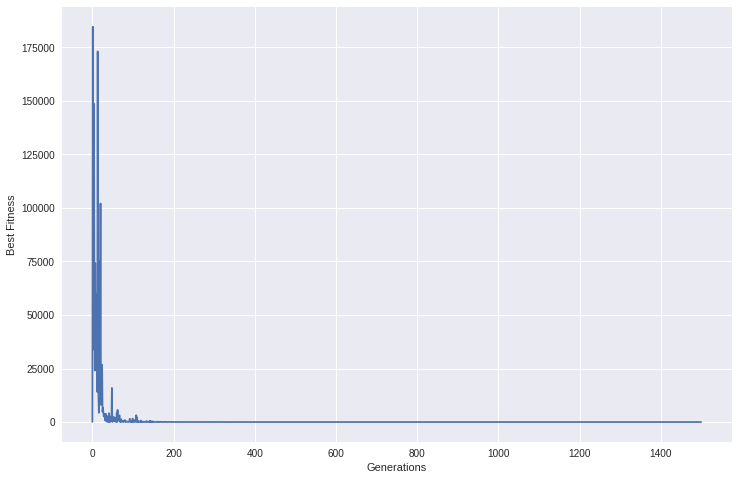

In [29]:
GENERATIONS = 1500
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,4))
model = ModelES(
    pop,
    Colville().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    GENERATIONS,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [30]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "7,54e-27" com um desvio padrão de "4,06e-26". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 6,58 s.

In [31]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 7.536172705985927e-27
Variance: 1.6469454913466918e-51
Standard Deviation: 4.0582576203916523e-26


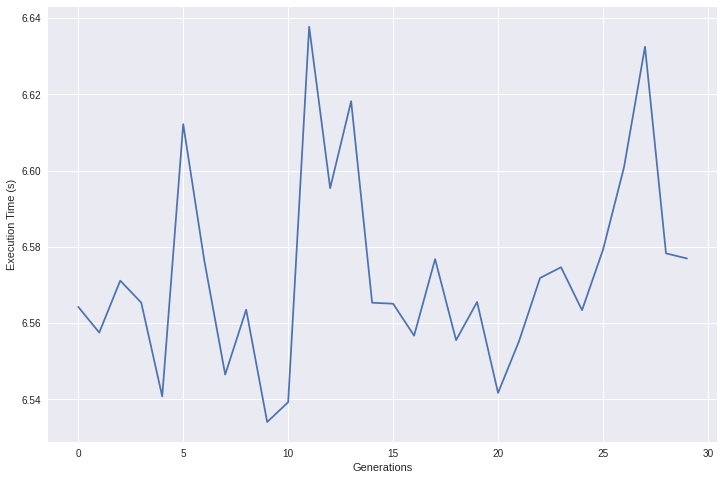

In [32]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()